In [608]:
# from IPython.display import display
# import ipywidgets as widgets

# folders = ! ls -t -d logs_*/

# target = folders[0]

# def select_folder(folder):
#     target = folder
#     print(target)
    
# scW = widgets.Dropdown(options=folders)

# interact = widgets.interact(select_folder, folder=scW)

# # display(interact)

! ls -t -d logs_*/ zee_*/



zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/
zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/
zee_x7c4put_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c4put_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/
zee_x7c3_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/
zee_x7c3pu_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c3t_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c3_rw3_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c4_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c3_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c5_G1024to128x8_r1m51m6_D1024to32x6_lr5m6_dec1m6_cleaning/
zee_x7c5_G1024to128x8_r1m51m6_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c5_G1024to64x8_r1m51m6_D1024to32x6_lr1m5_dec1m6_cleaning/
zee_x7c5_G1024to64x8_r1m51m5_D1024to32

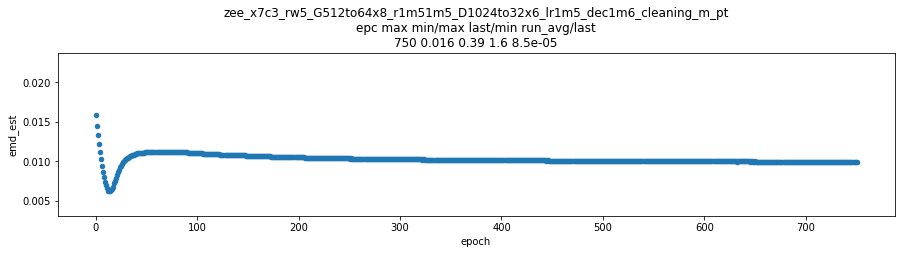

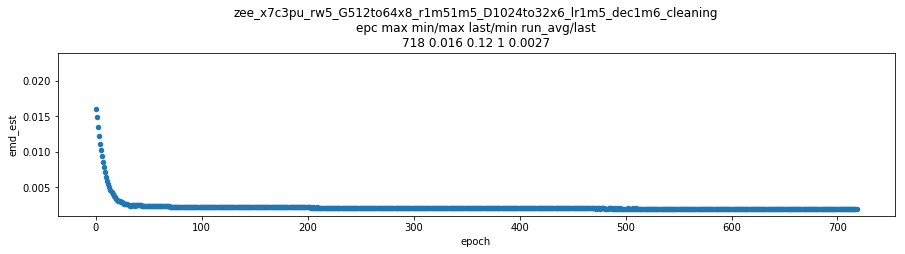

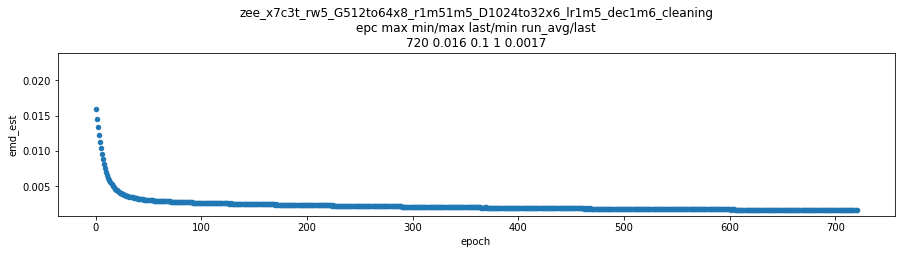

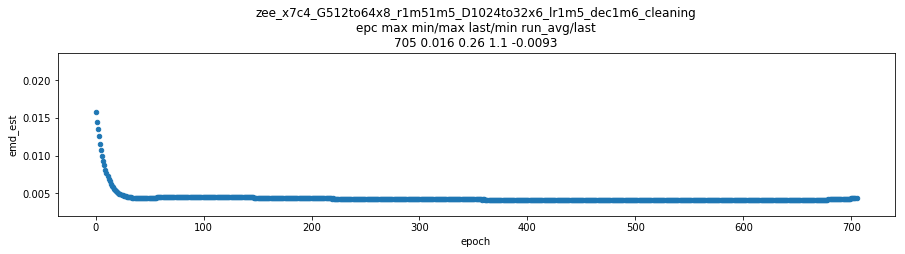

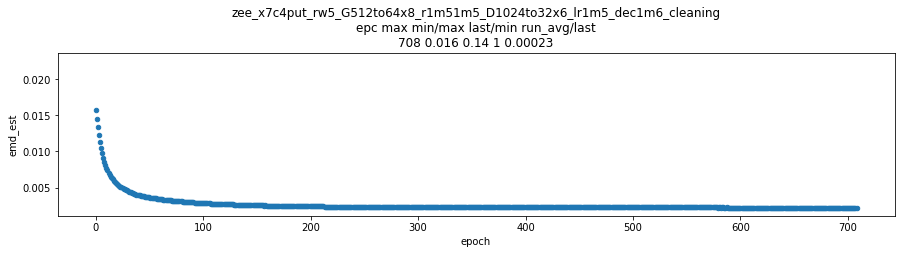

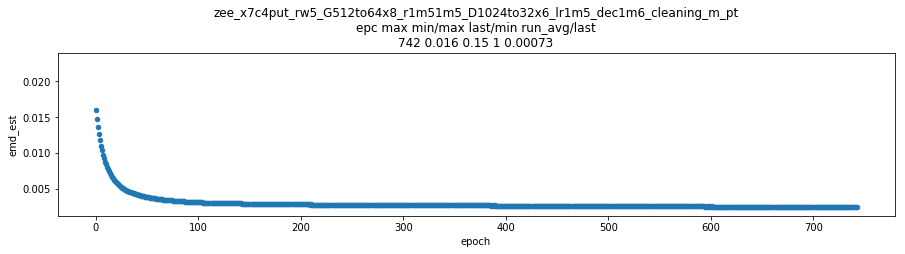

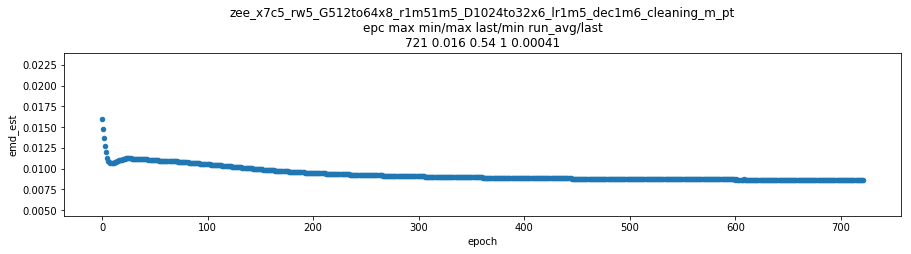

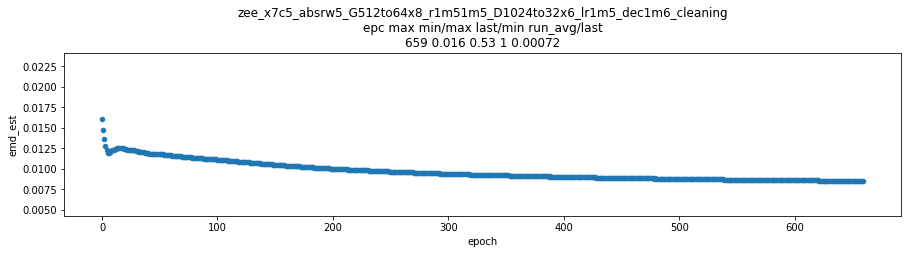

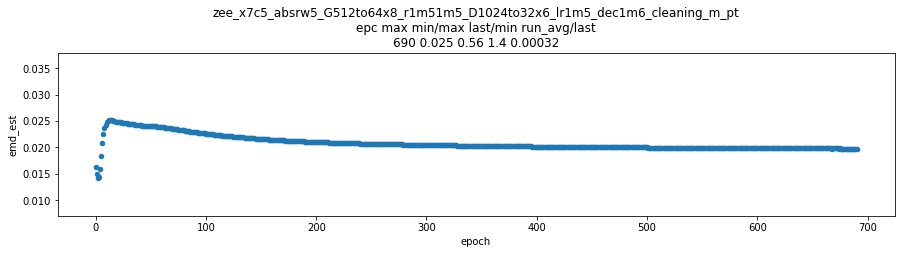

In [609]:
# target = 'logs_cms_zee_conditional_wgan_G512to64x8_lr005_dec05_reg1em4_1000_frac_data5'
# target = 'logs_cms_zee_conditional_wgan_G512x8_D512x5_lr005_dec06_reg1em6_1000_frac_data2'
# target = 'logs_cms_zee_conditional_wgan_x5_c2_G2048x8_do05_D512x5_lr005_dec06_reg1em6_1000_frac_data2'
# # target = 'logs_cms_zee_conditional_wgan_x5_c2_G512x8_D512x5_lr005_dec06_reg1em6_1000_frac_data2'
# target = 'logs_cms_zee_conditional_wgan_x5_c2_G512x8_D512x5_lr005_dec06_reg1em6_1000_frac_data2'
# # target = 'logs_cms_zee_conditional_wgan_x5_c2_G512x8_D512x5_lr005_dec06_reg_l2_1em4_l1_1em4_1000_frac_data2'
# # target = 'logs_cms_zee_conditional_wgan_G512x8_D512x8_lhr005_dec06_reg1em6_1000_frac_data2'
# # target = 'logs_cms_zee_conditional_wgan_G512x8_D512x8_lr005_dec05_reg1em6_1000_frac_data2'
# target = 'zee_x7c2_G512x8_r1m41m4_D1024to32x6_lr1m6_dec1m6'

targets = [#'zee_x5c2_G512to64x8_r1m51m5_D1024to32x6_lr1m6_dec1m6',
           #'zee_x5c2_G512to64x8_r1m51m5_D1024to32x6_lr1m6_dec1m6_cleaning',

            #'zee_x5c2_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
#            'zee_x7c2_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
    
#            'zee_x7c3_rw3_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
            #'zee_x7c3_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
            'zee_x7c3_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt',
            'zee_x7c3pu_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
            'zee_x7c3t_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',

            'zee_x7c4_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',   
#            'zee_x7c5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
    
#            'zee_x7c5_G1024to128x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
#            #'zee_x7c5_G1024to128x8_r1m61m5_D1024to32x6_lr1m5_dec1m6_cleaning',
#            'zee_x7c5_G1024to128x8_r1m51m6_D1024to32x6_lr1m5_dec1m6_cleaning'
#            'zee_x7c5_G1024to128x8_r5m61m6_D1024to32x6_lr1m5_dec1m6_cleaning'

             'zee_x7c4put_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
             'zee_x7c4put_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt',
    
#            'zee_x7c5_G1024to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
#            #'zee_x7c5_G1024to64x8_r1m61m5_D1024to32x6_lr1m5_dec1m6_cleaning',
#            #'zee_x7c5_G1024to64x8_r1m61m5_D1024to32x6_lr5m6_dec1m6_cleaning',
#            'zee_x7c5_G1024to64x8_r1m51m6_D1024to32x6_lr1m5_dec1m6_cleaning',
            'zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt',
            'zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning',
            'zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt'
           #'zee_x5c2_G512to64x8_r1m51m4_D1024to32x6_lr1m5_dec1m6_cleaning',
           #'zee_x5c2_G512to64x8_r1m61m4_D1024to32x6_lr1m5_dec1m6_cleaning',
           #'zee_x5c2_G512to64x8_r1m61m6_D1024to32x6_lr1m5_dec1m6_cleaning',
           #'zee_x5c2_G512x8_r1m51m5_D1024to32x6_lr1m6_dec1m6',
           #'zee_x5c2_G512x8_r1m41m4_D1024to32x6_lr1m6_dec1m6'
          ]

dfs = [ pd.read_csv('%s/metrics.csv' % target) if os.path.exists('%s/metrics.csv' % target)  else None for target in targets ]

# df = pd.read_csv('%s/metrics.csv' % target)


for df,target in zip(dfs,targets):
    #print(target)
    if df is None:
        continue
    df['emd_est'] = df['generator_loss']
    #print(df['epoch'].max())

    first = 0
    last = df.shape[0]
    # last = min(last,20)
    
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    # ax.set_yscale('log')
    
    df.loc[first:last].plot.scatter('epoch','emd_est',ax=ax)

    max_epoch = df['epoch'].max()
    minval = df.loc[first:last]['emd_est'].min()
    lastval = df.loc[last-1]['emd_est']
    change = df.loc[last-10:last]['emd_est'].mean() - lastval
    maxval = df.loc[first:last]['emd_est'].max()

    # plt.ylim(-0.1*maxval,maxval*1.2)

    #print(maxval,minval,lastval/minval,change/lastval)
    plt.ylim(minval*0.5,maxval*1.5)
    plt.title('%s\nepc max min/max last/min run_avg/last\n%d %1.2g %1.2g %1.2g %1.2g' % (target,max_epoch,maxval,minval/maxval,lastval/minval,change/lastval))
    plt.show()

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var0.png


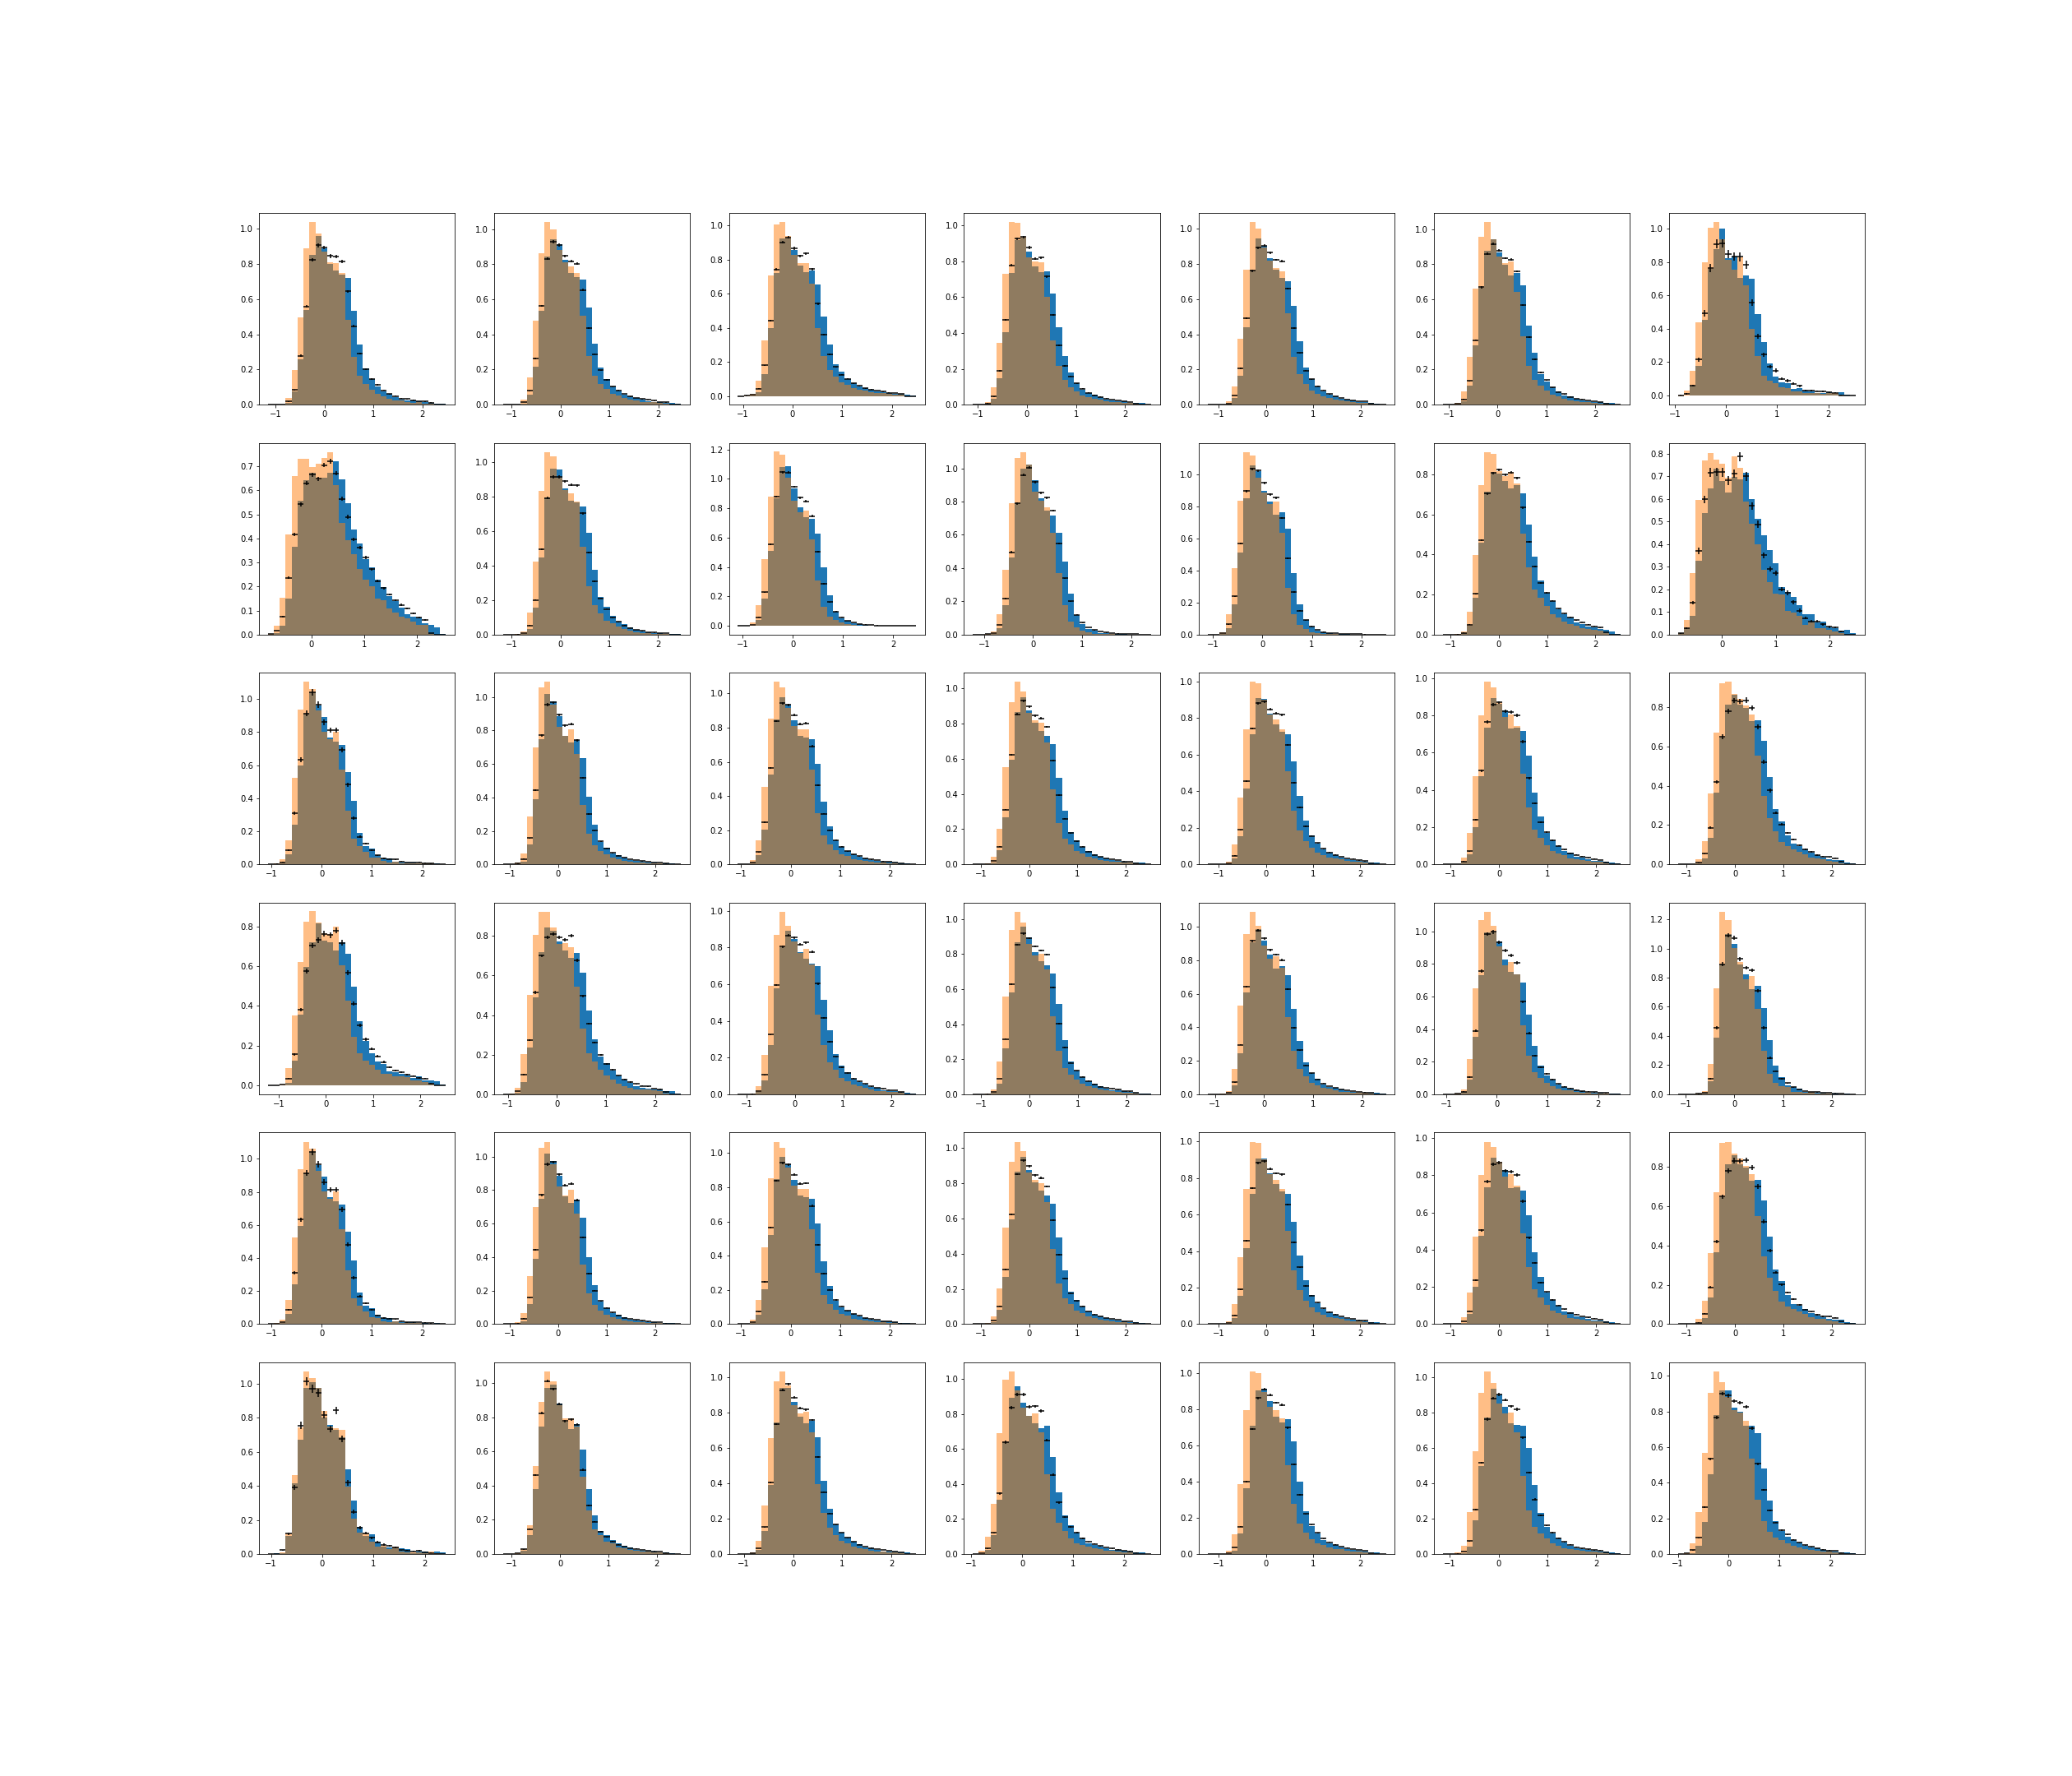

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var0.png


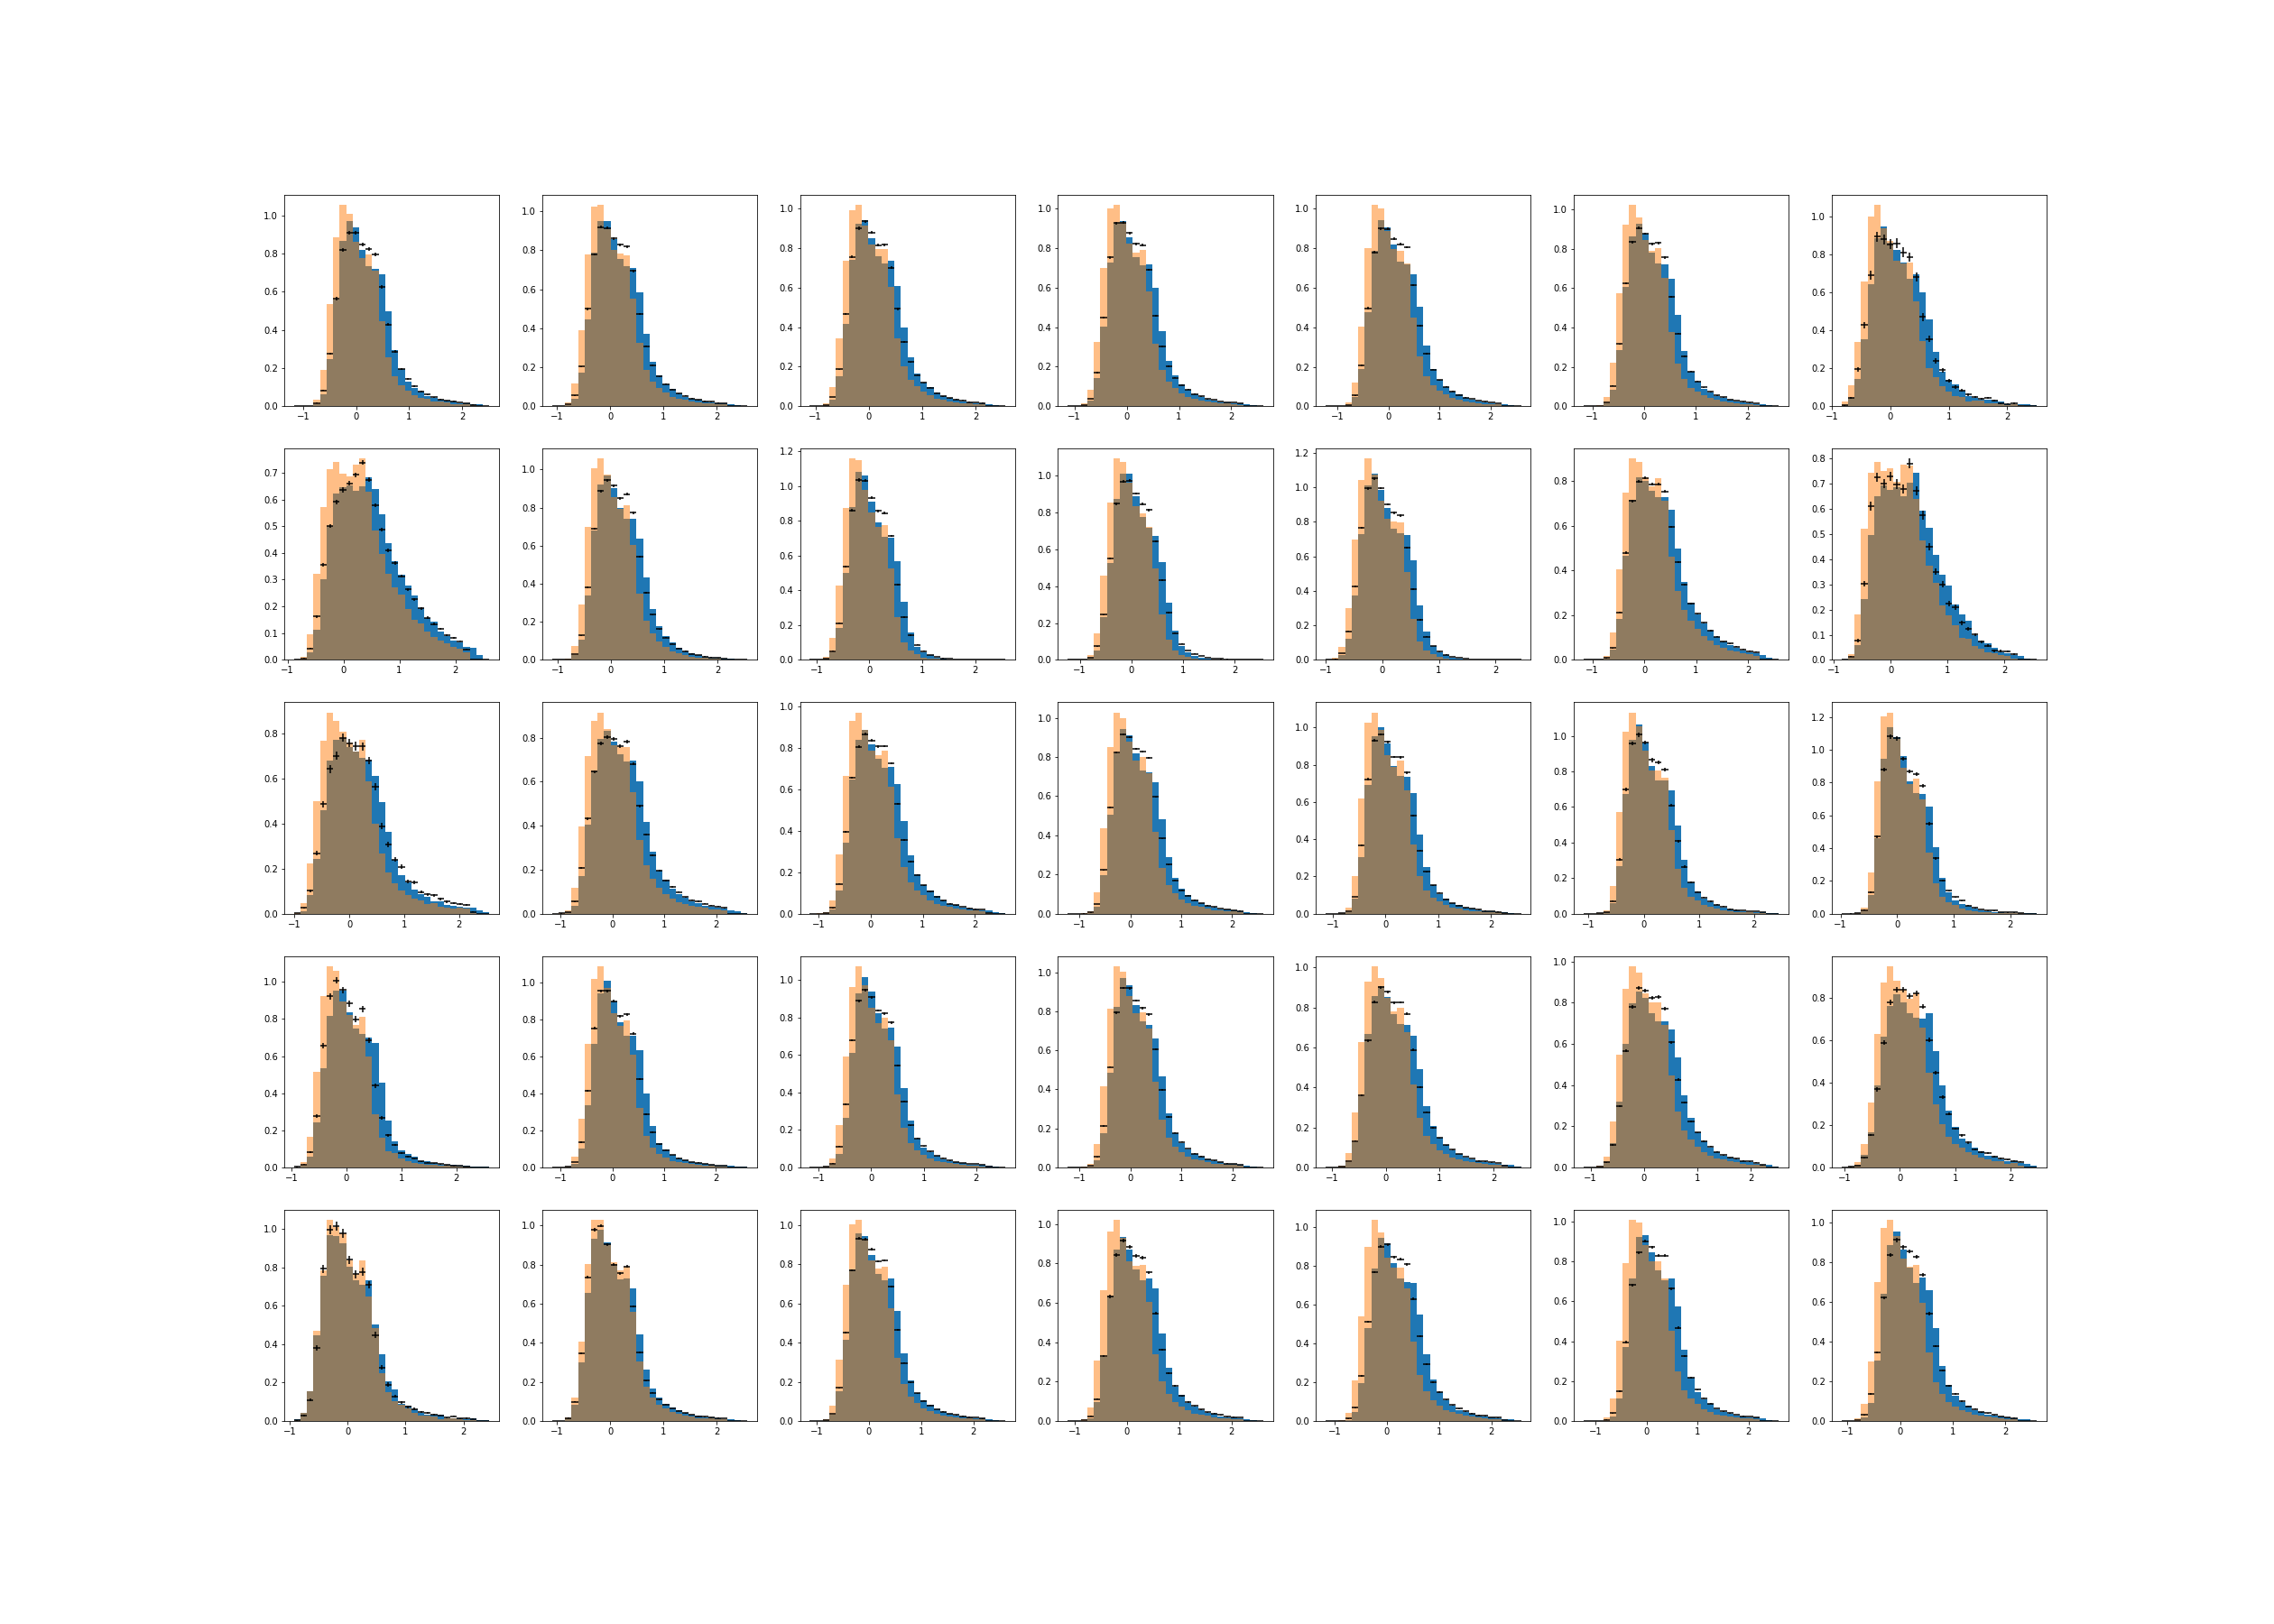

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var0.png


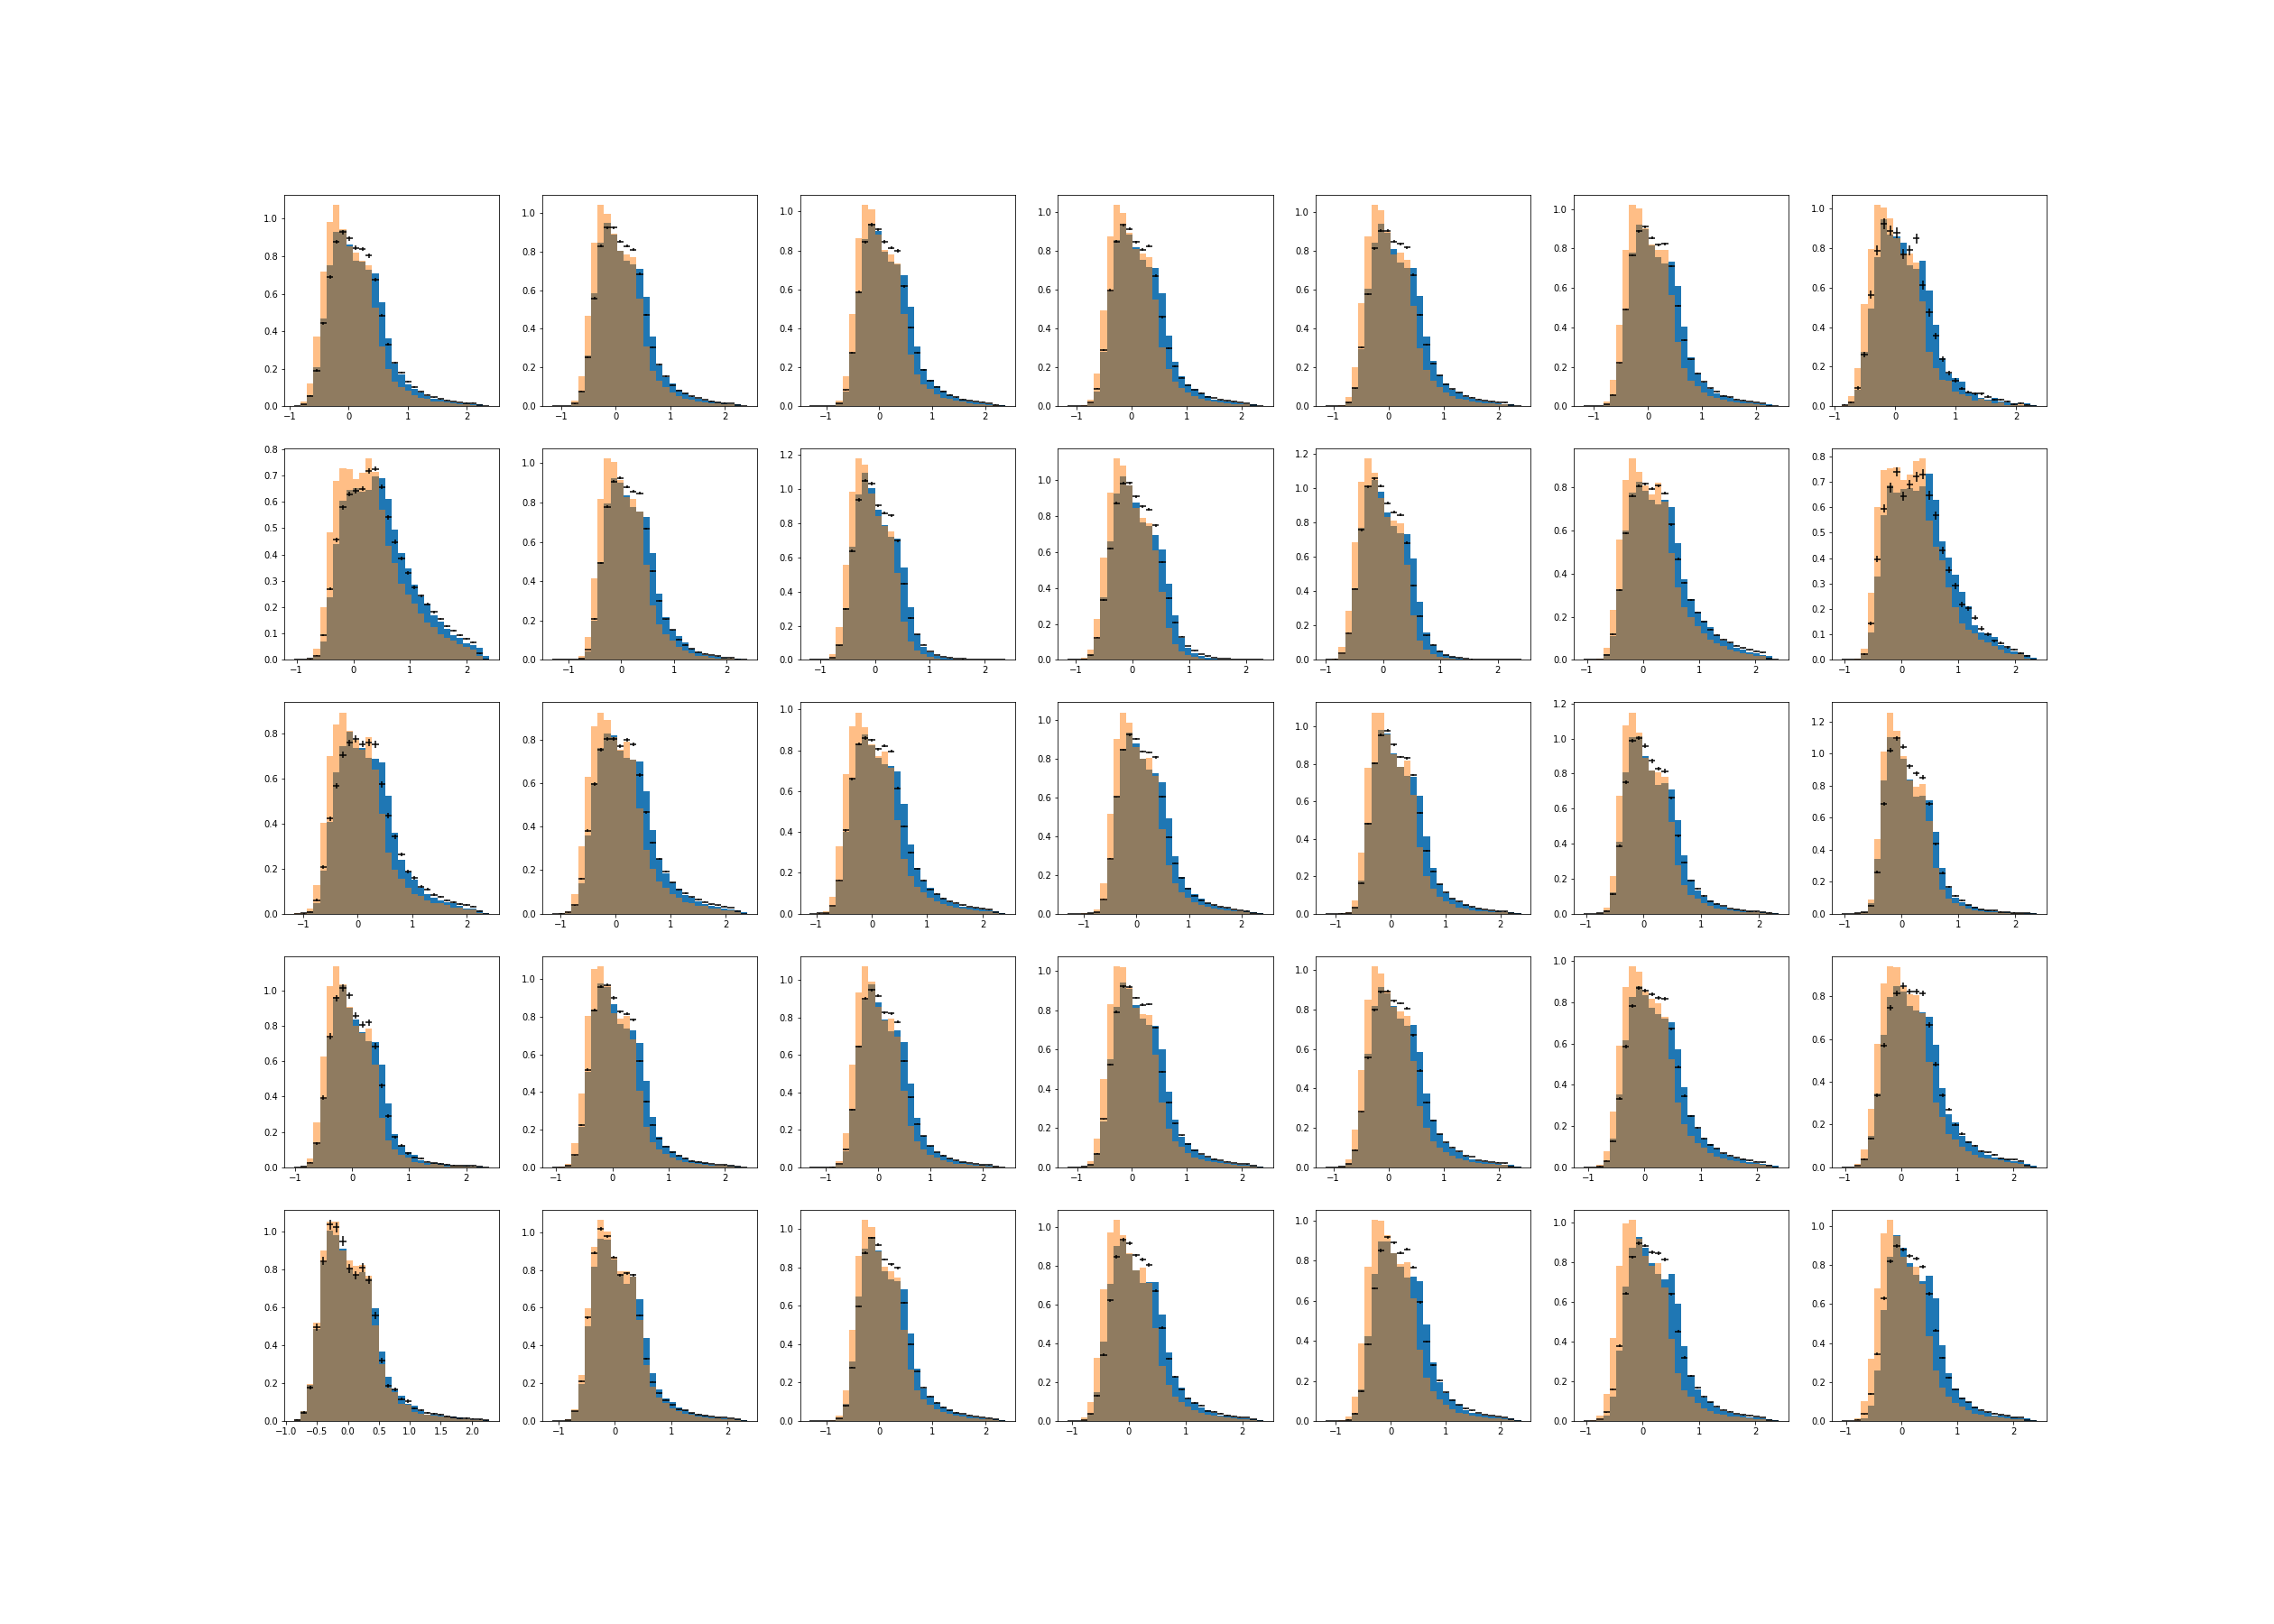

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var1.png


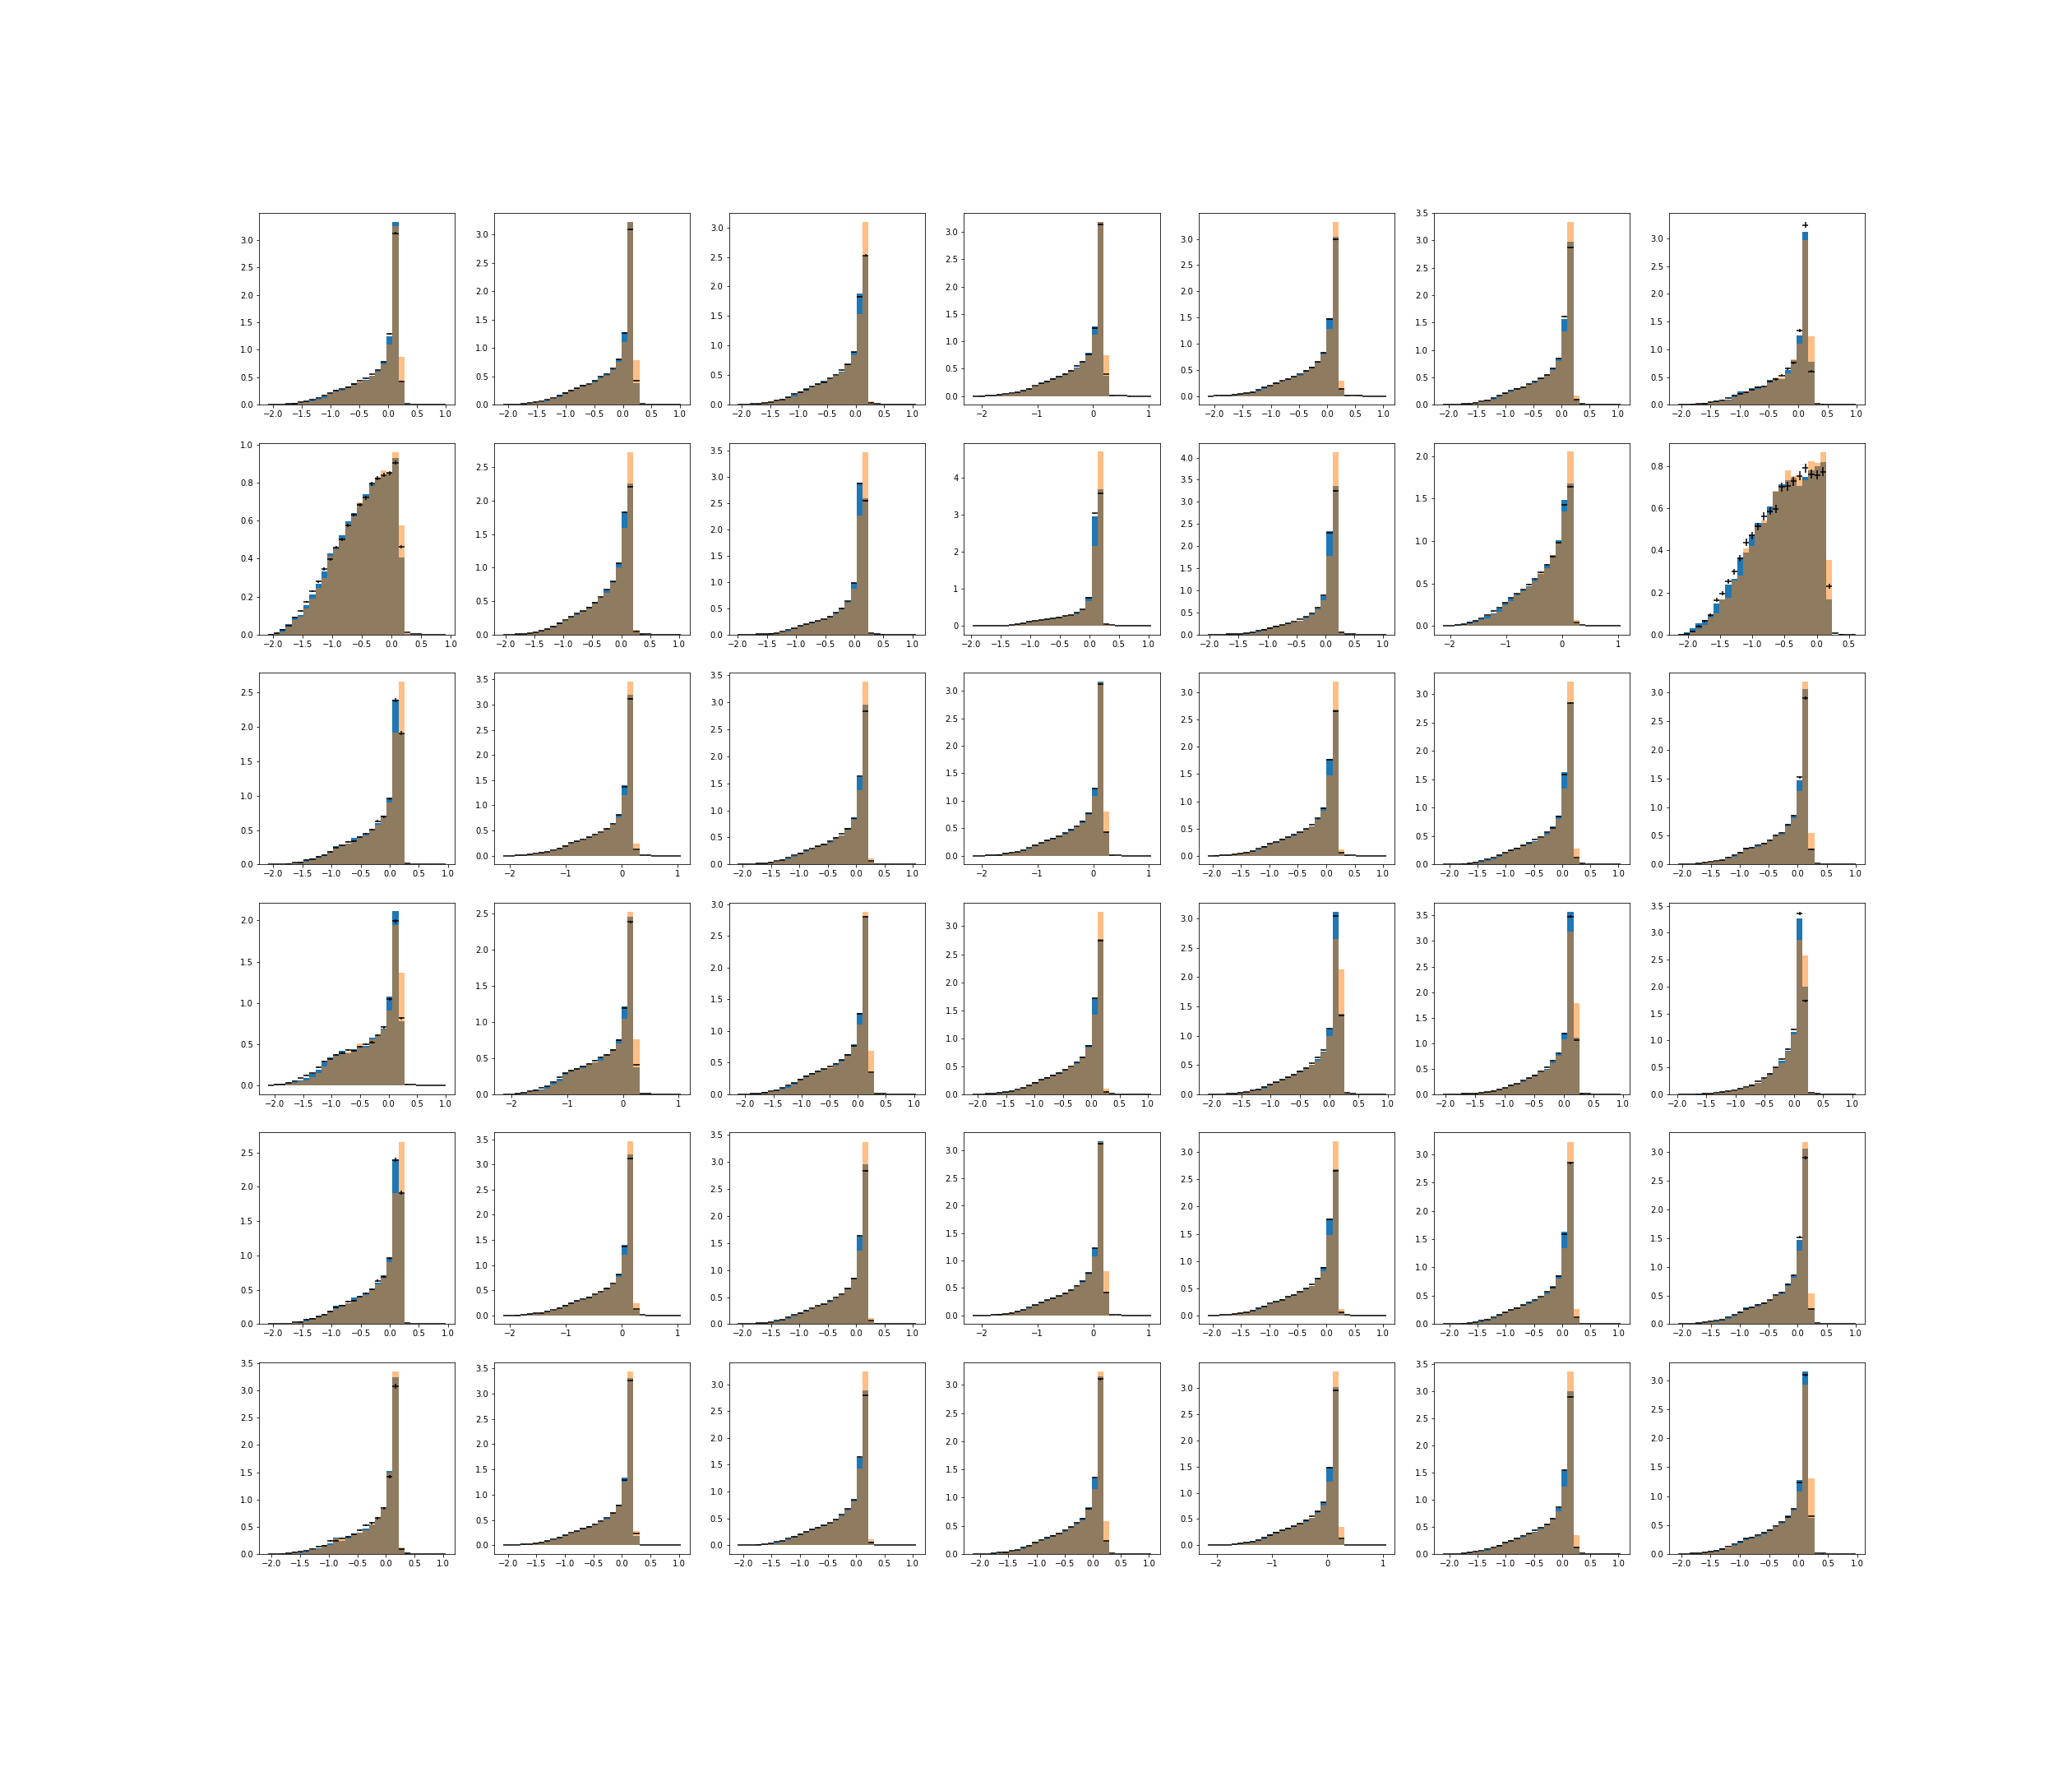

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var1.png


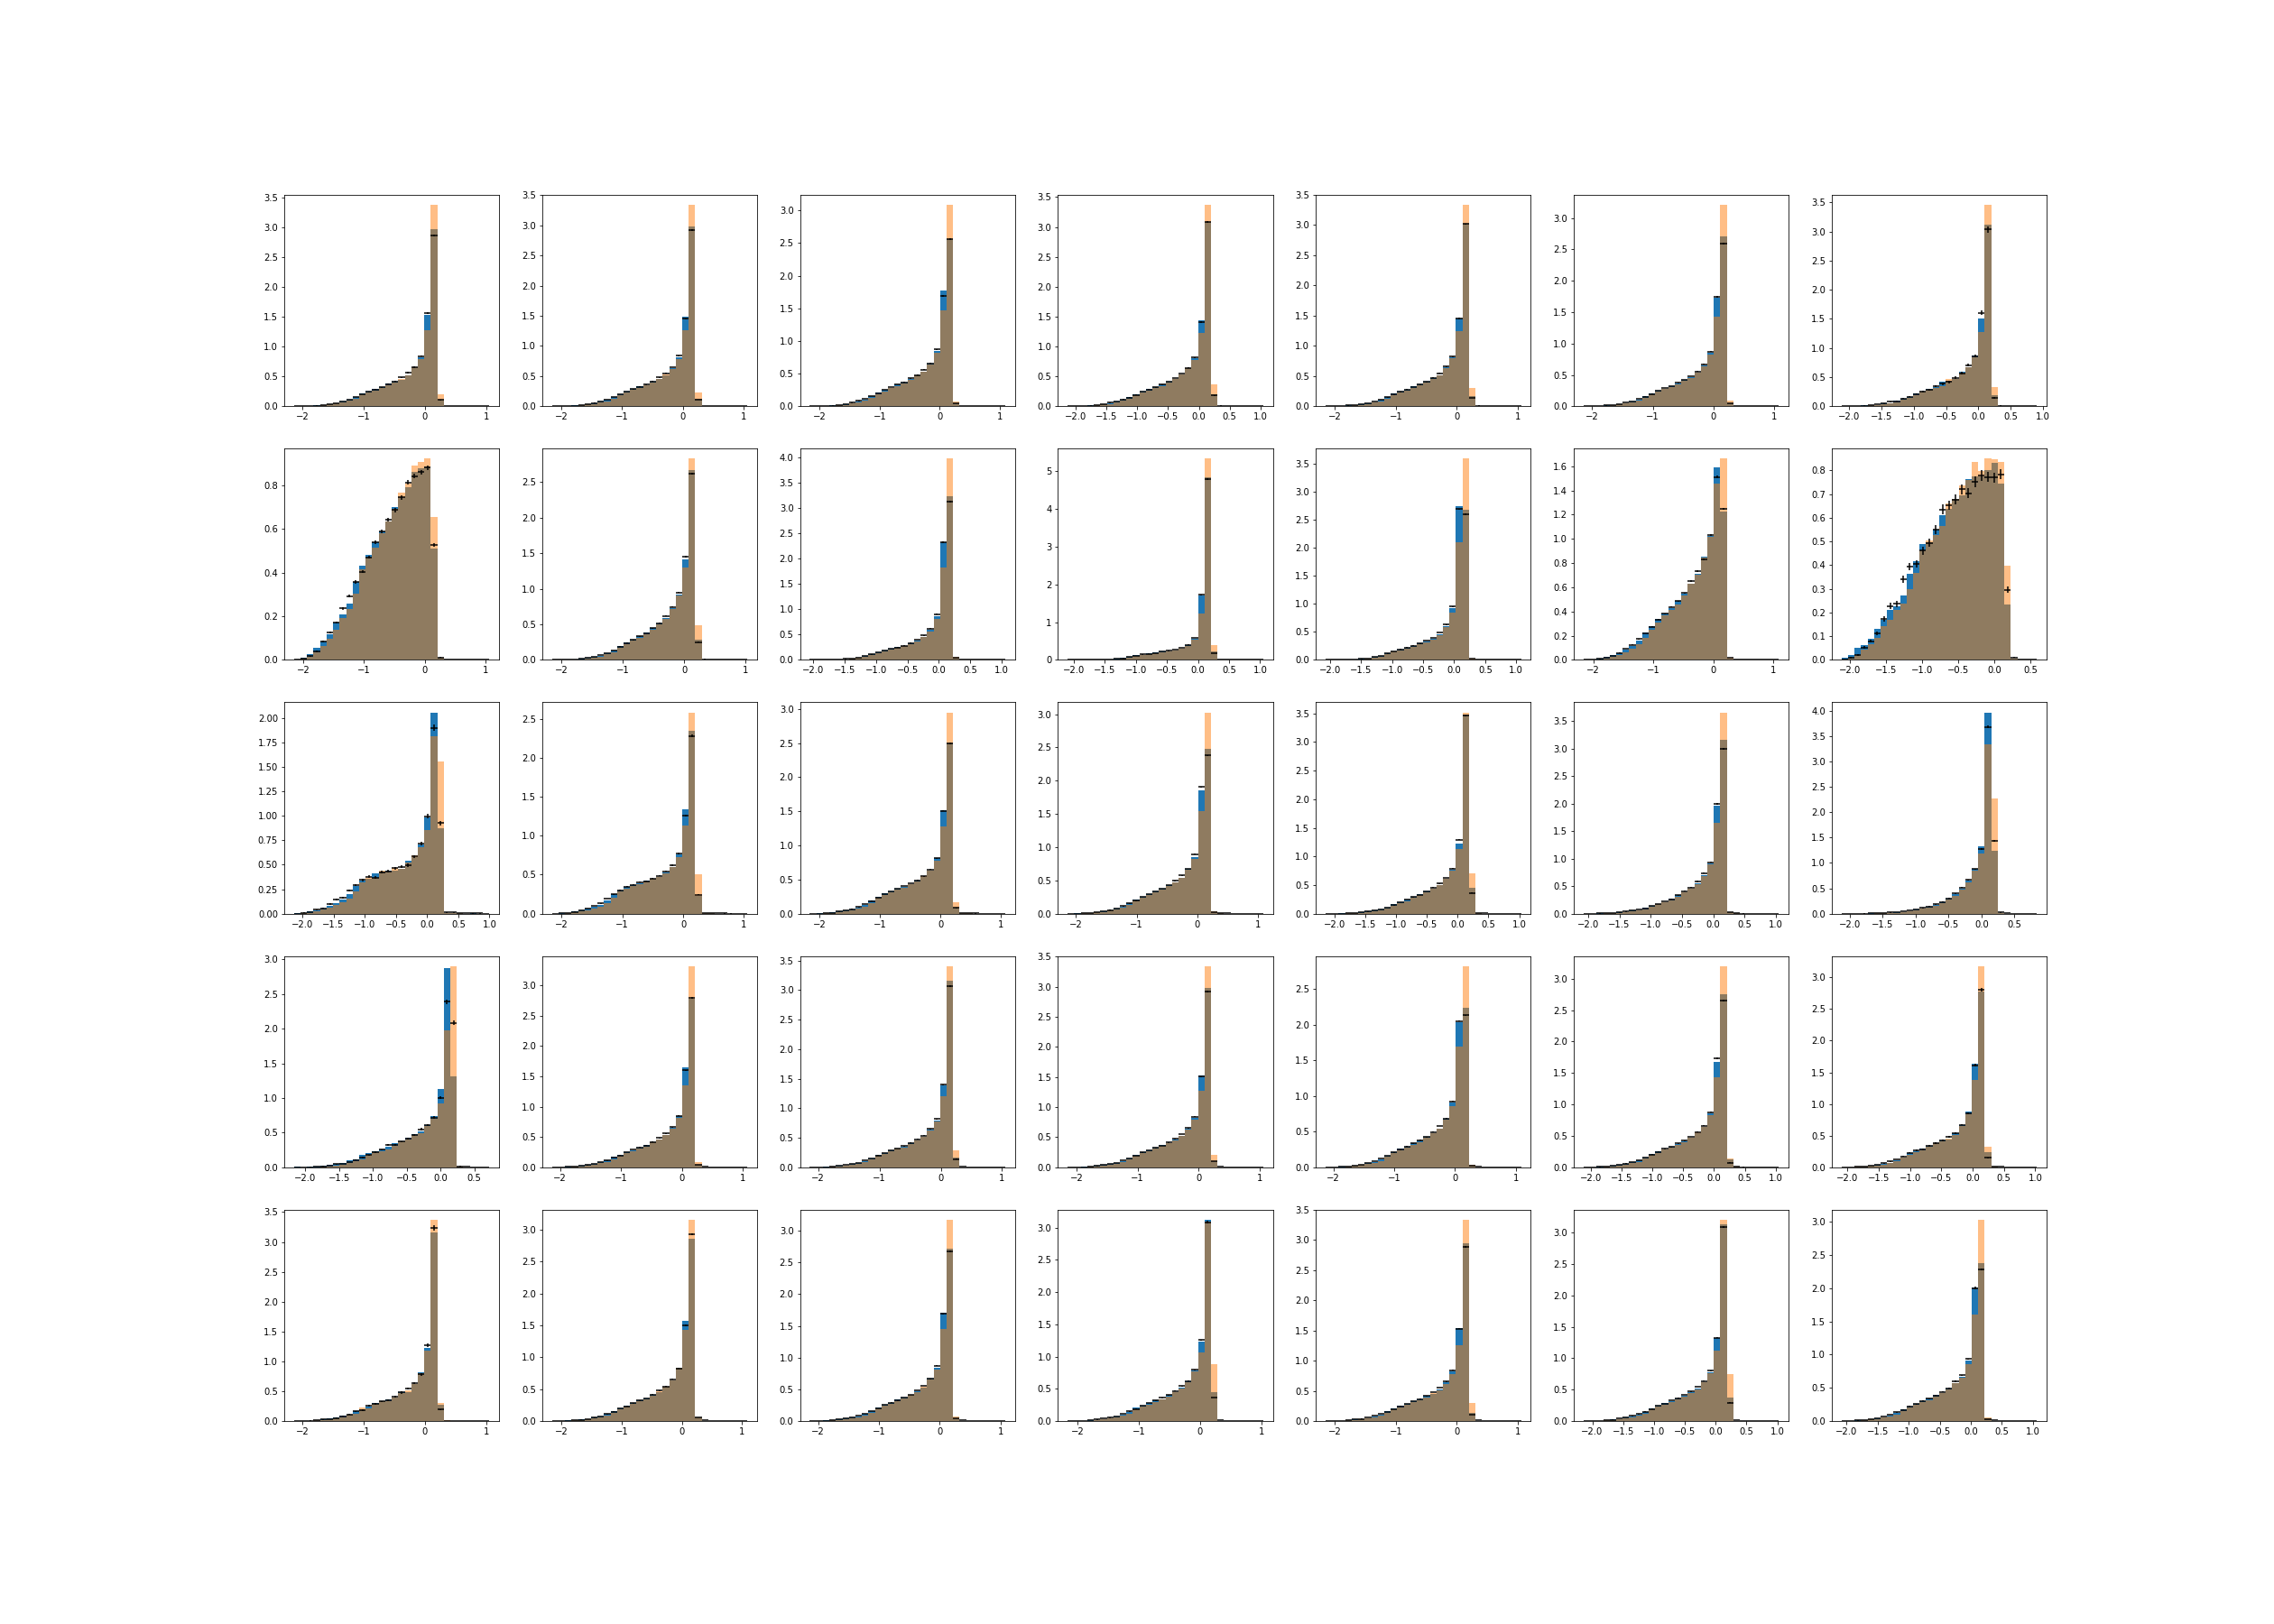

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var1.png


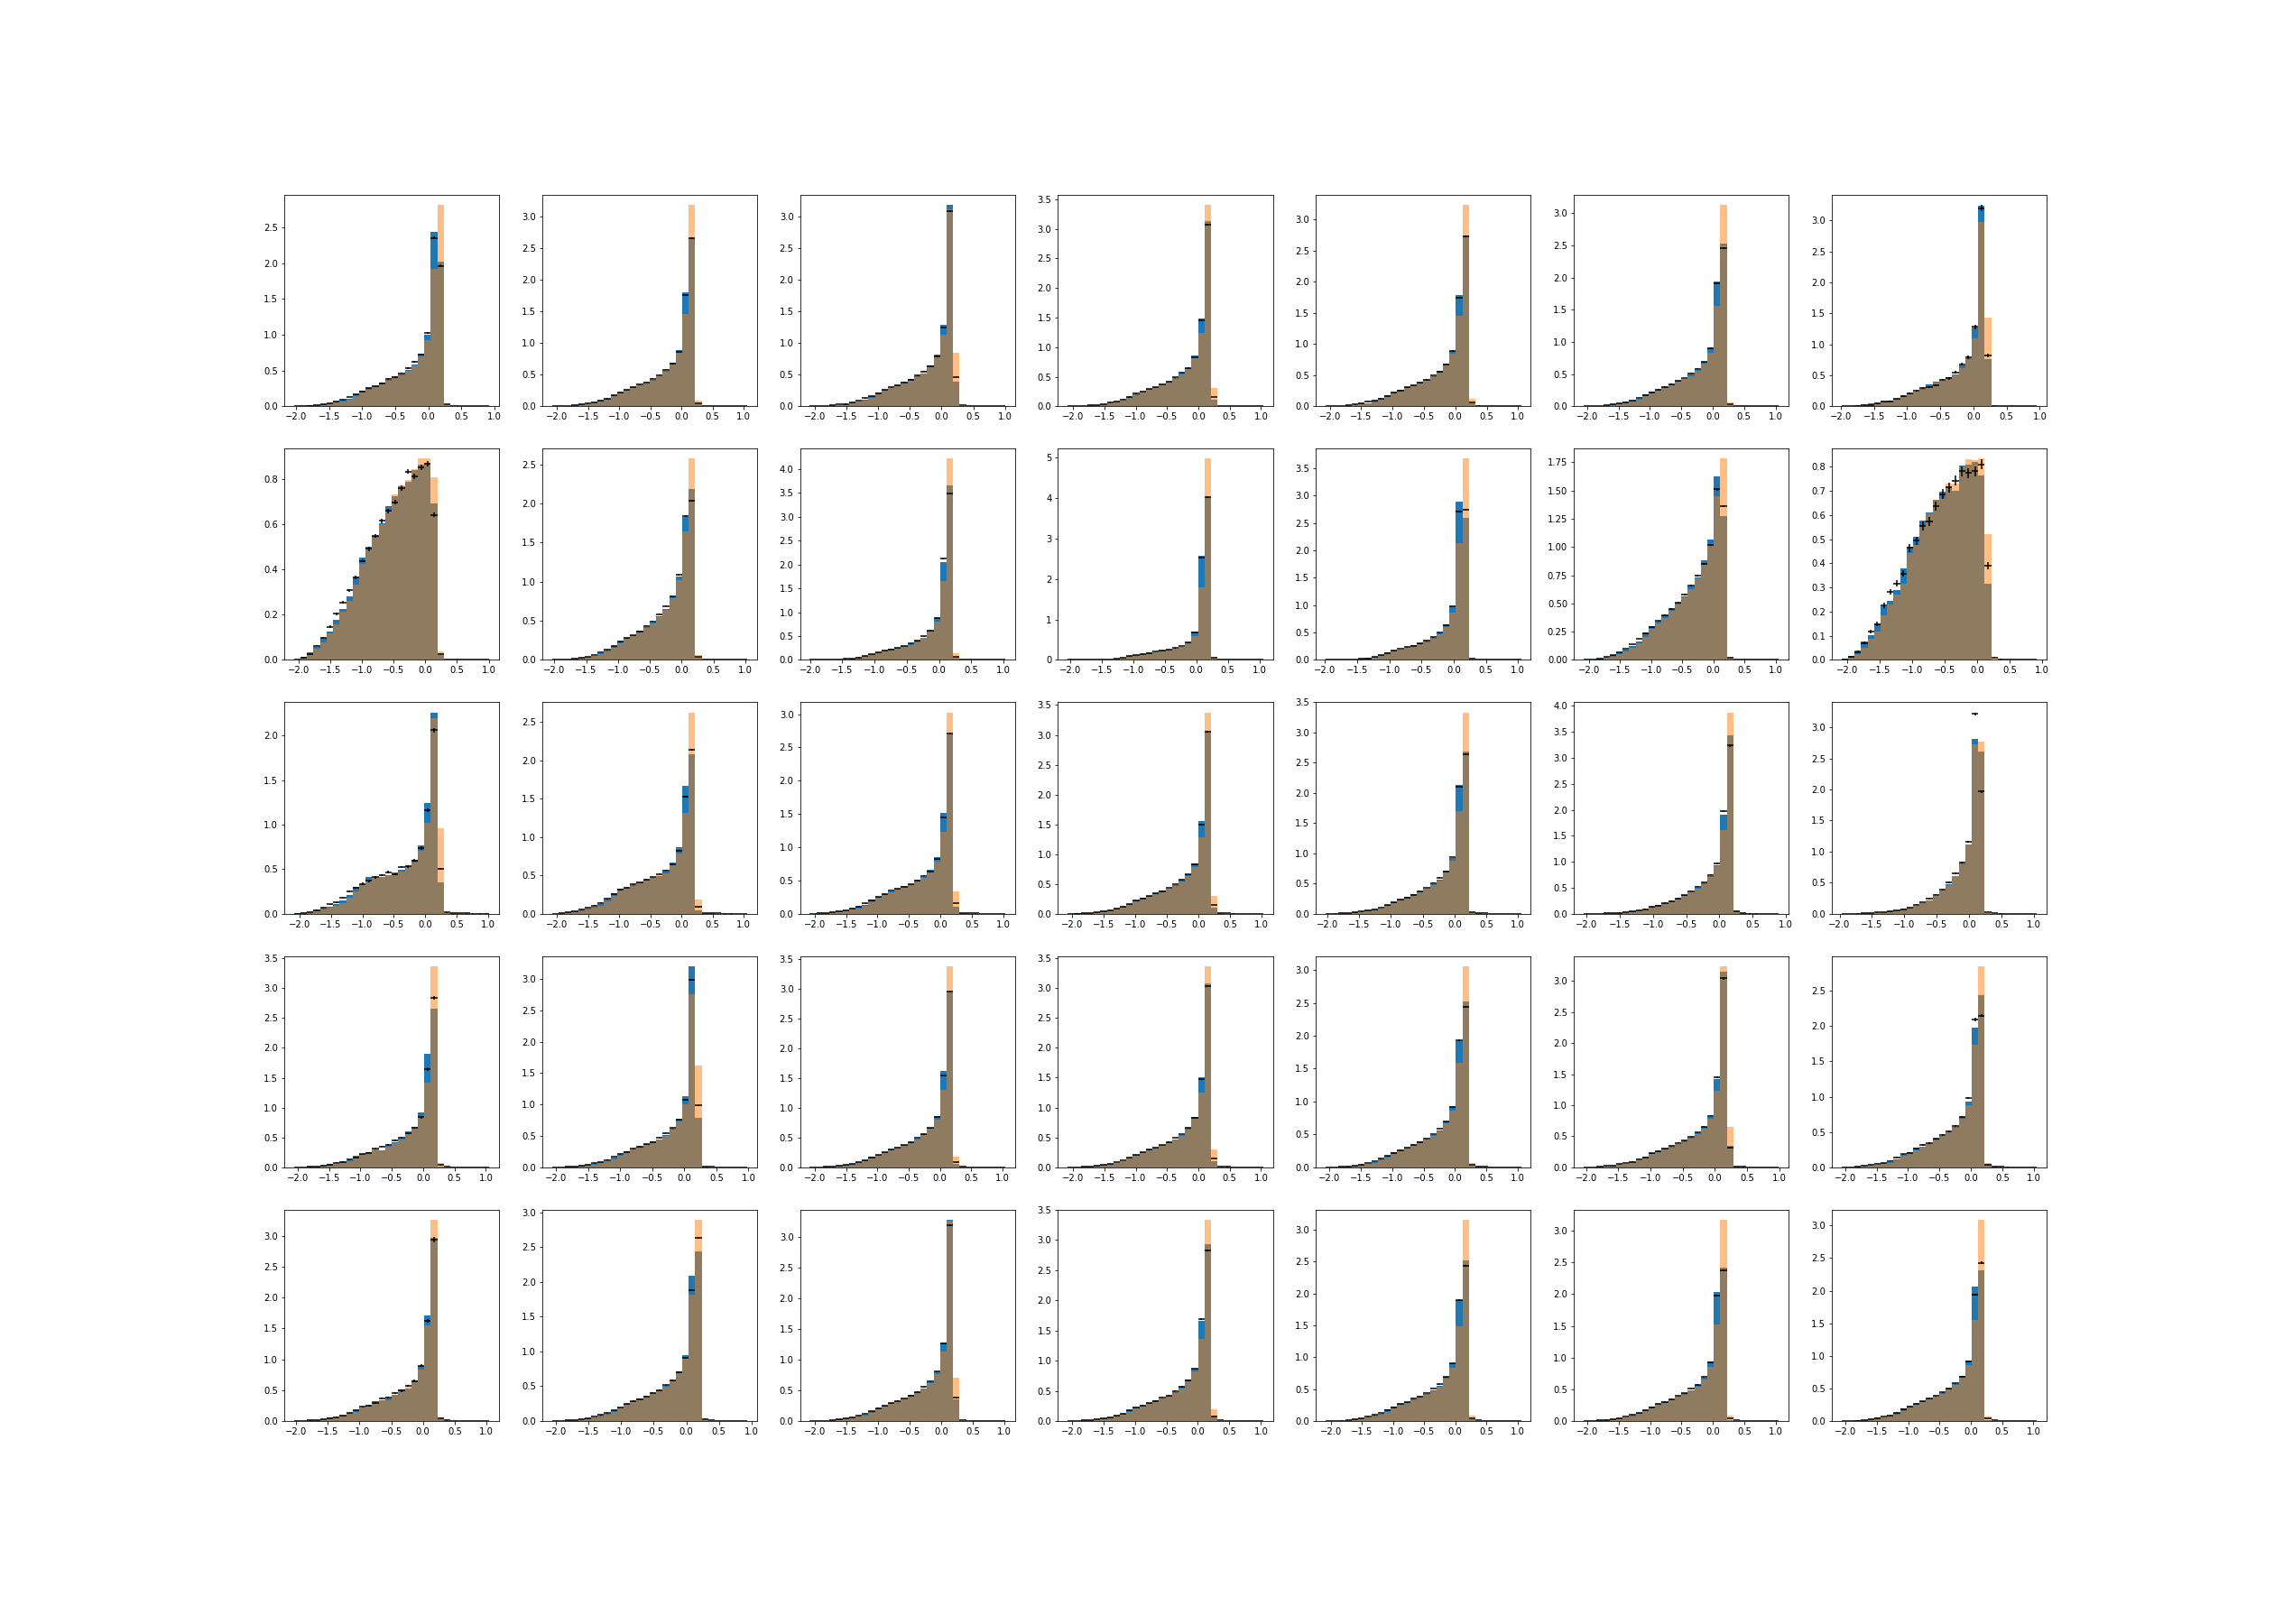

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var2.png


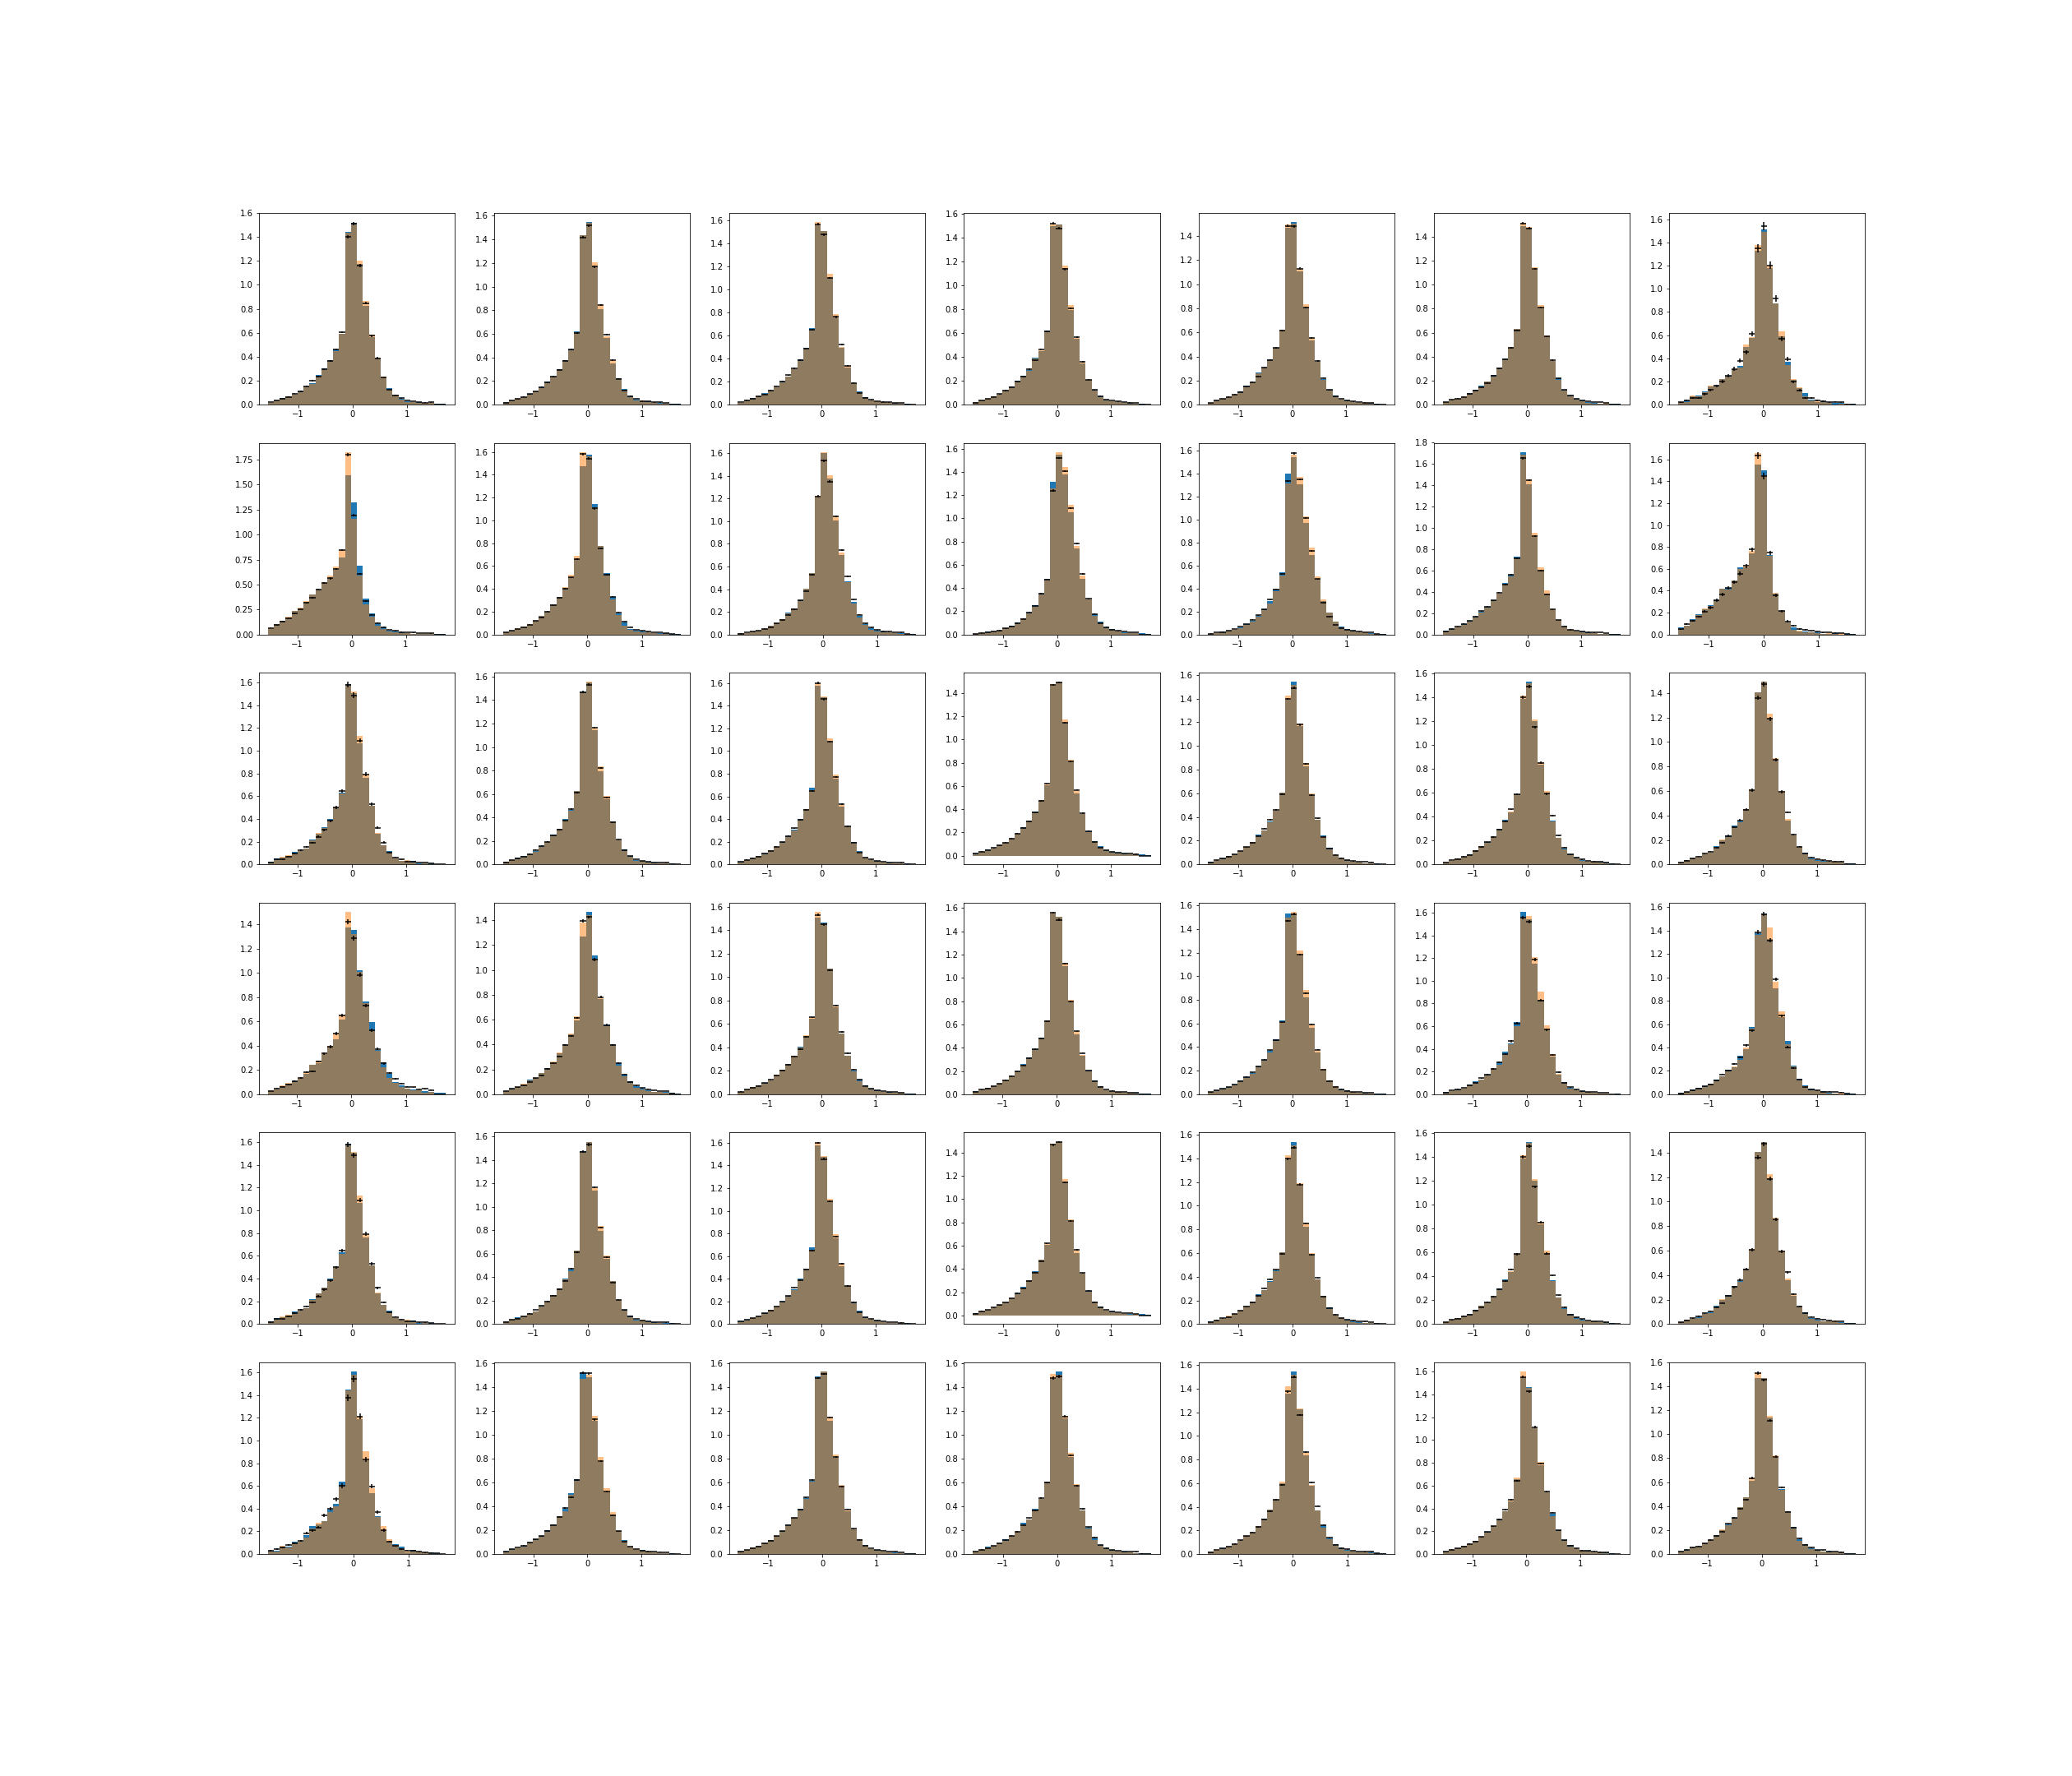

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var2.png


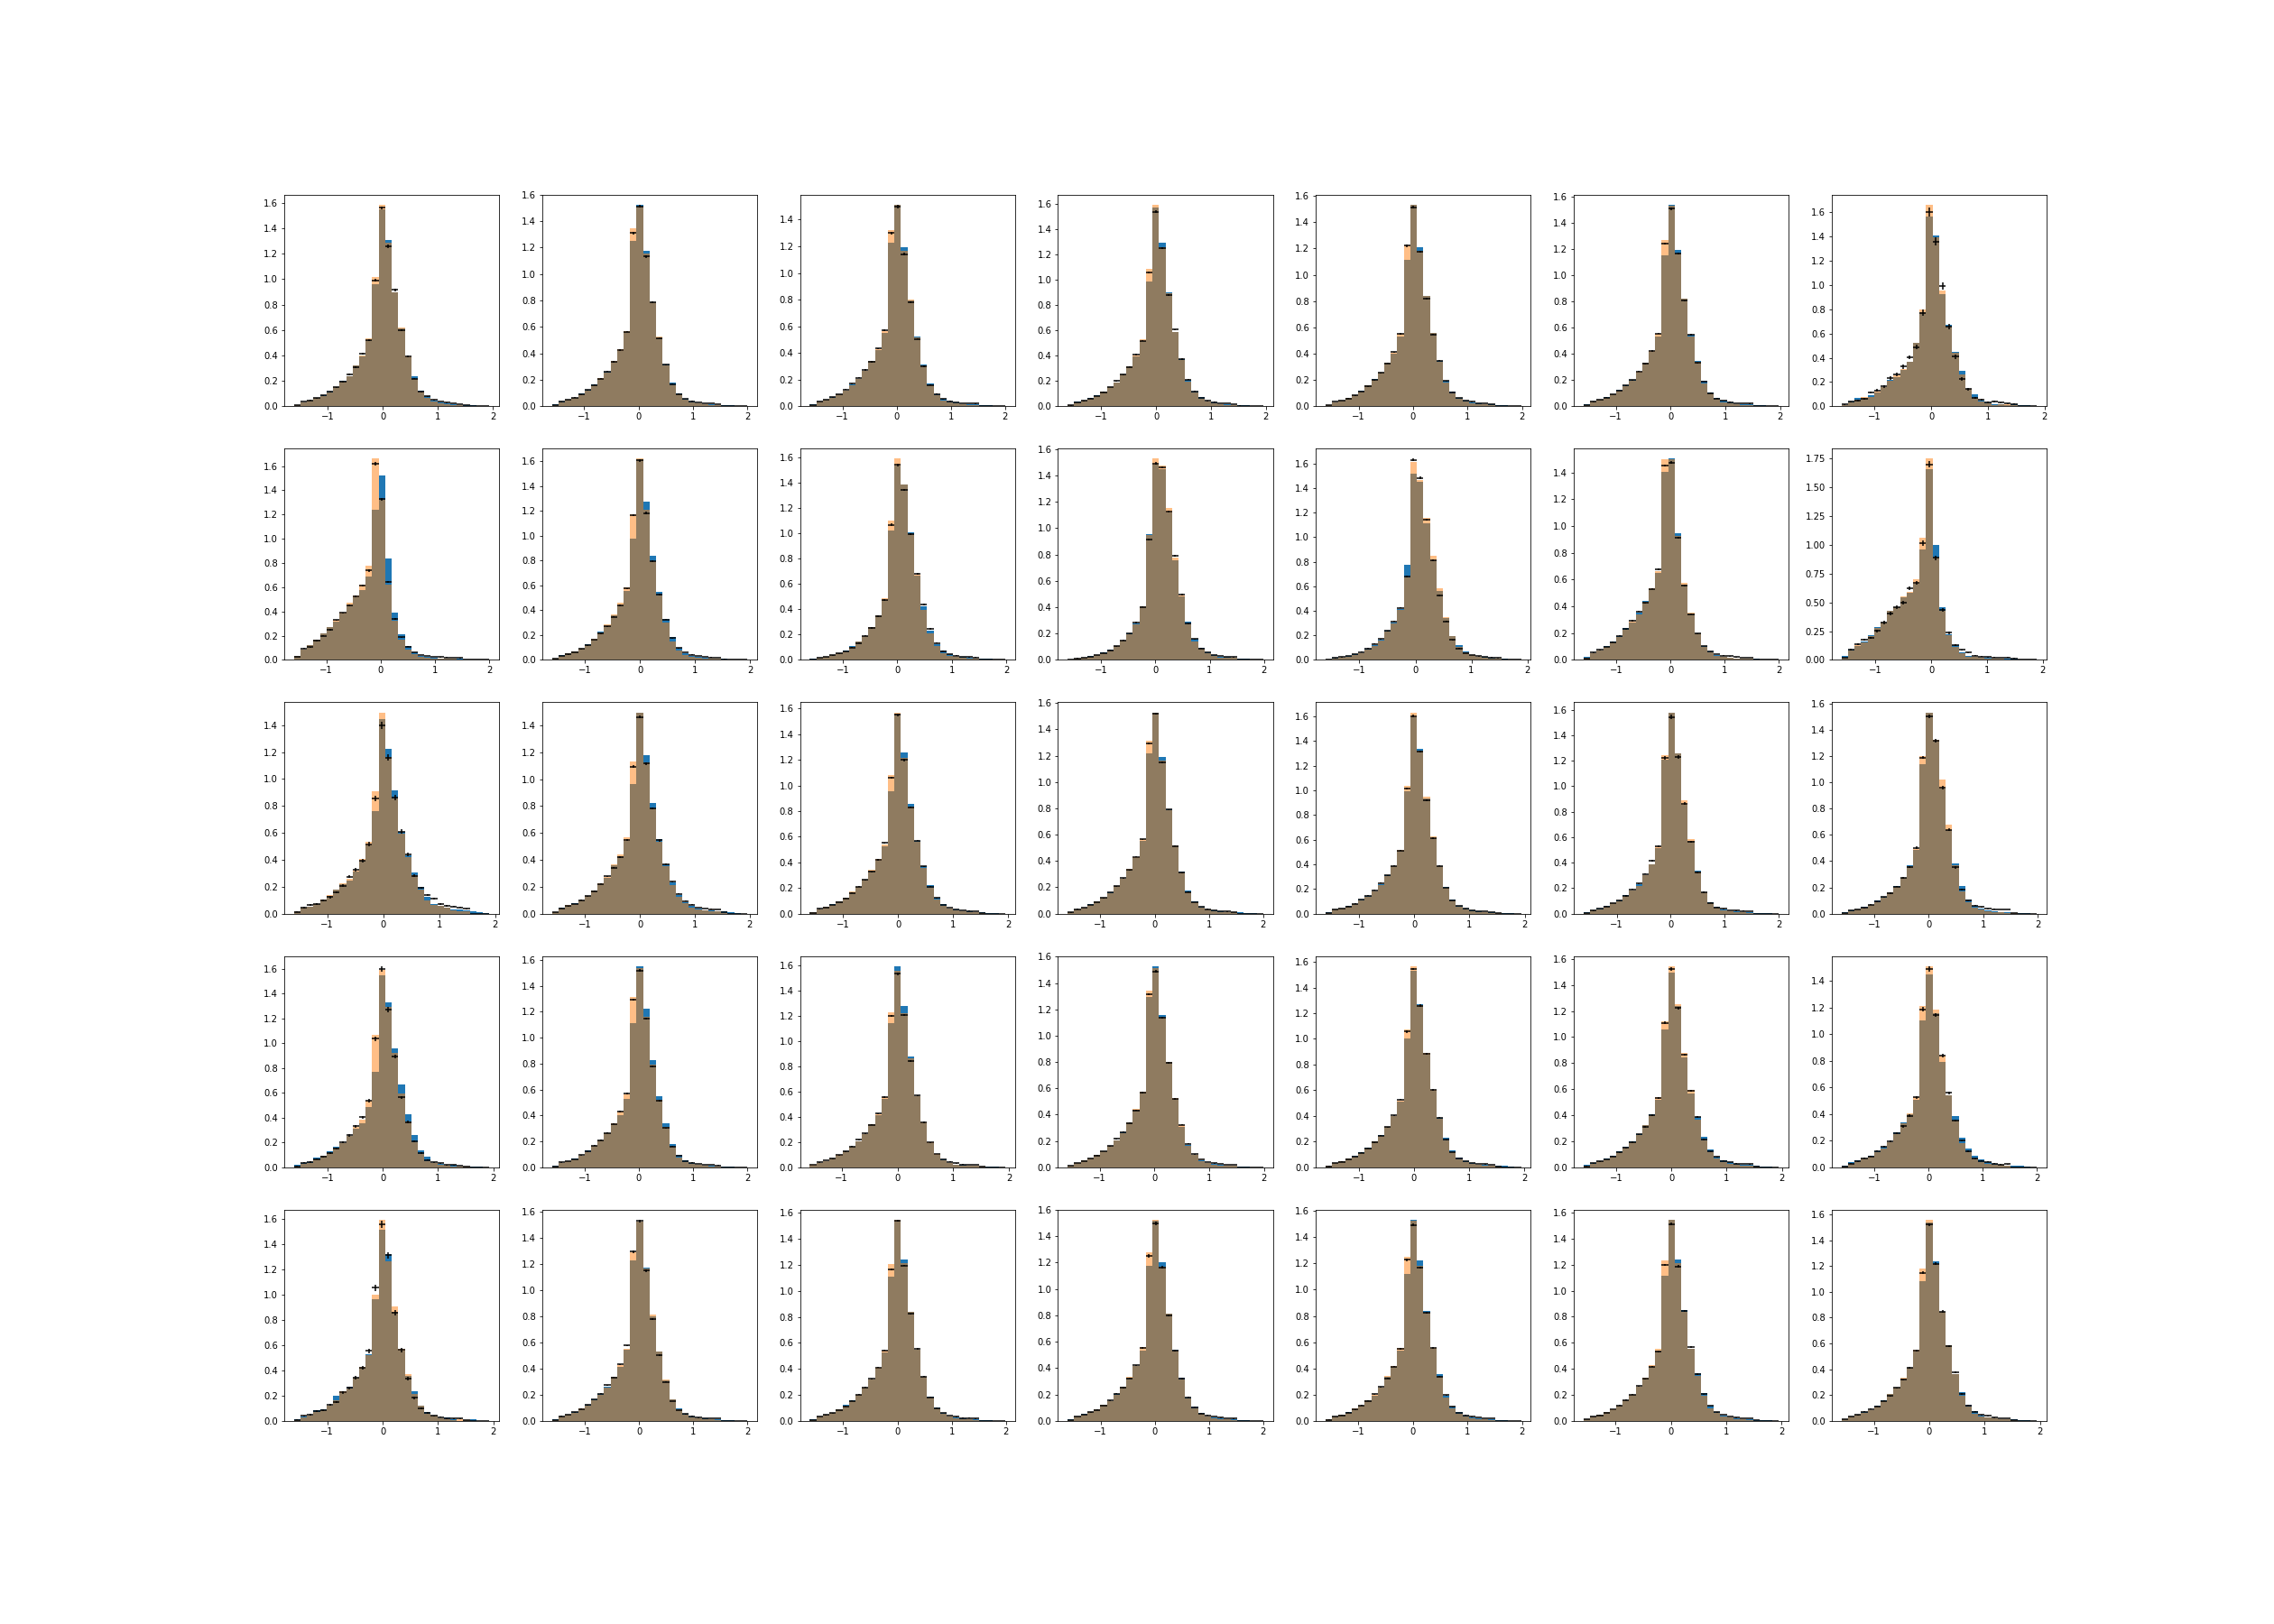

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var2.png


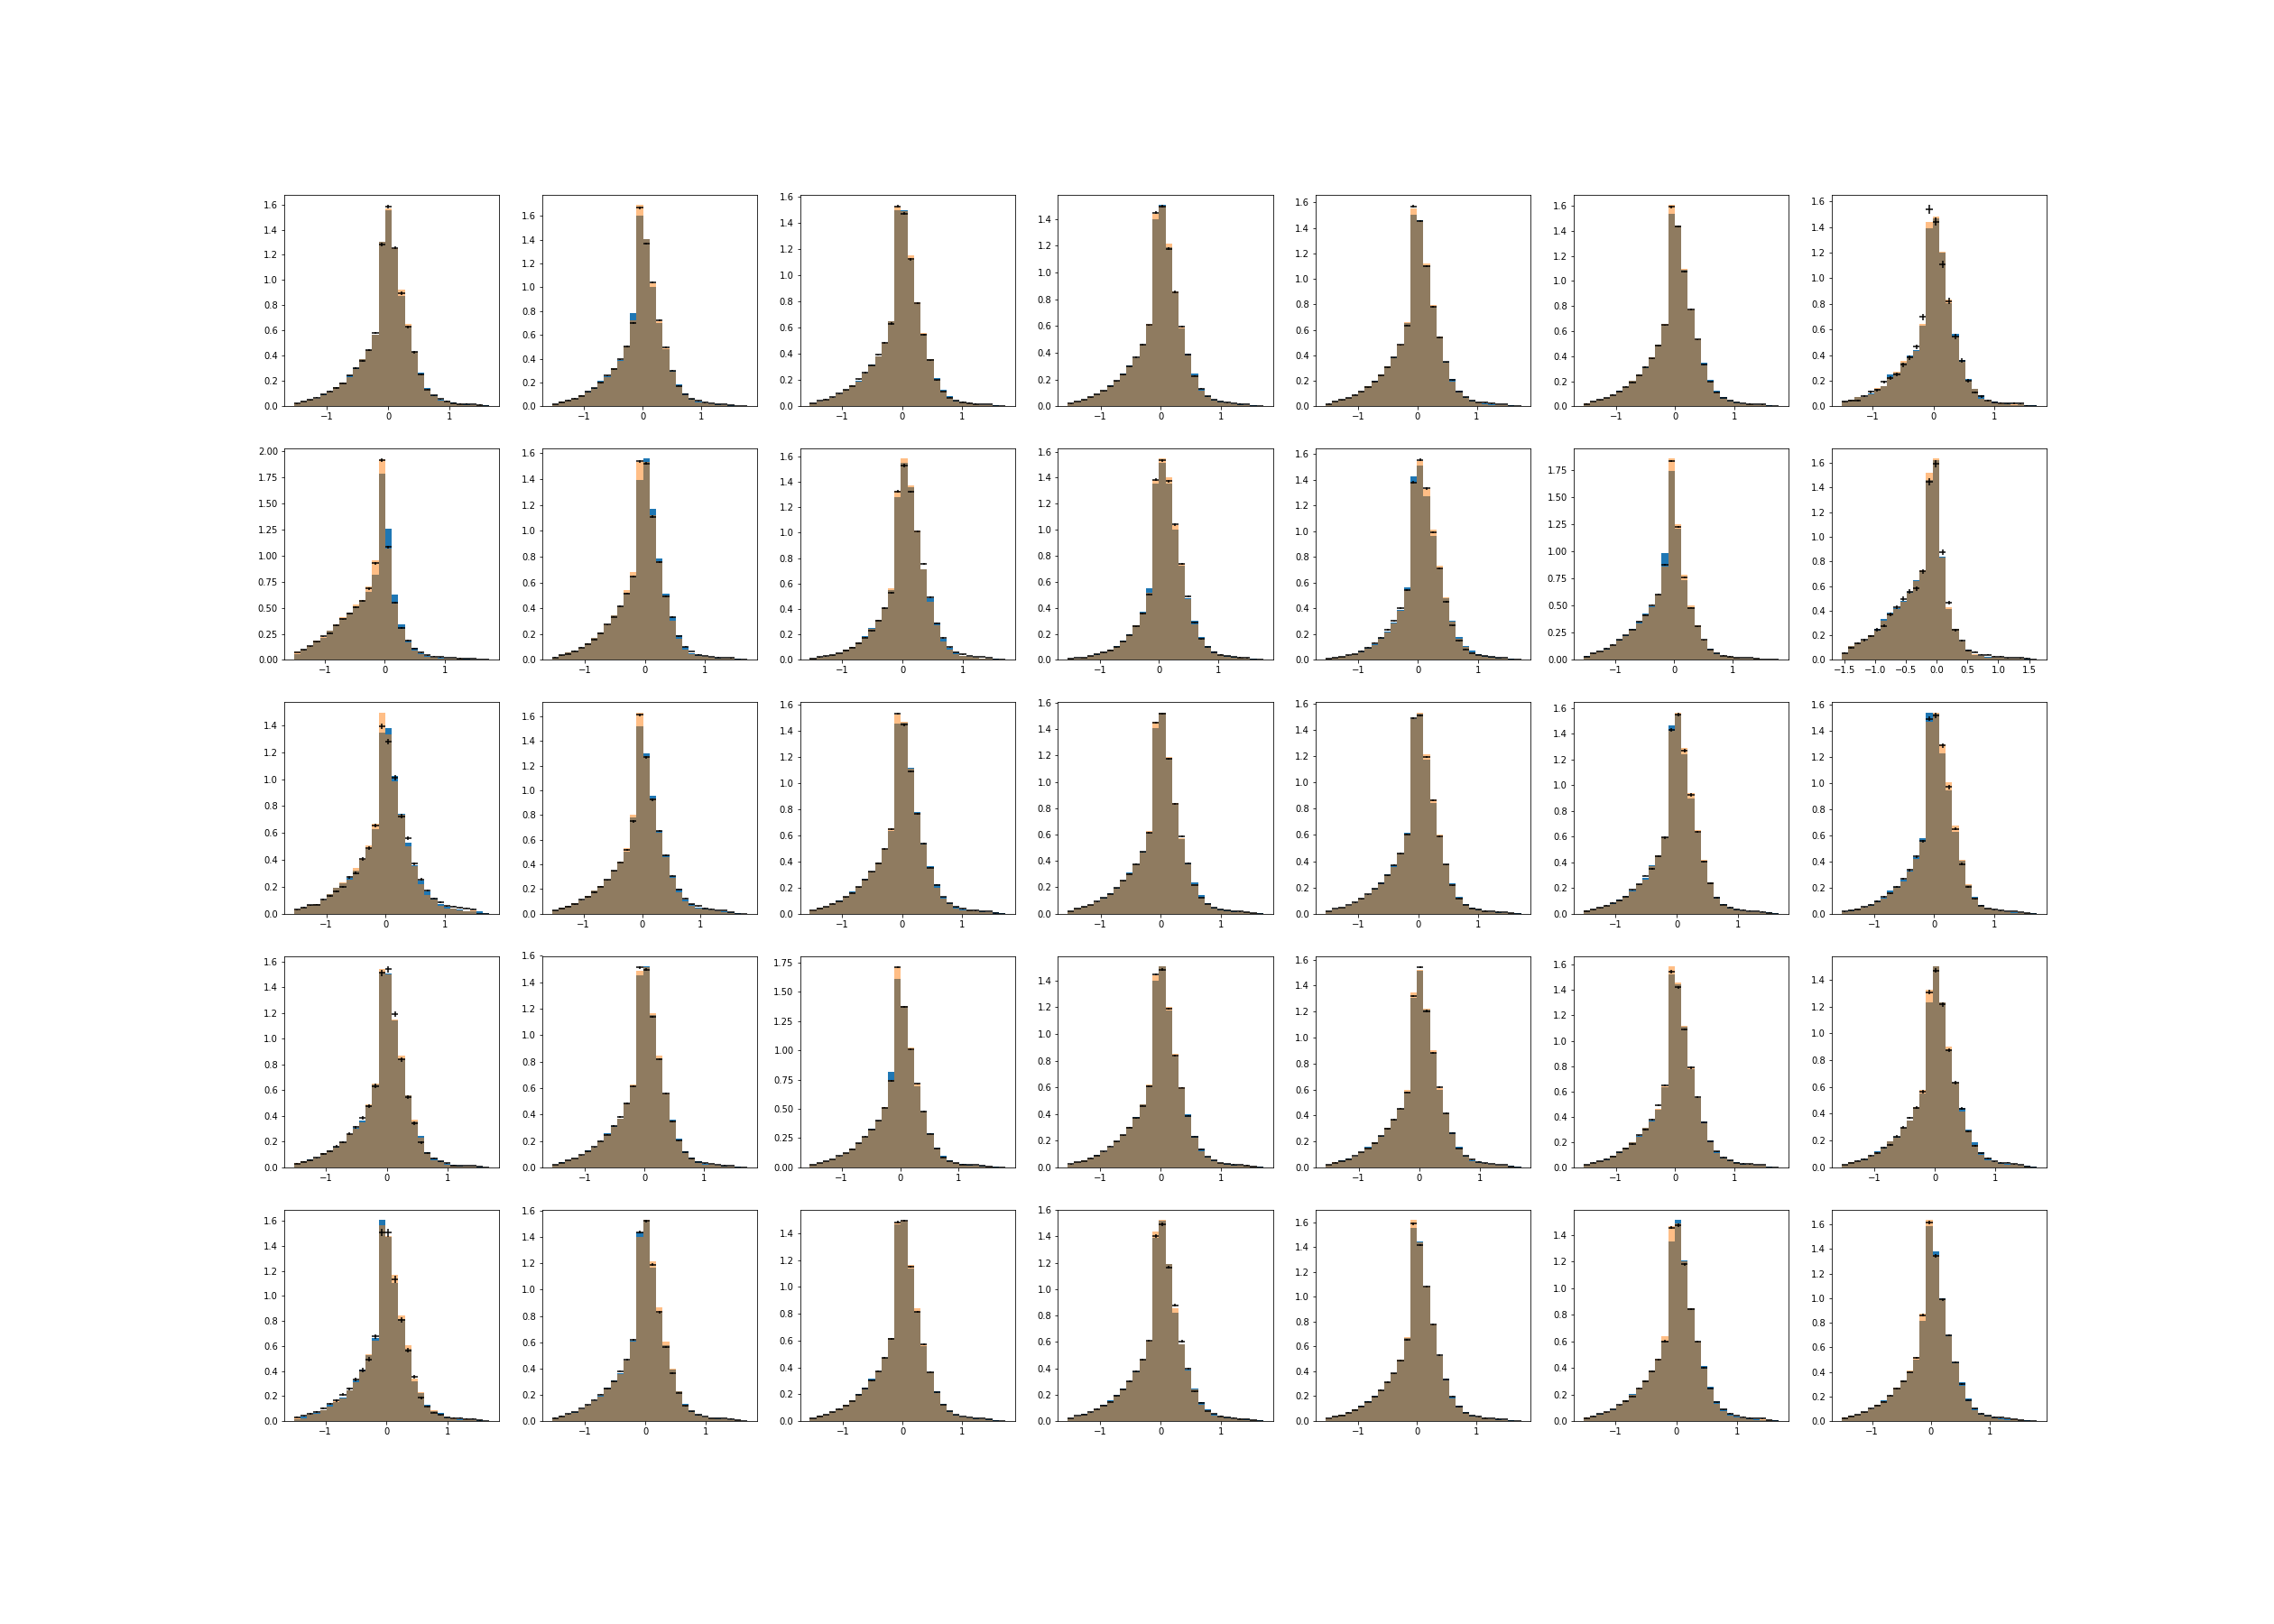

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var3.png


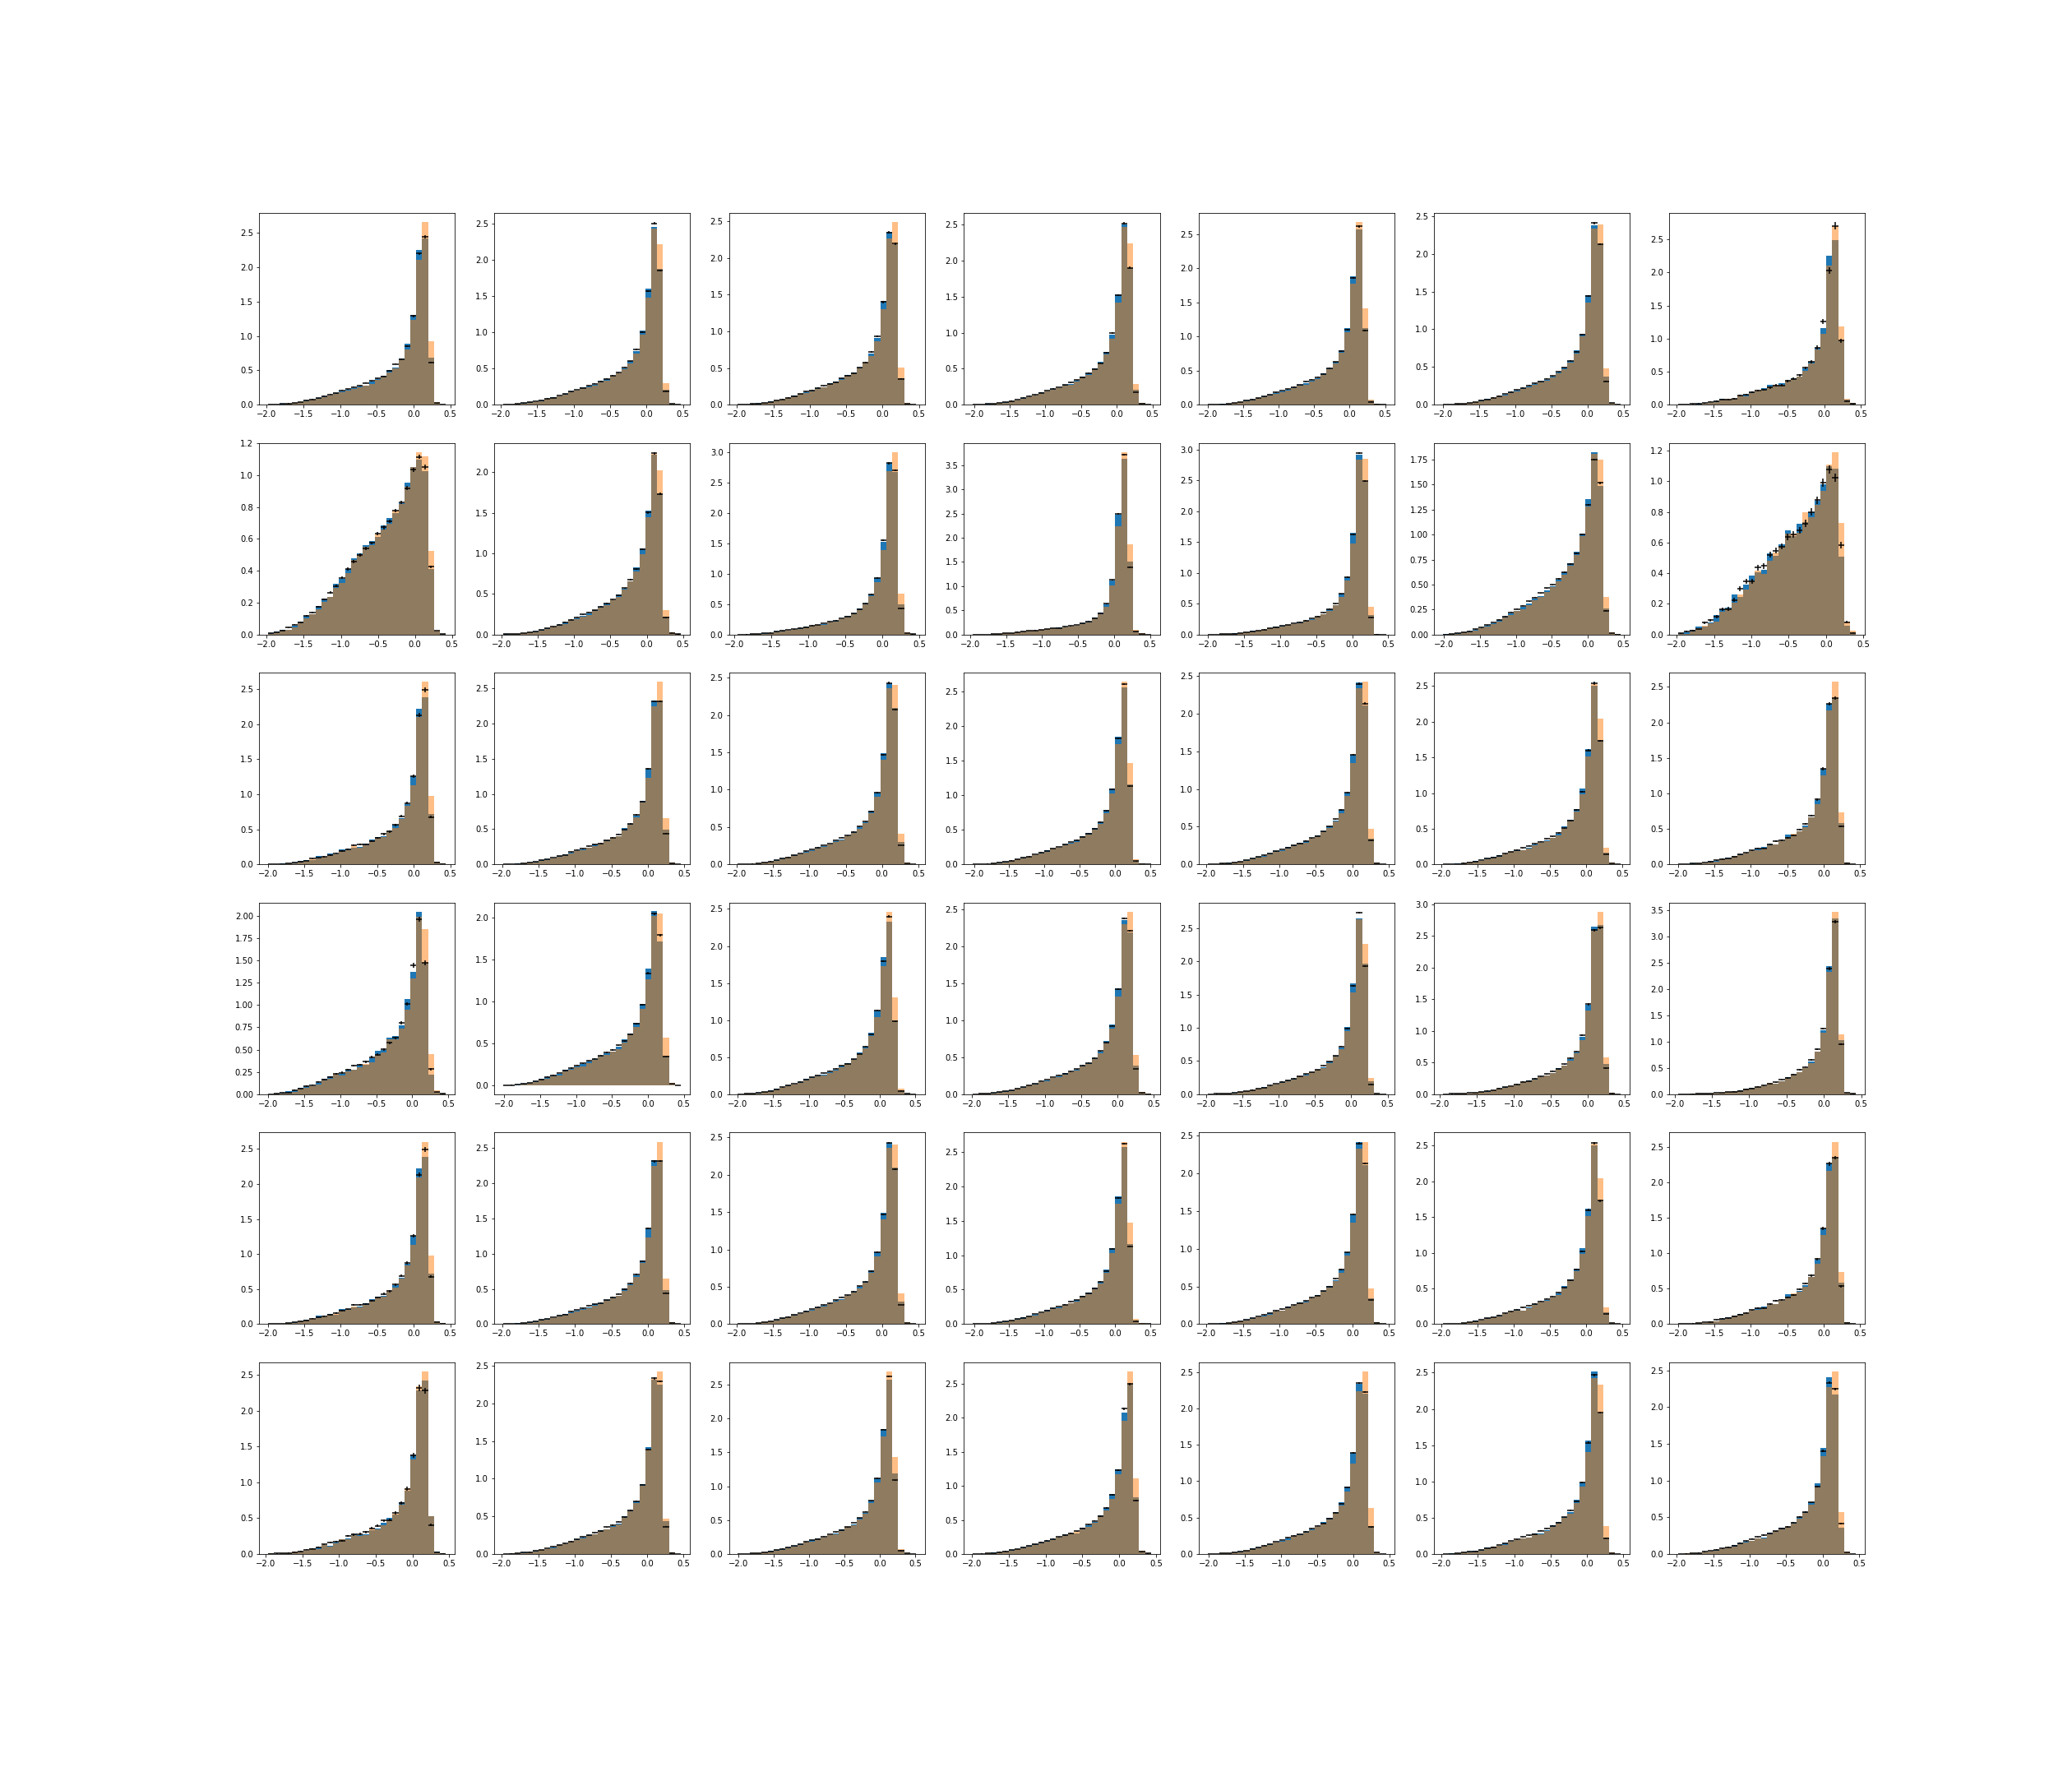

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var3.png


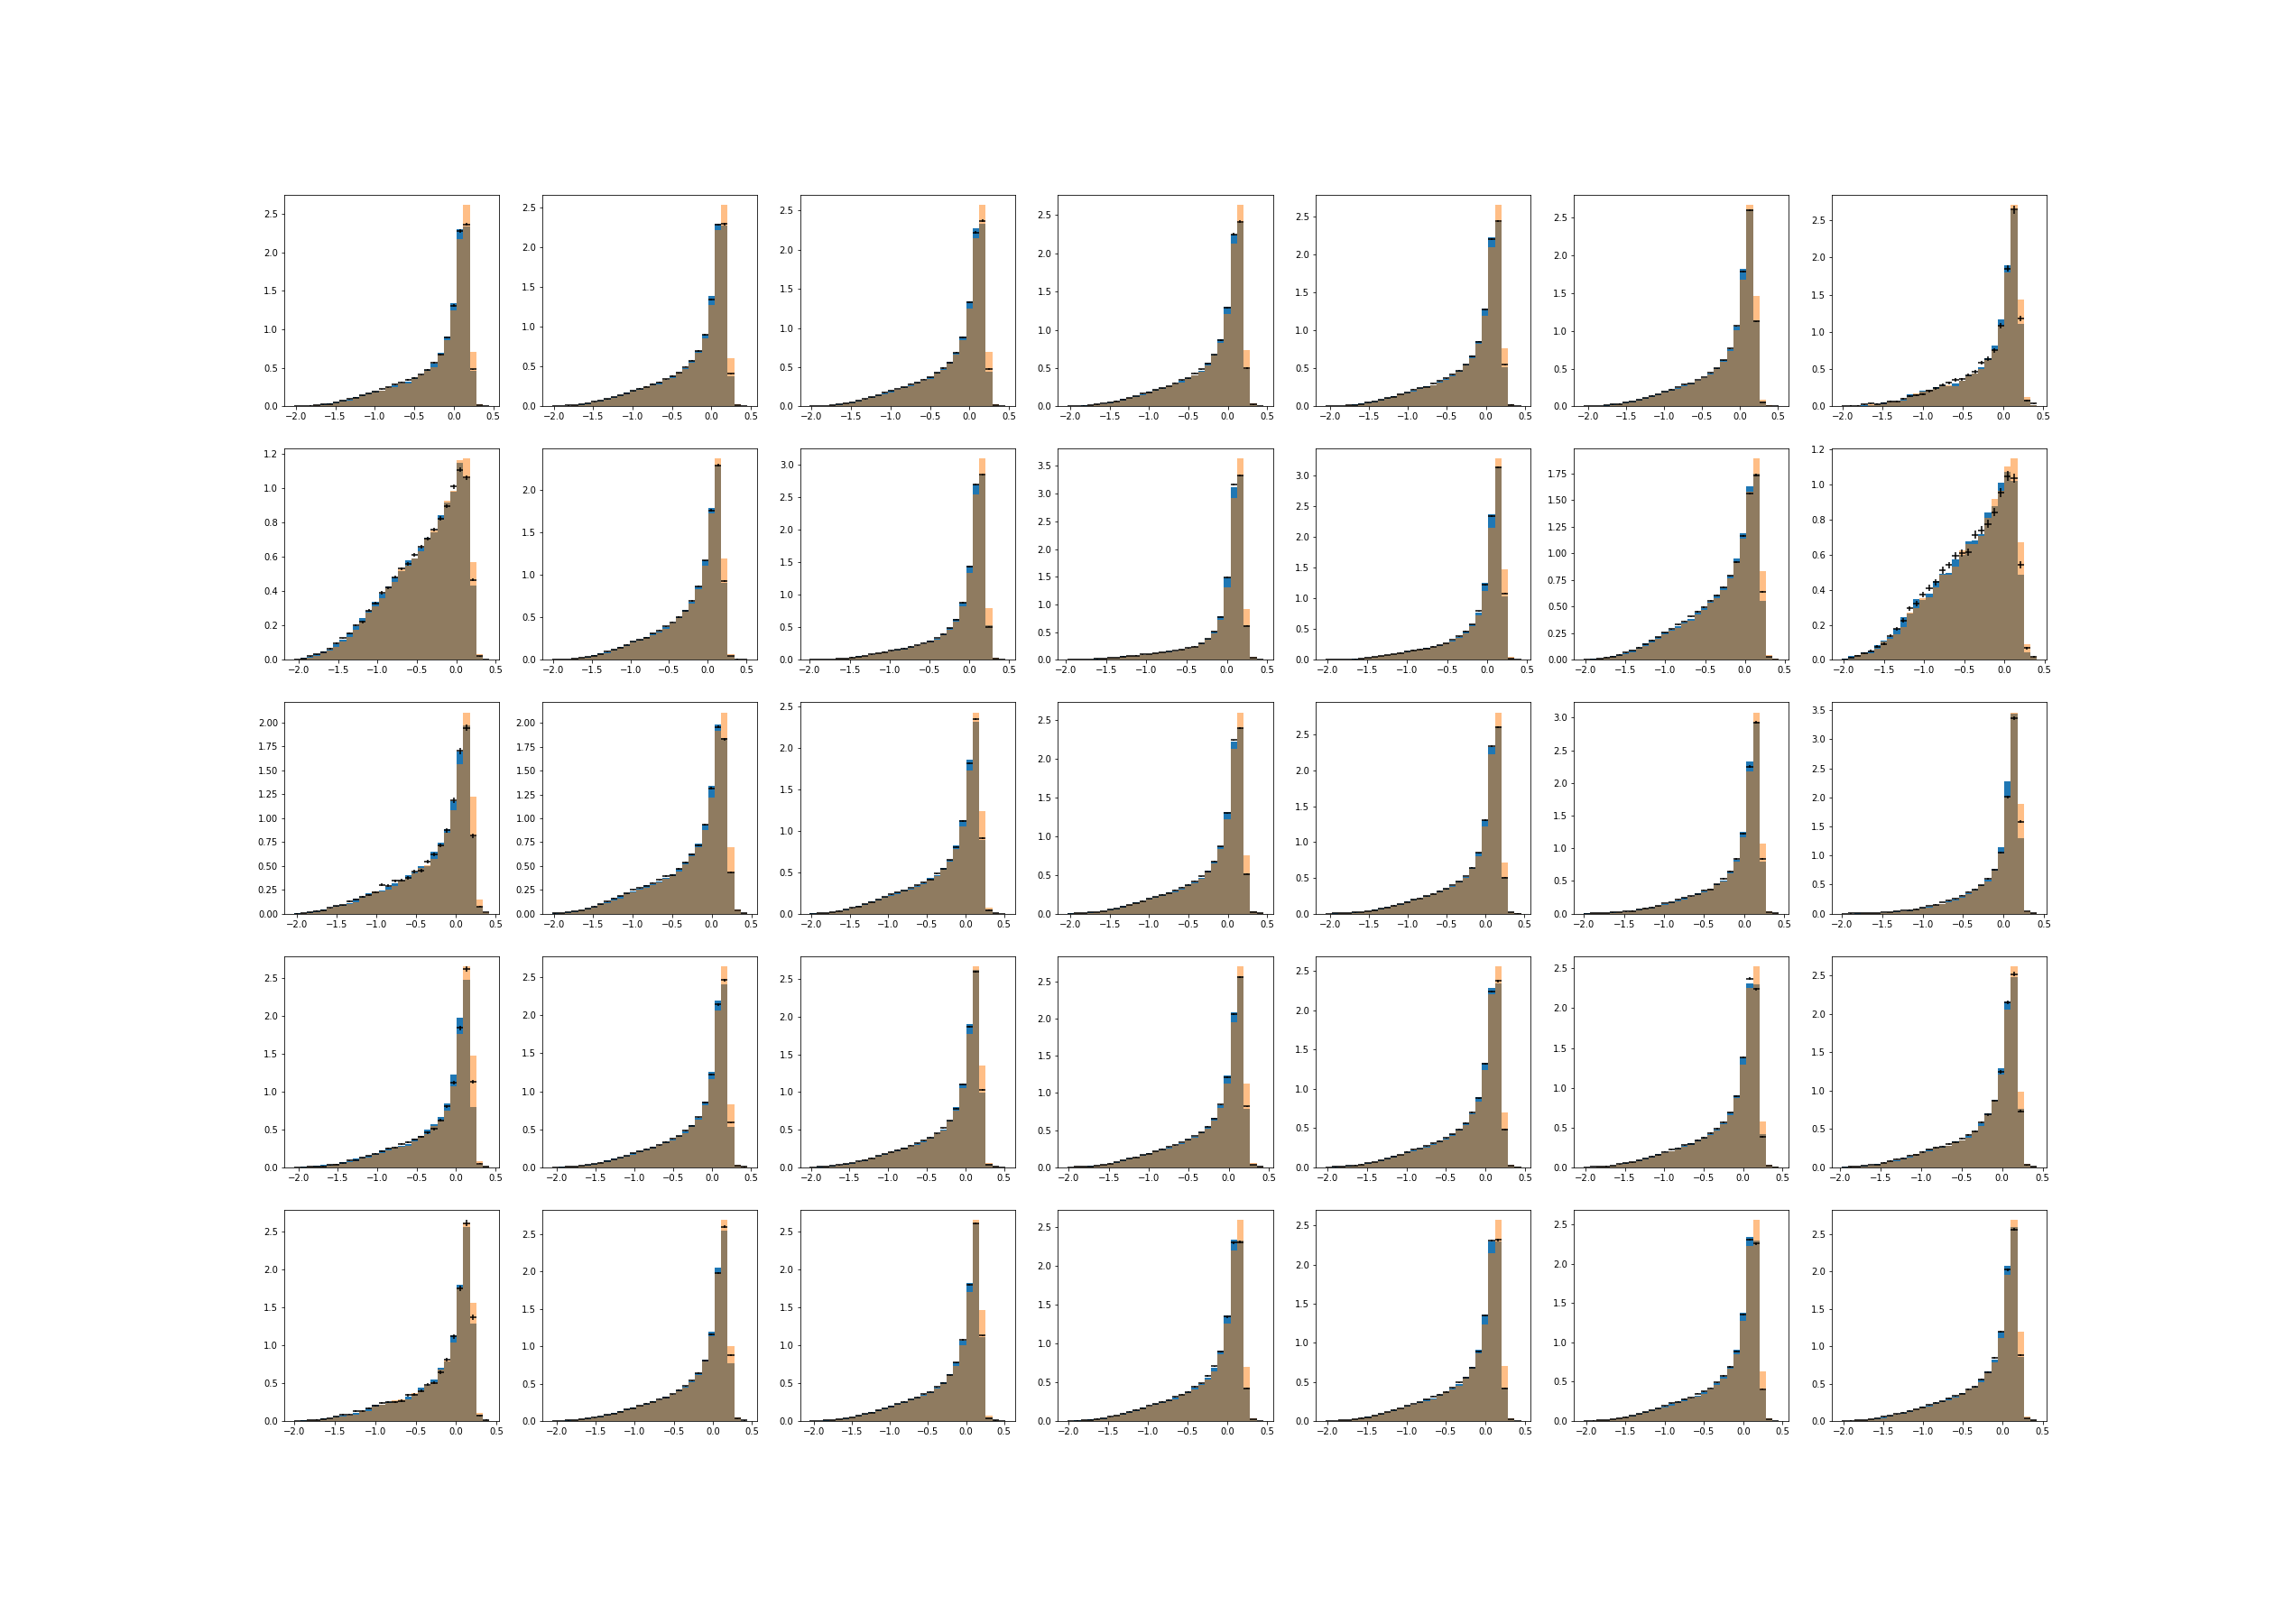

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var3.png


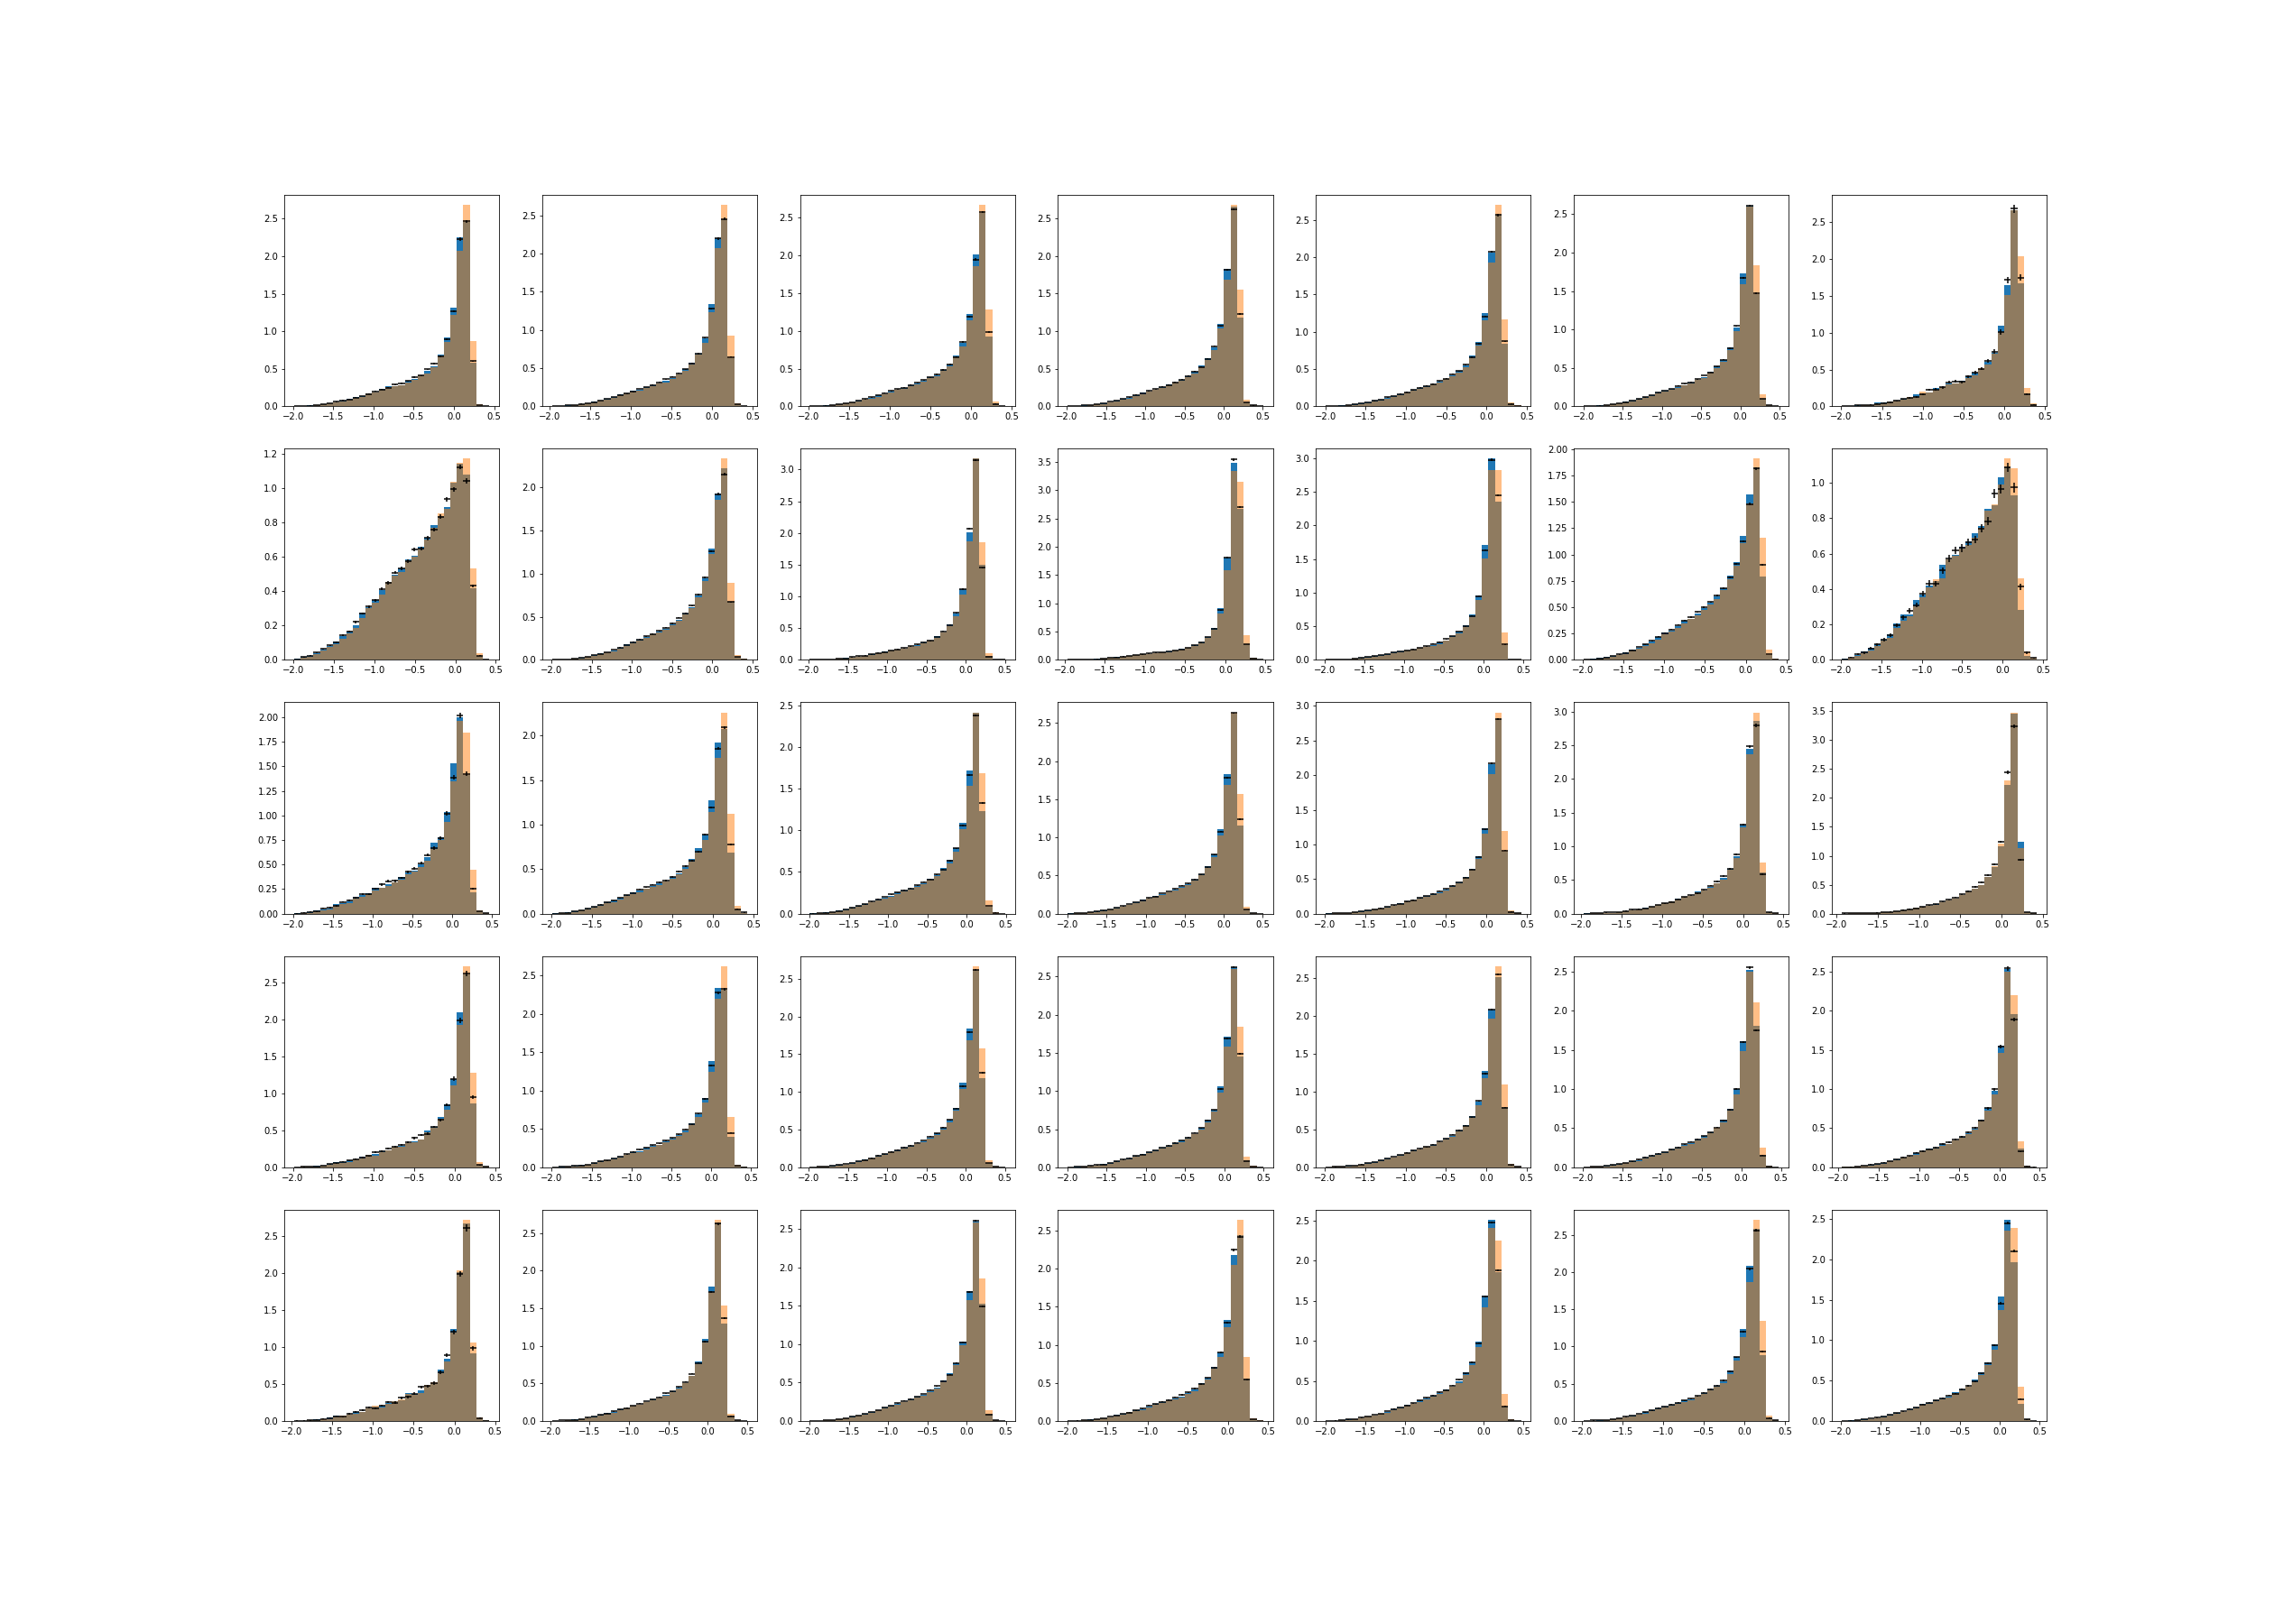

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var4.png


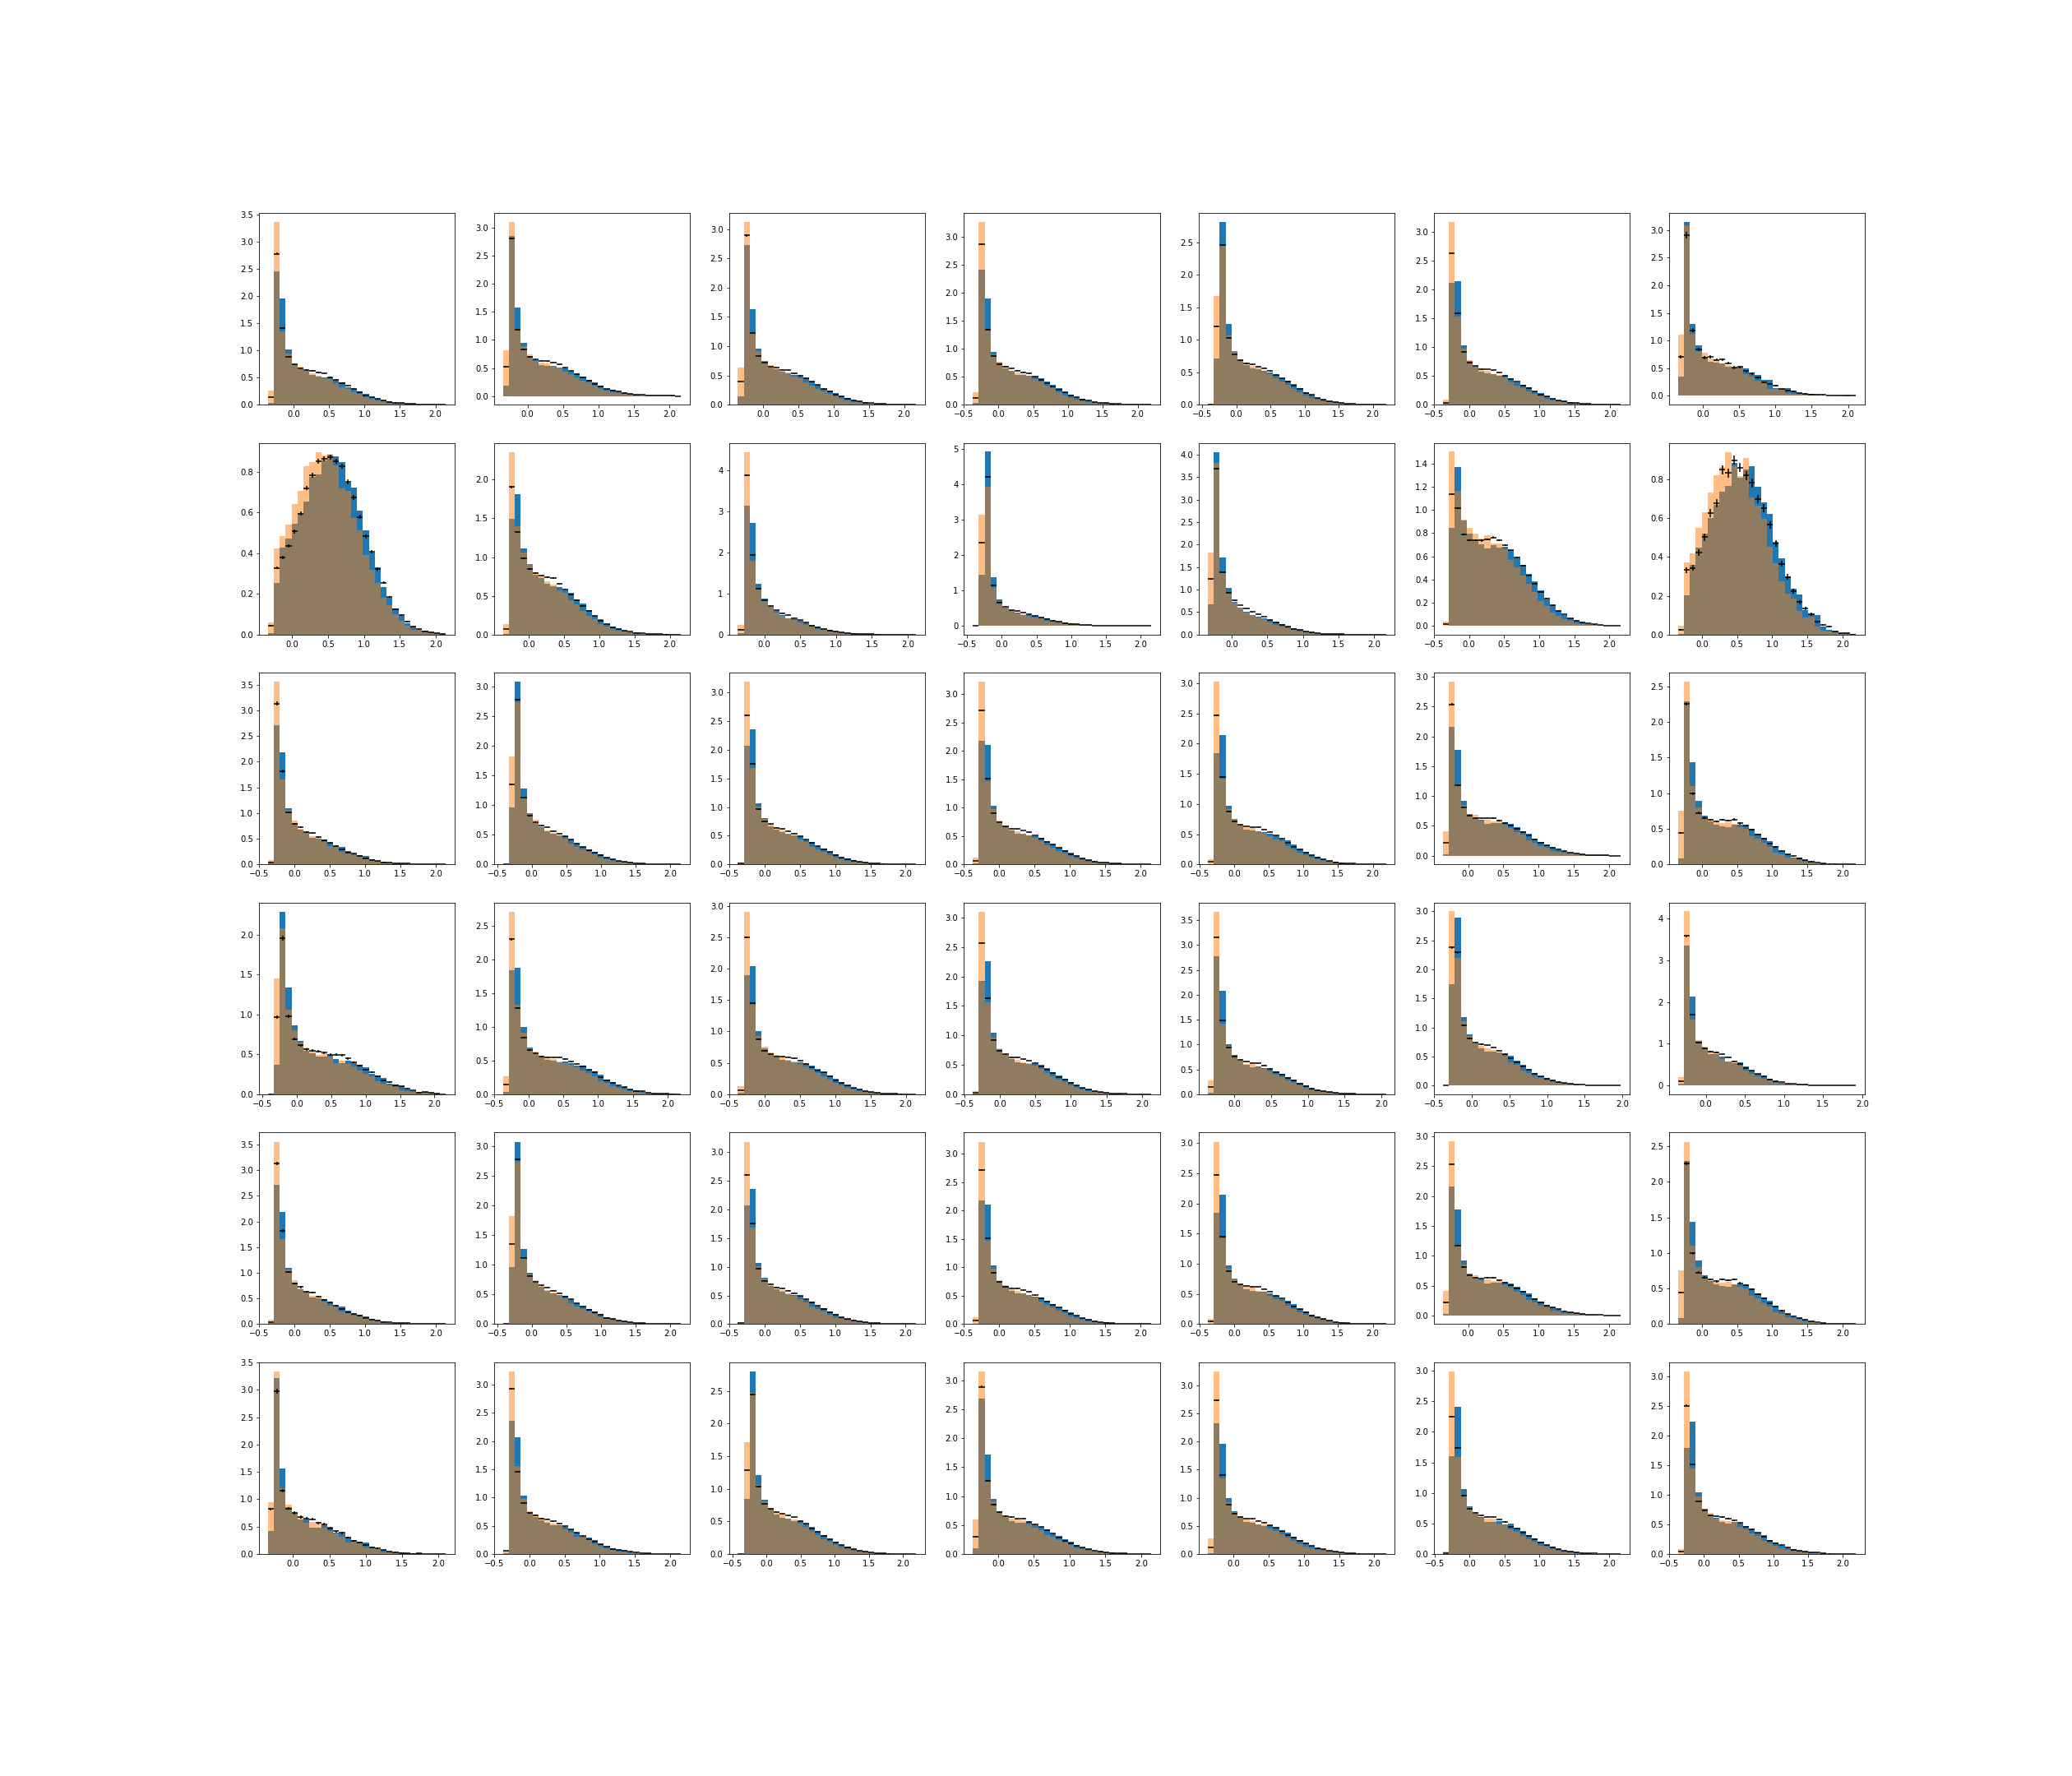

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var4.png


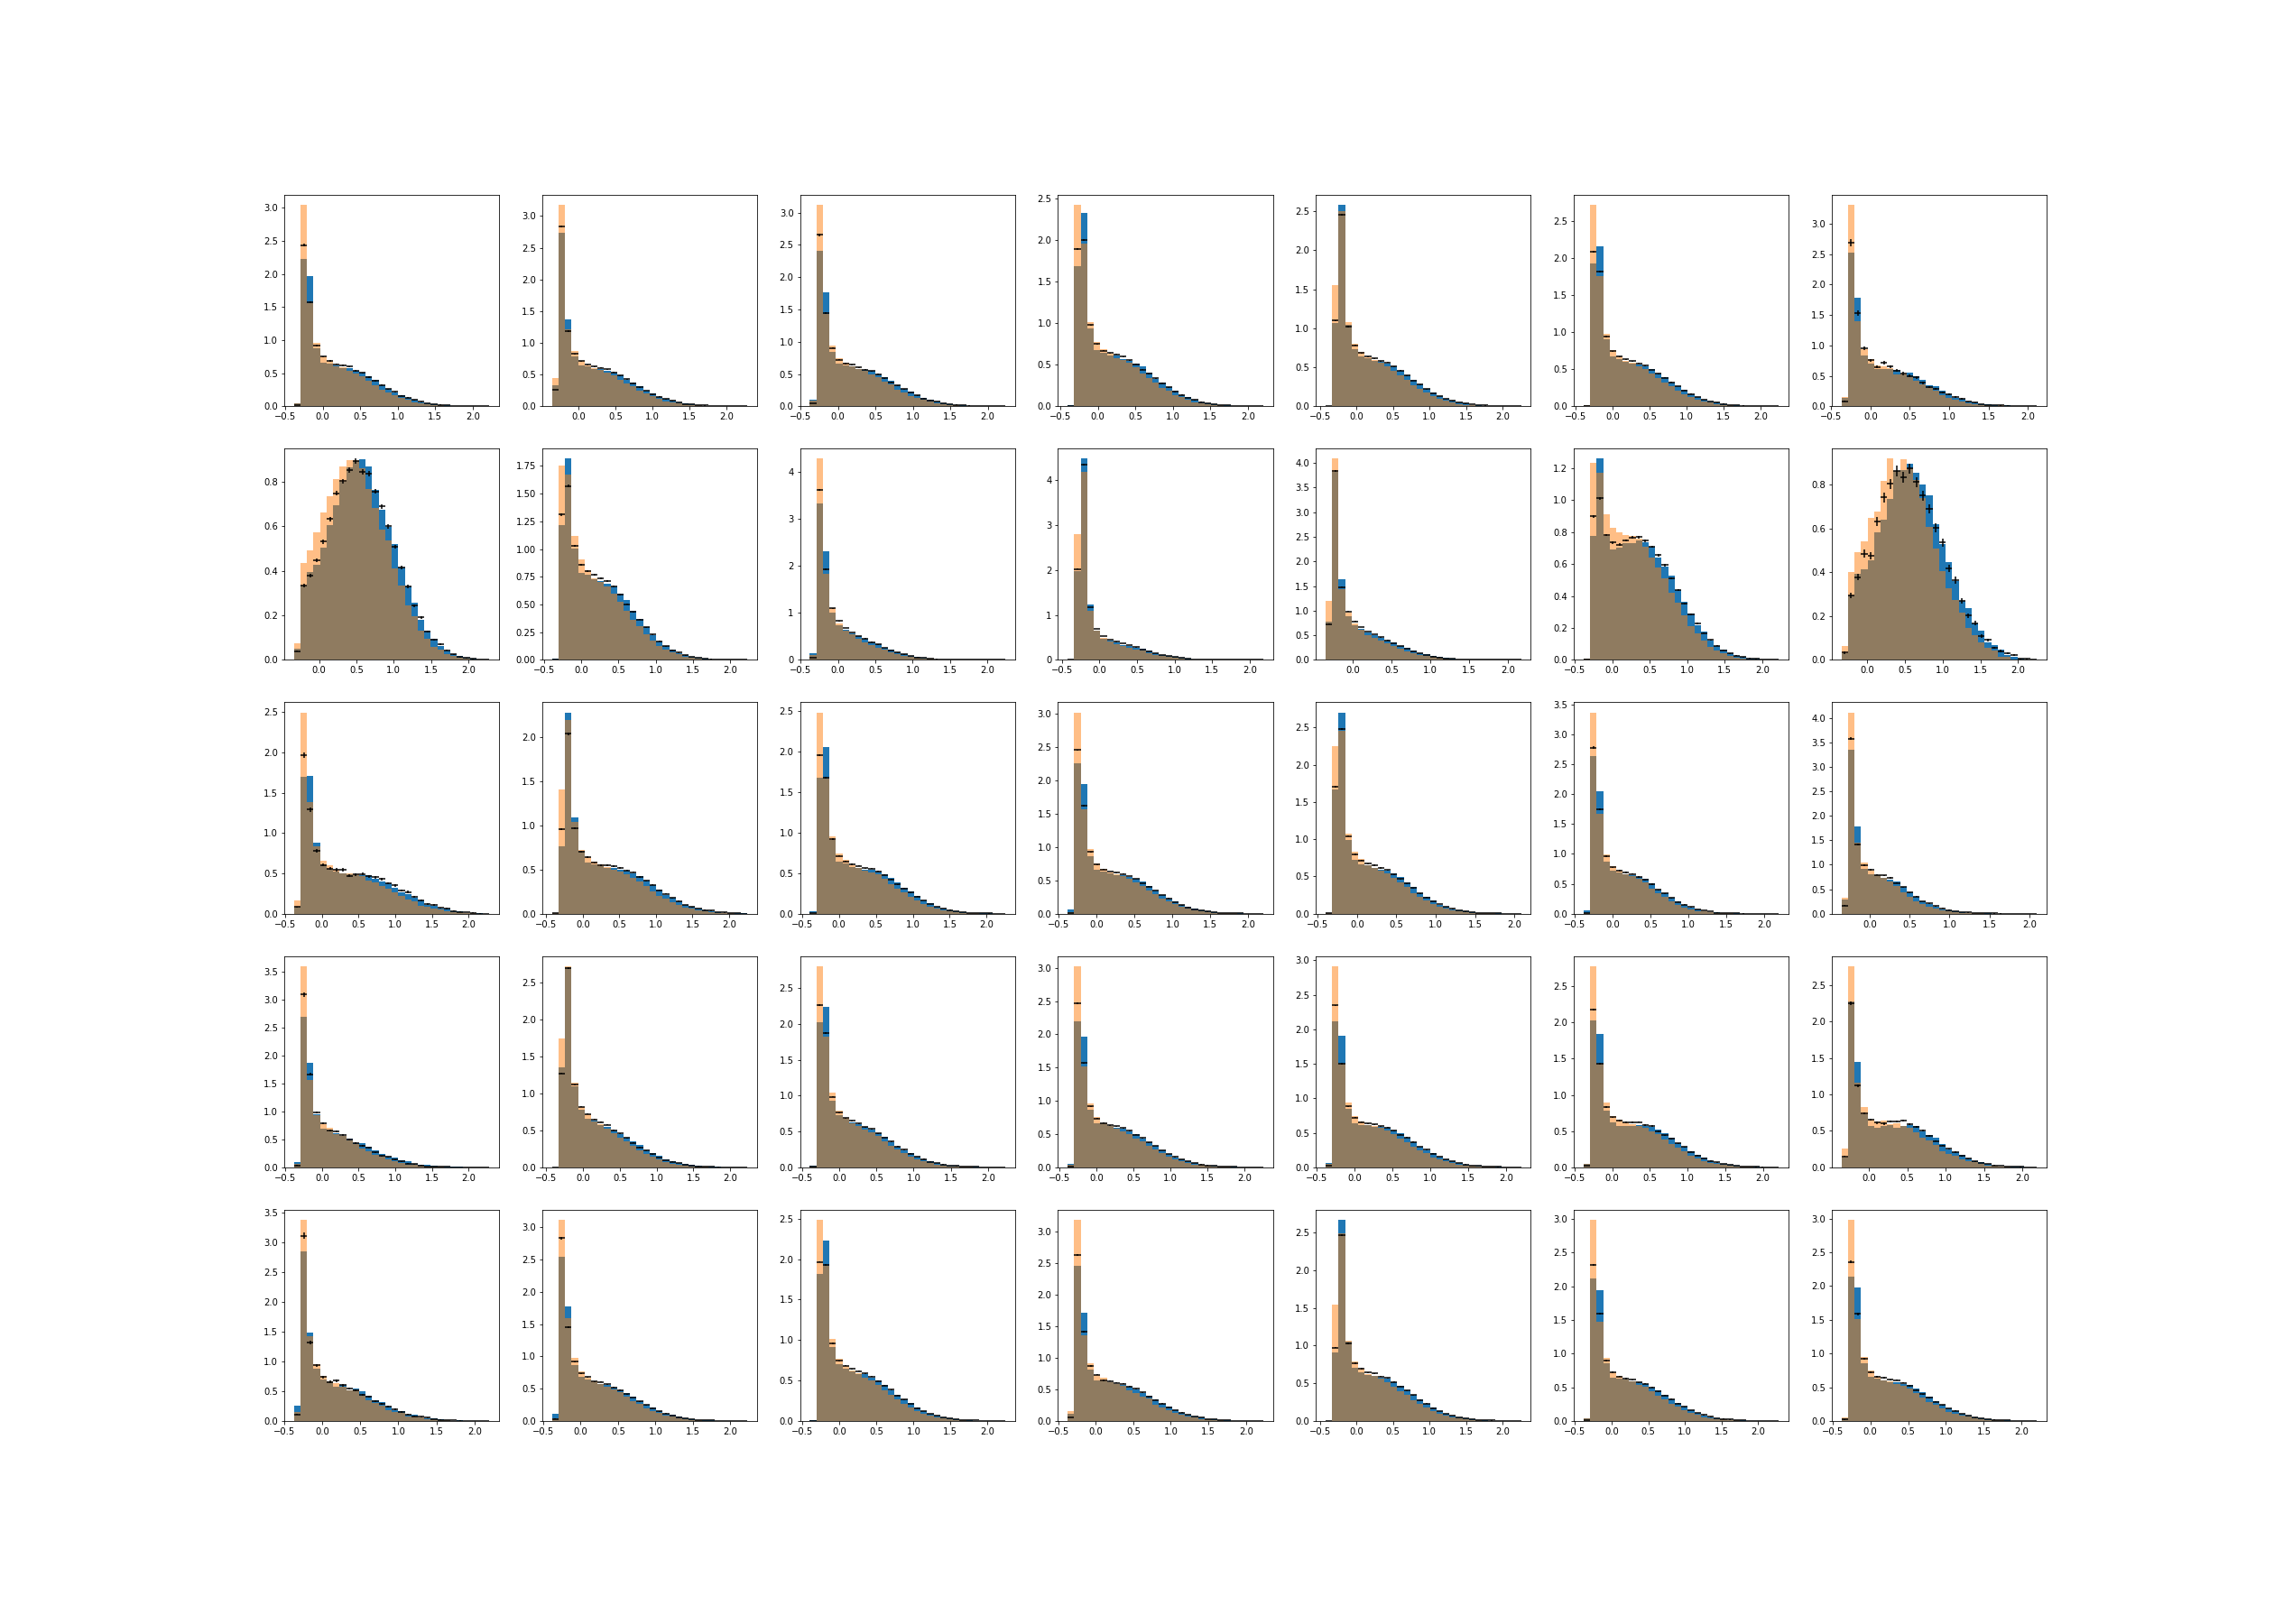

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var4.png


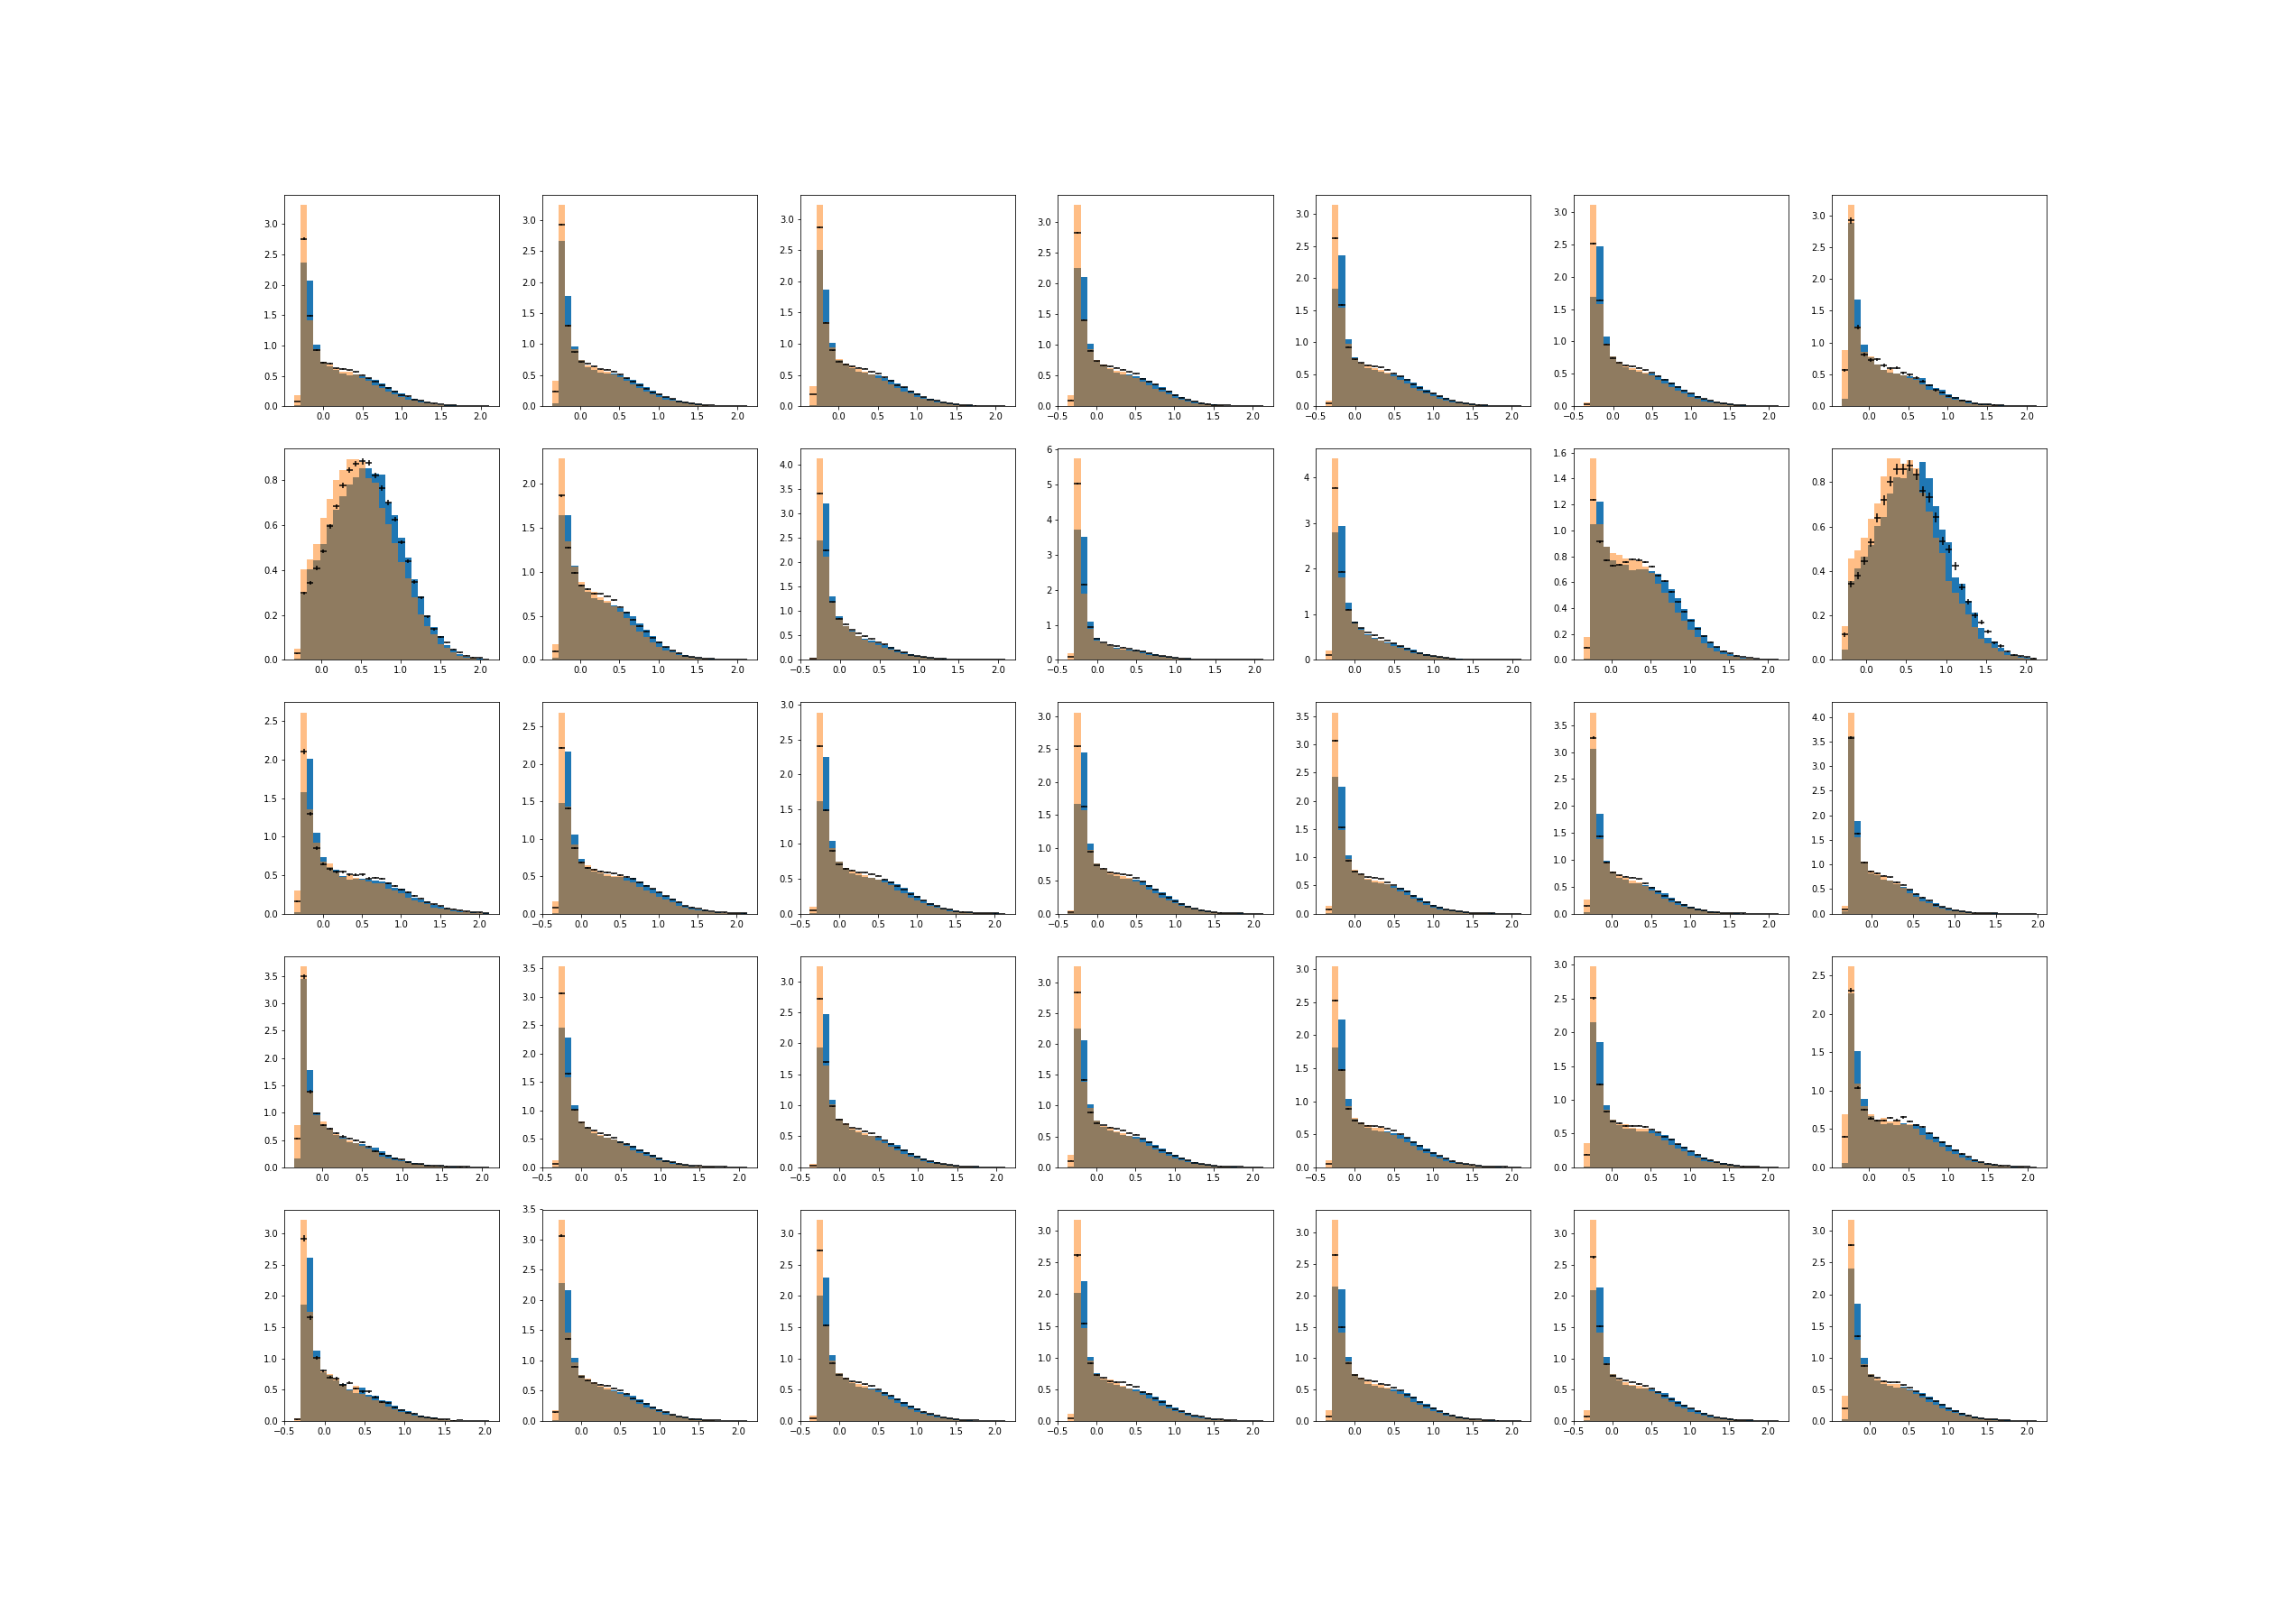

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var5.png


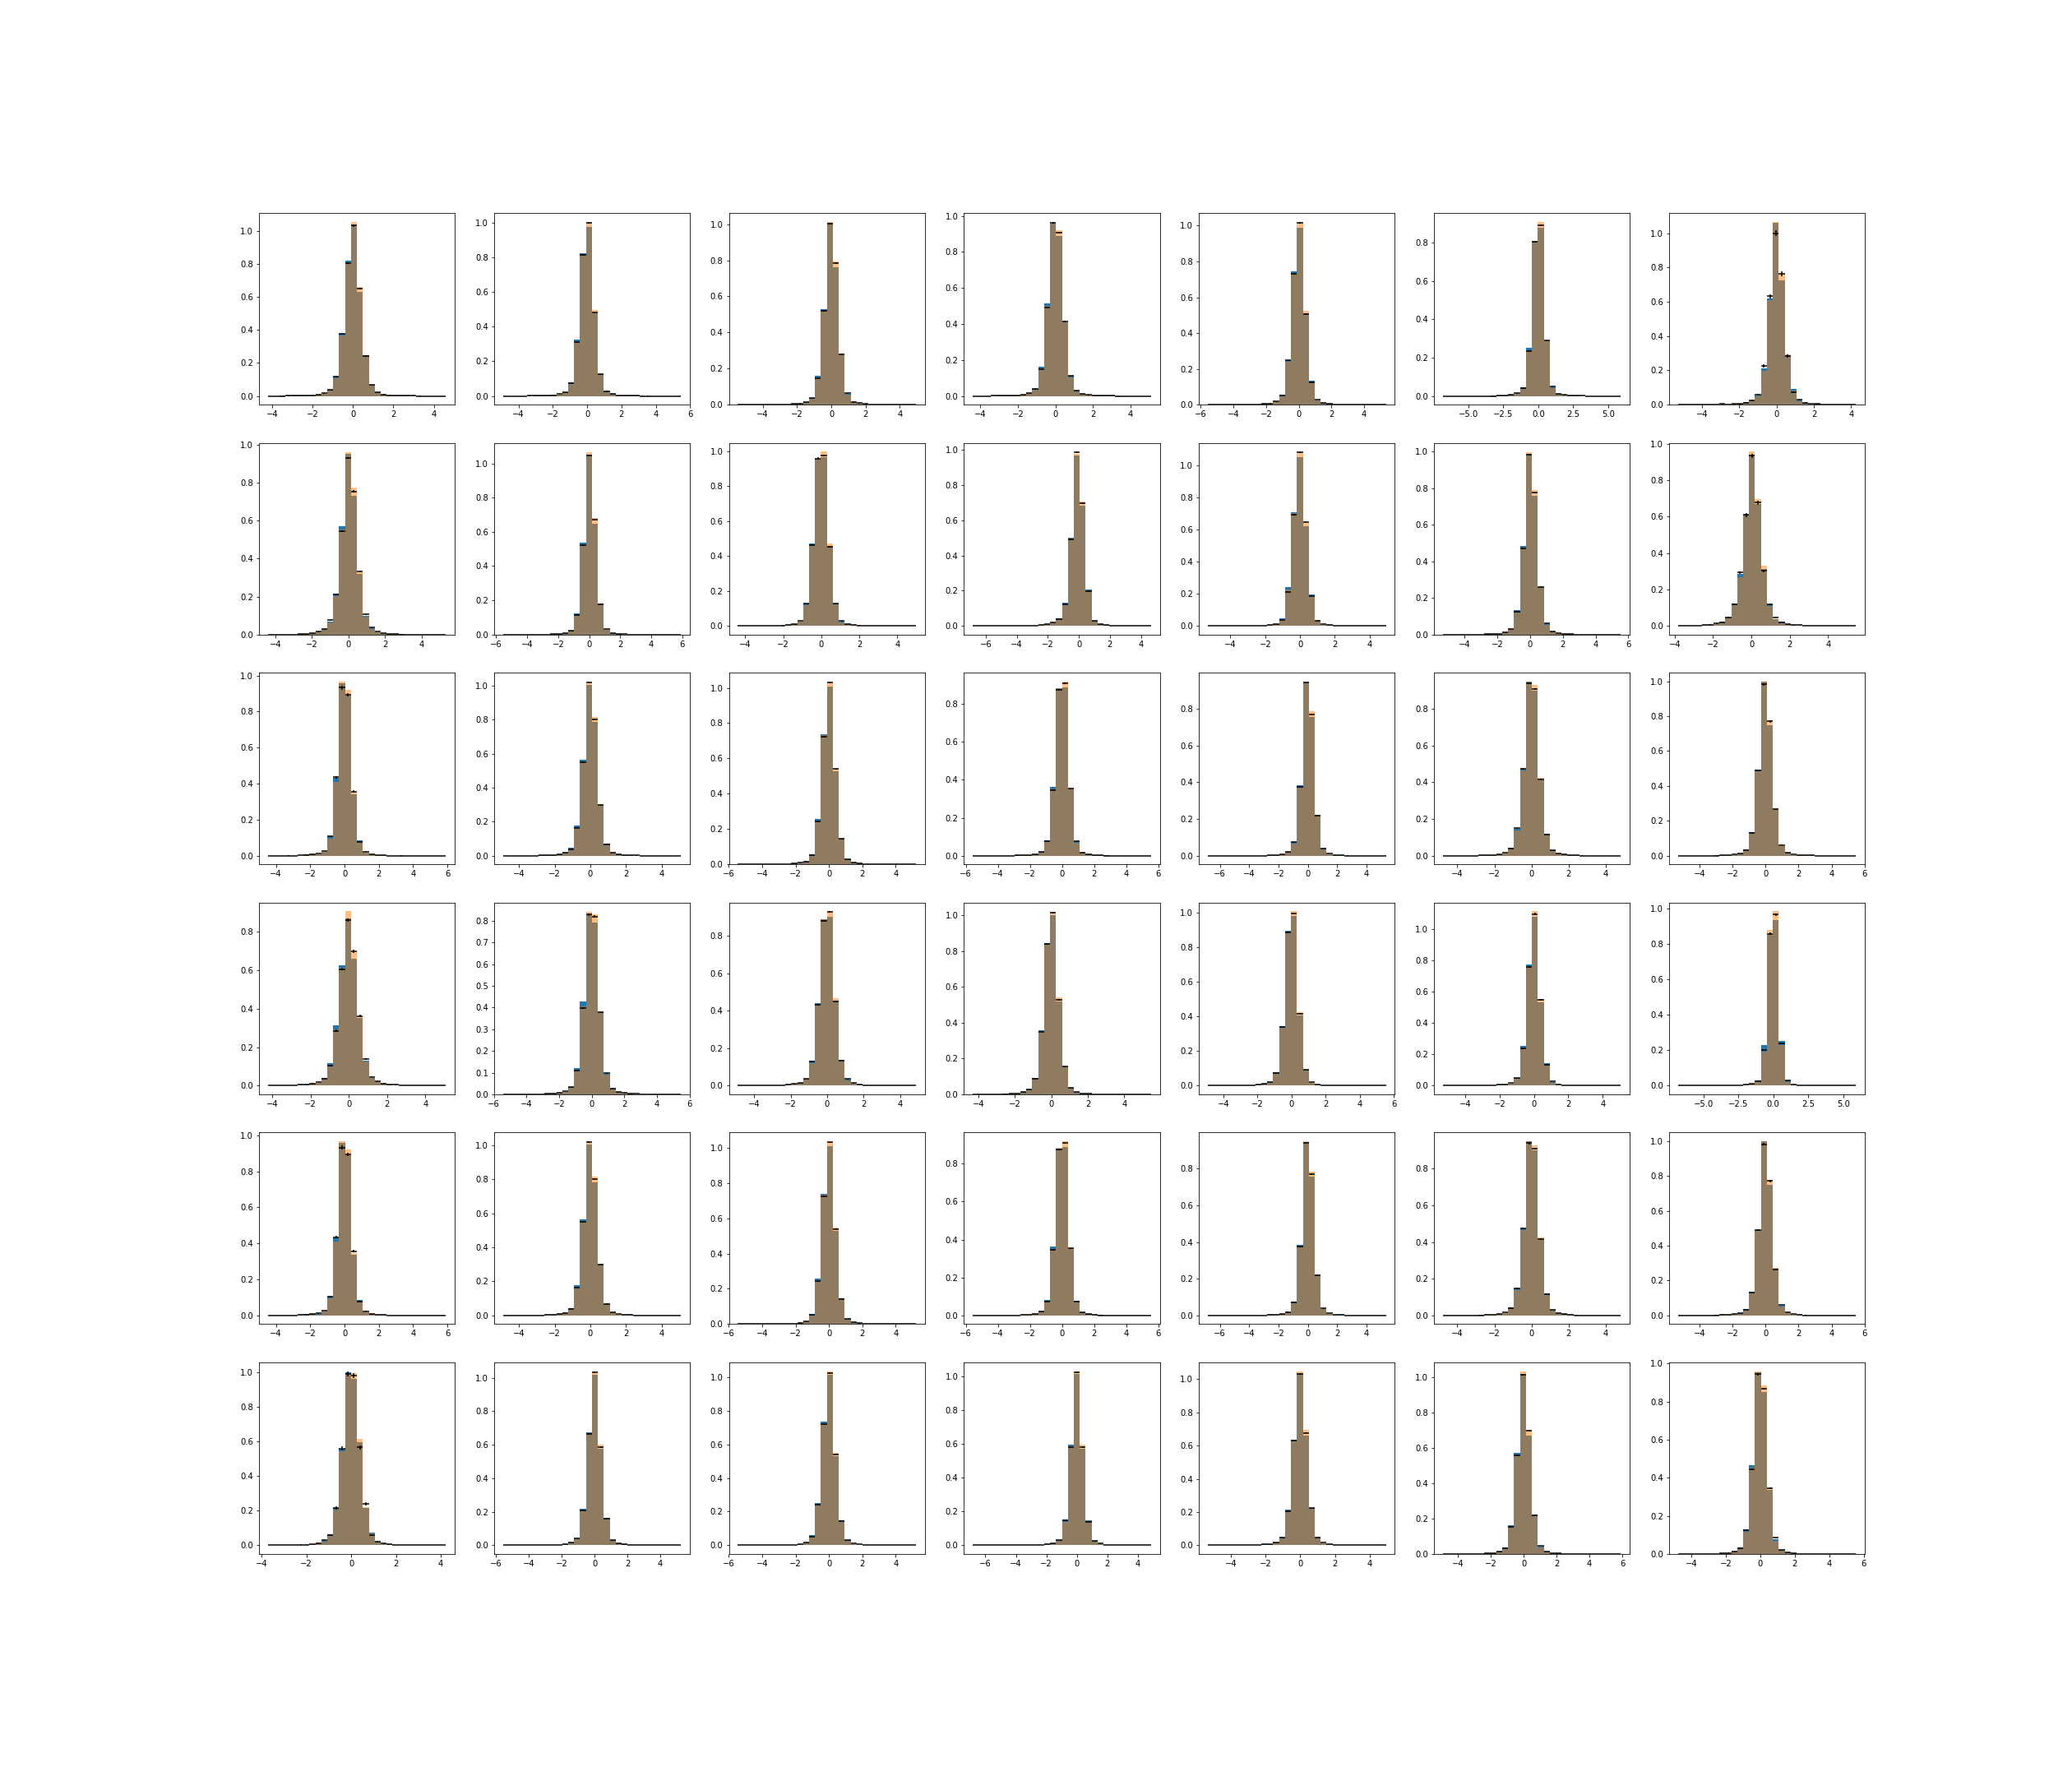

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var5.png


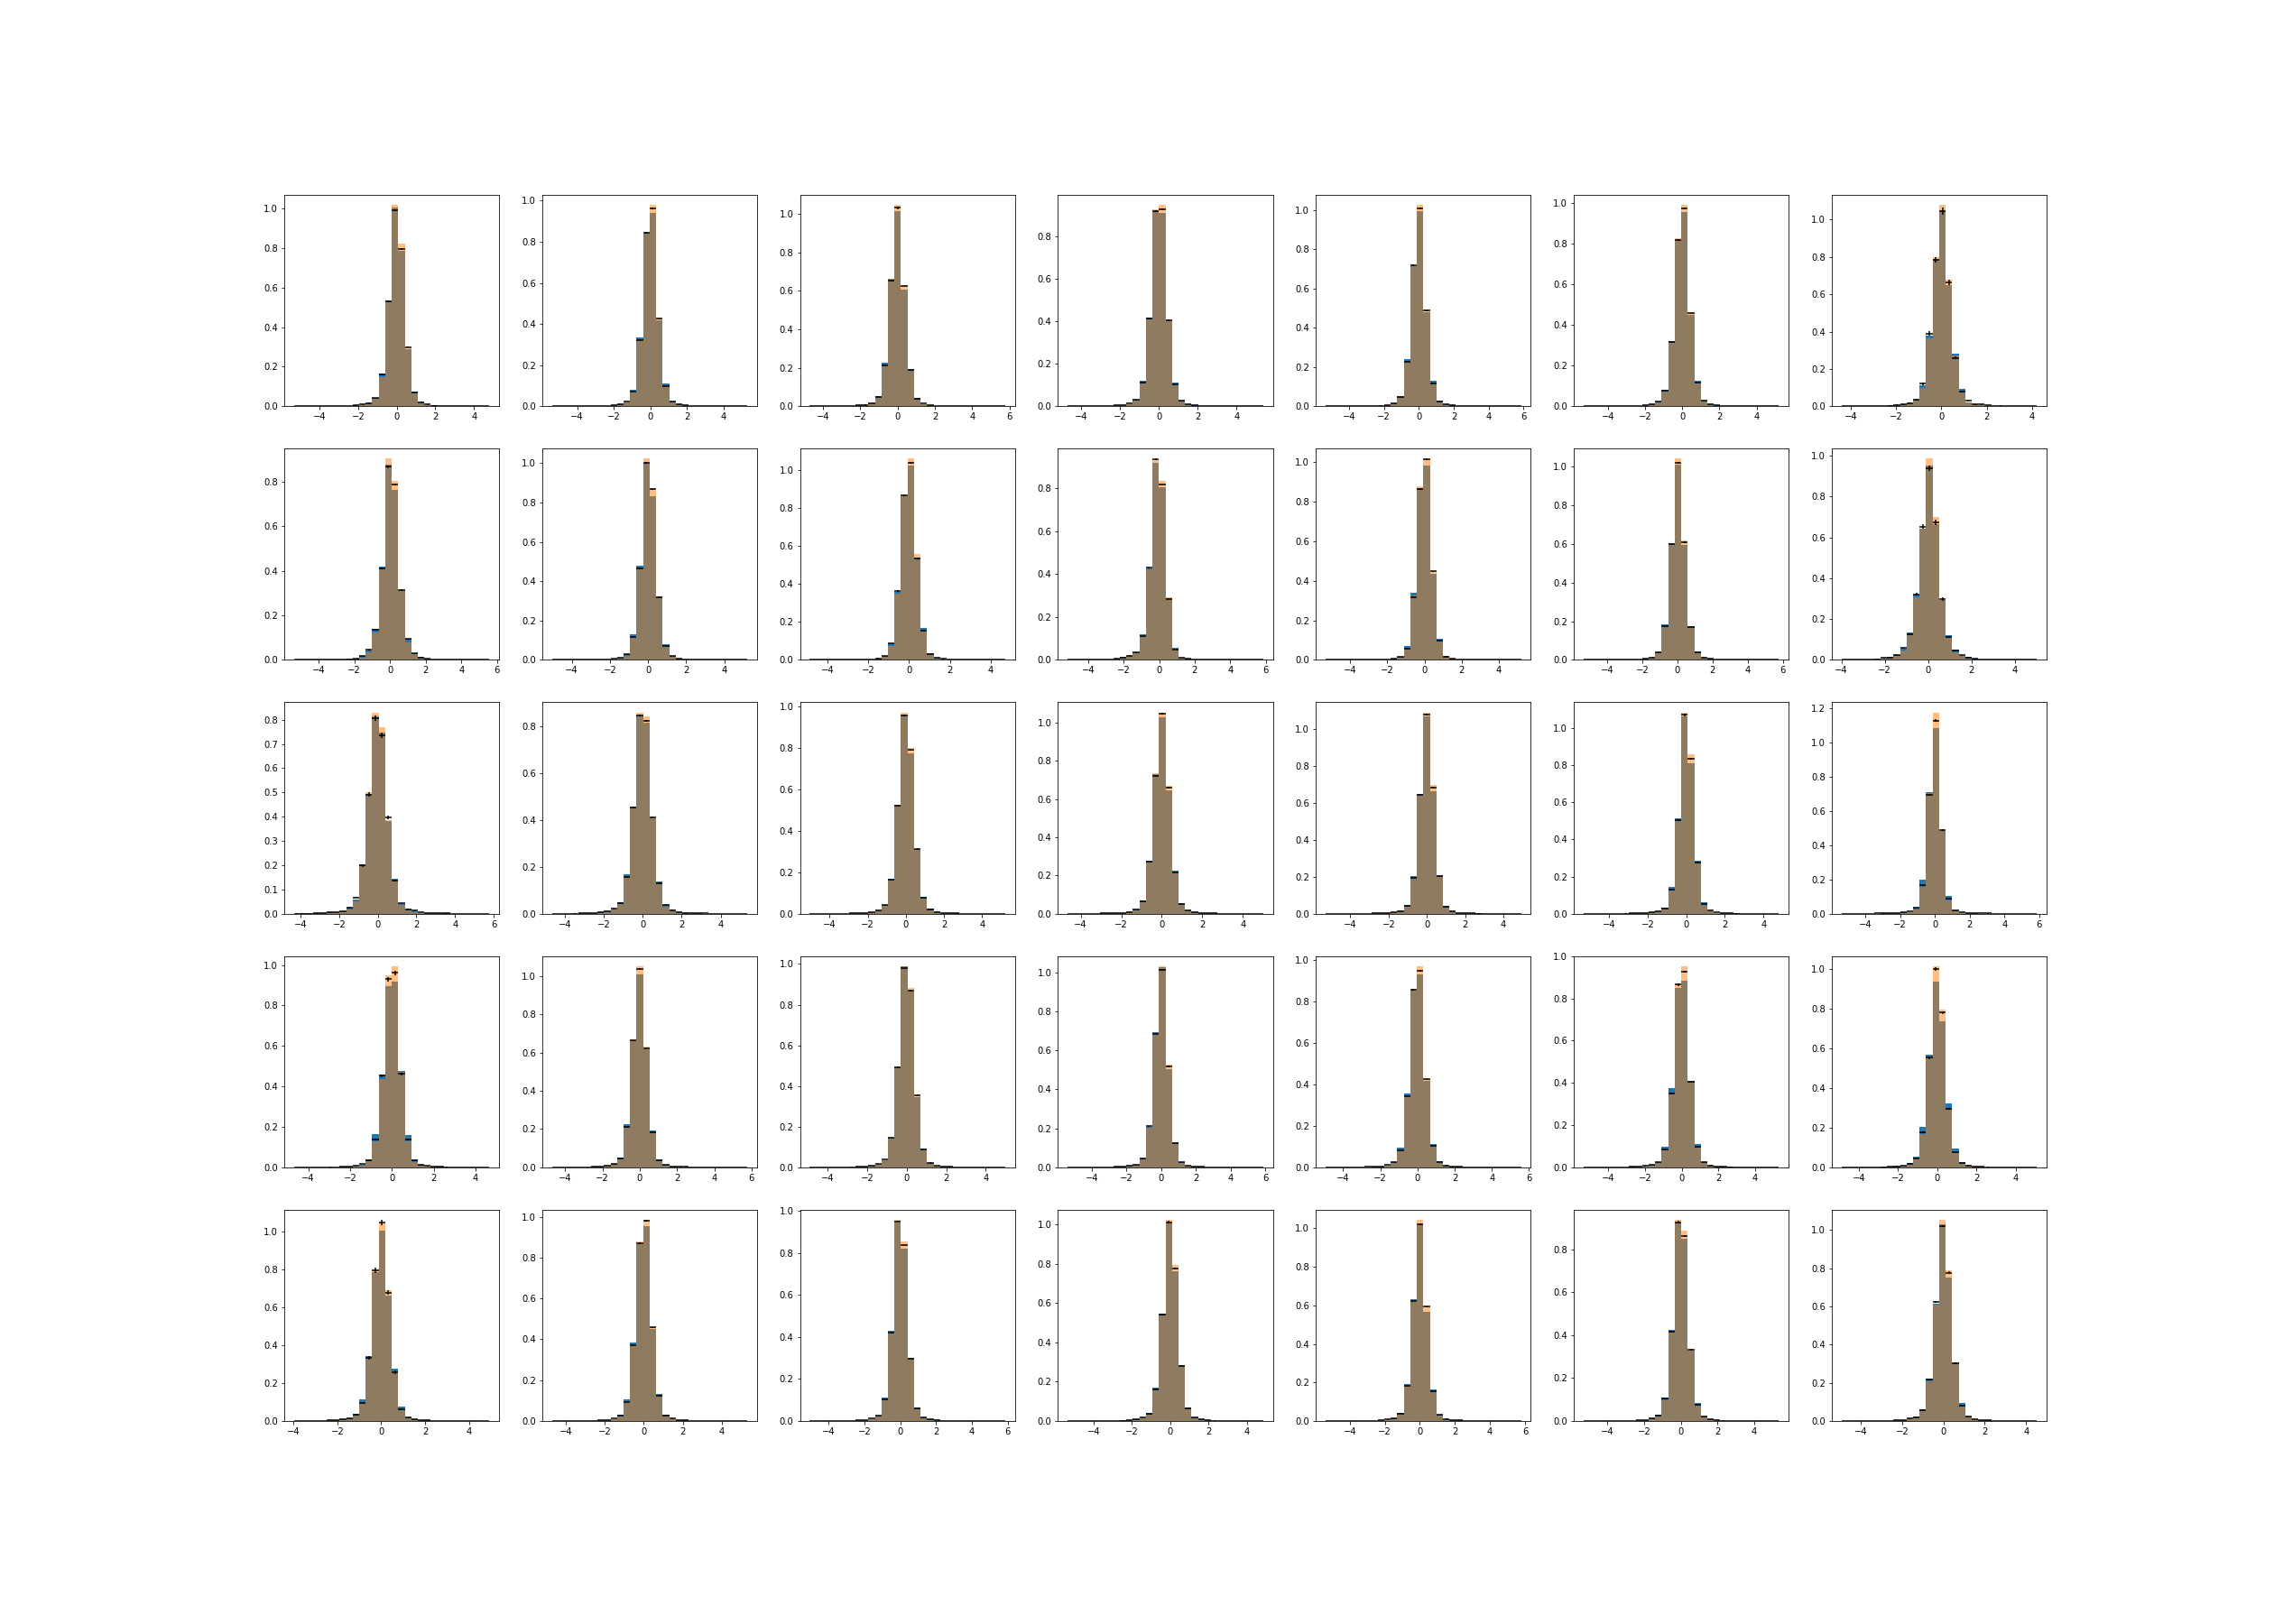

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var5.png


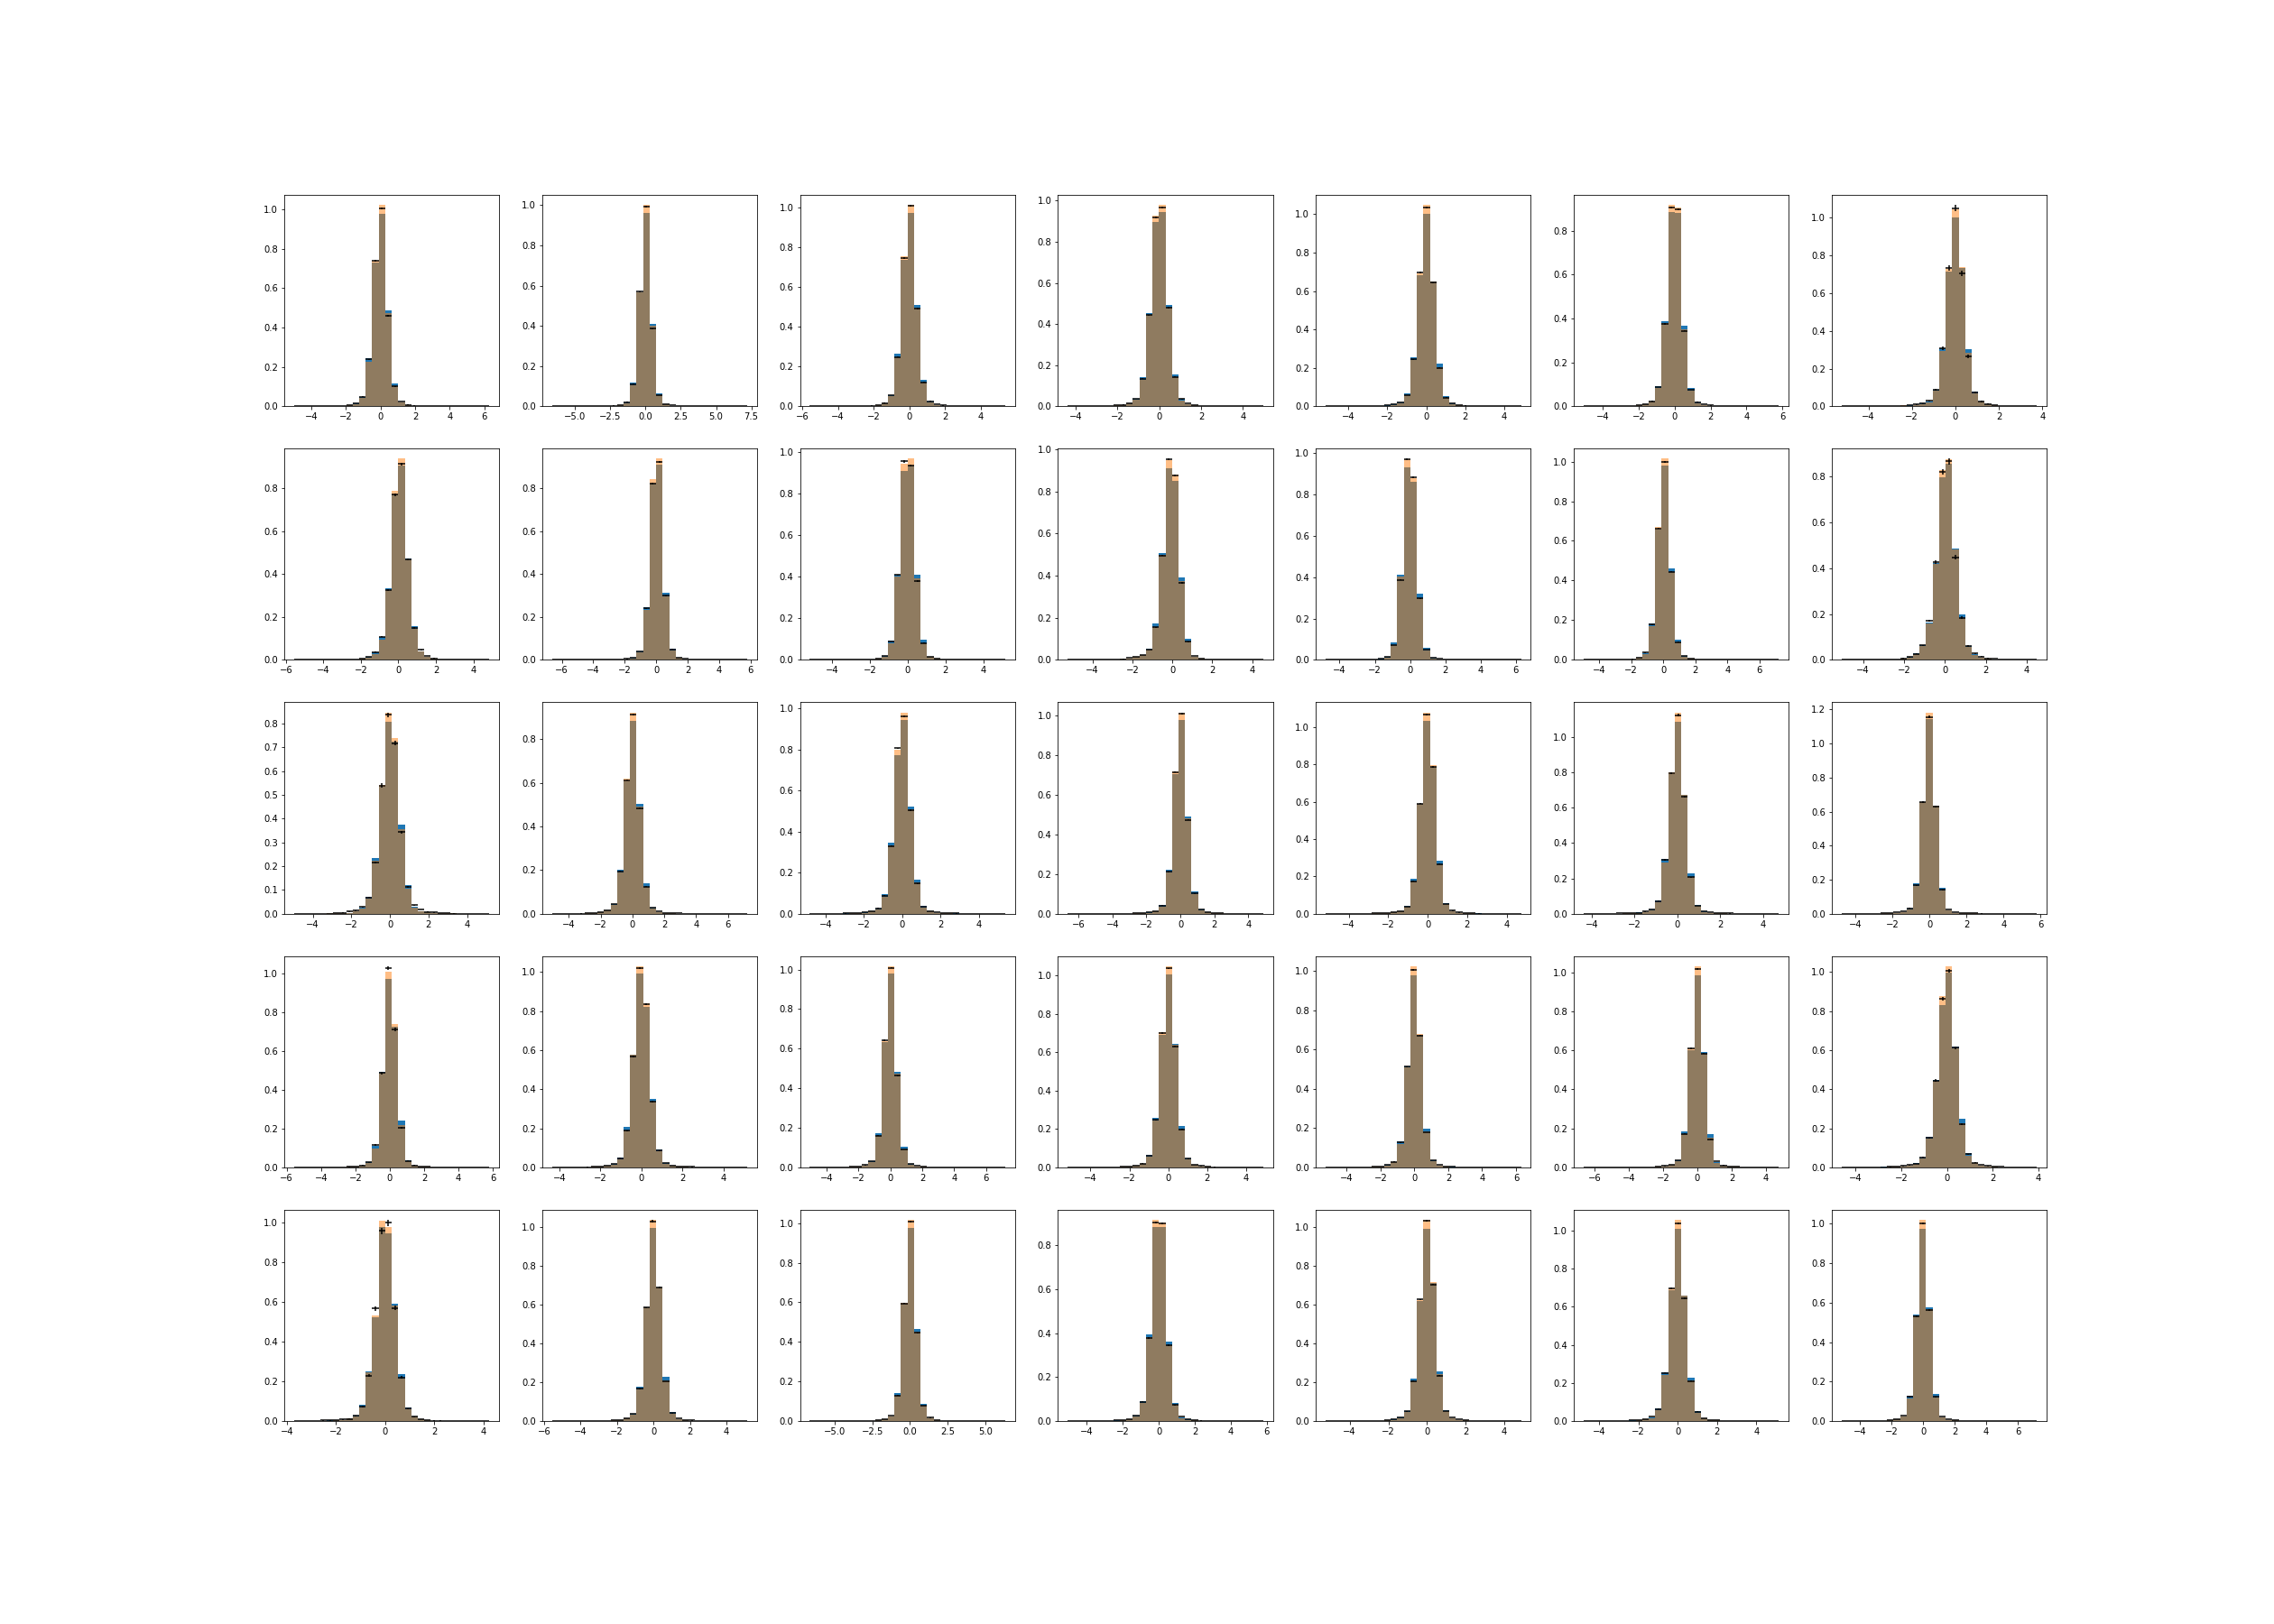

zee_x7c5_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var6.png


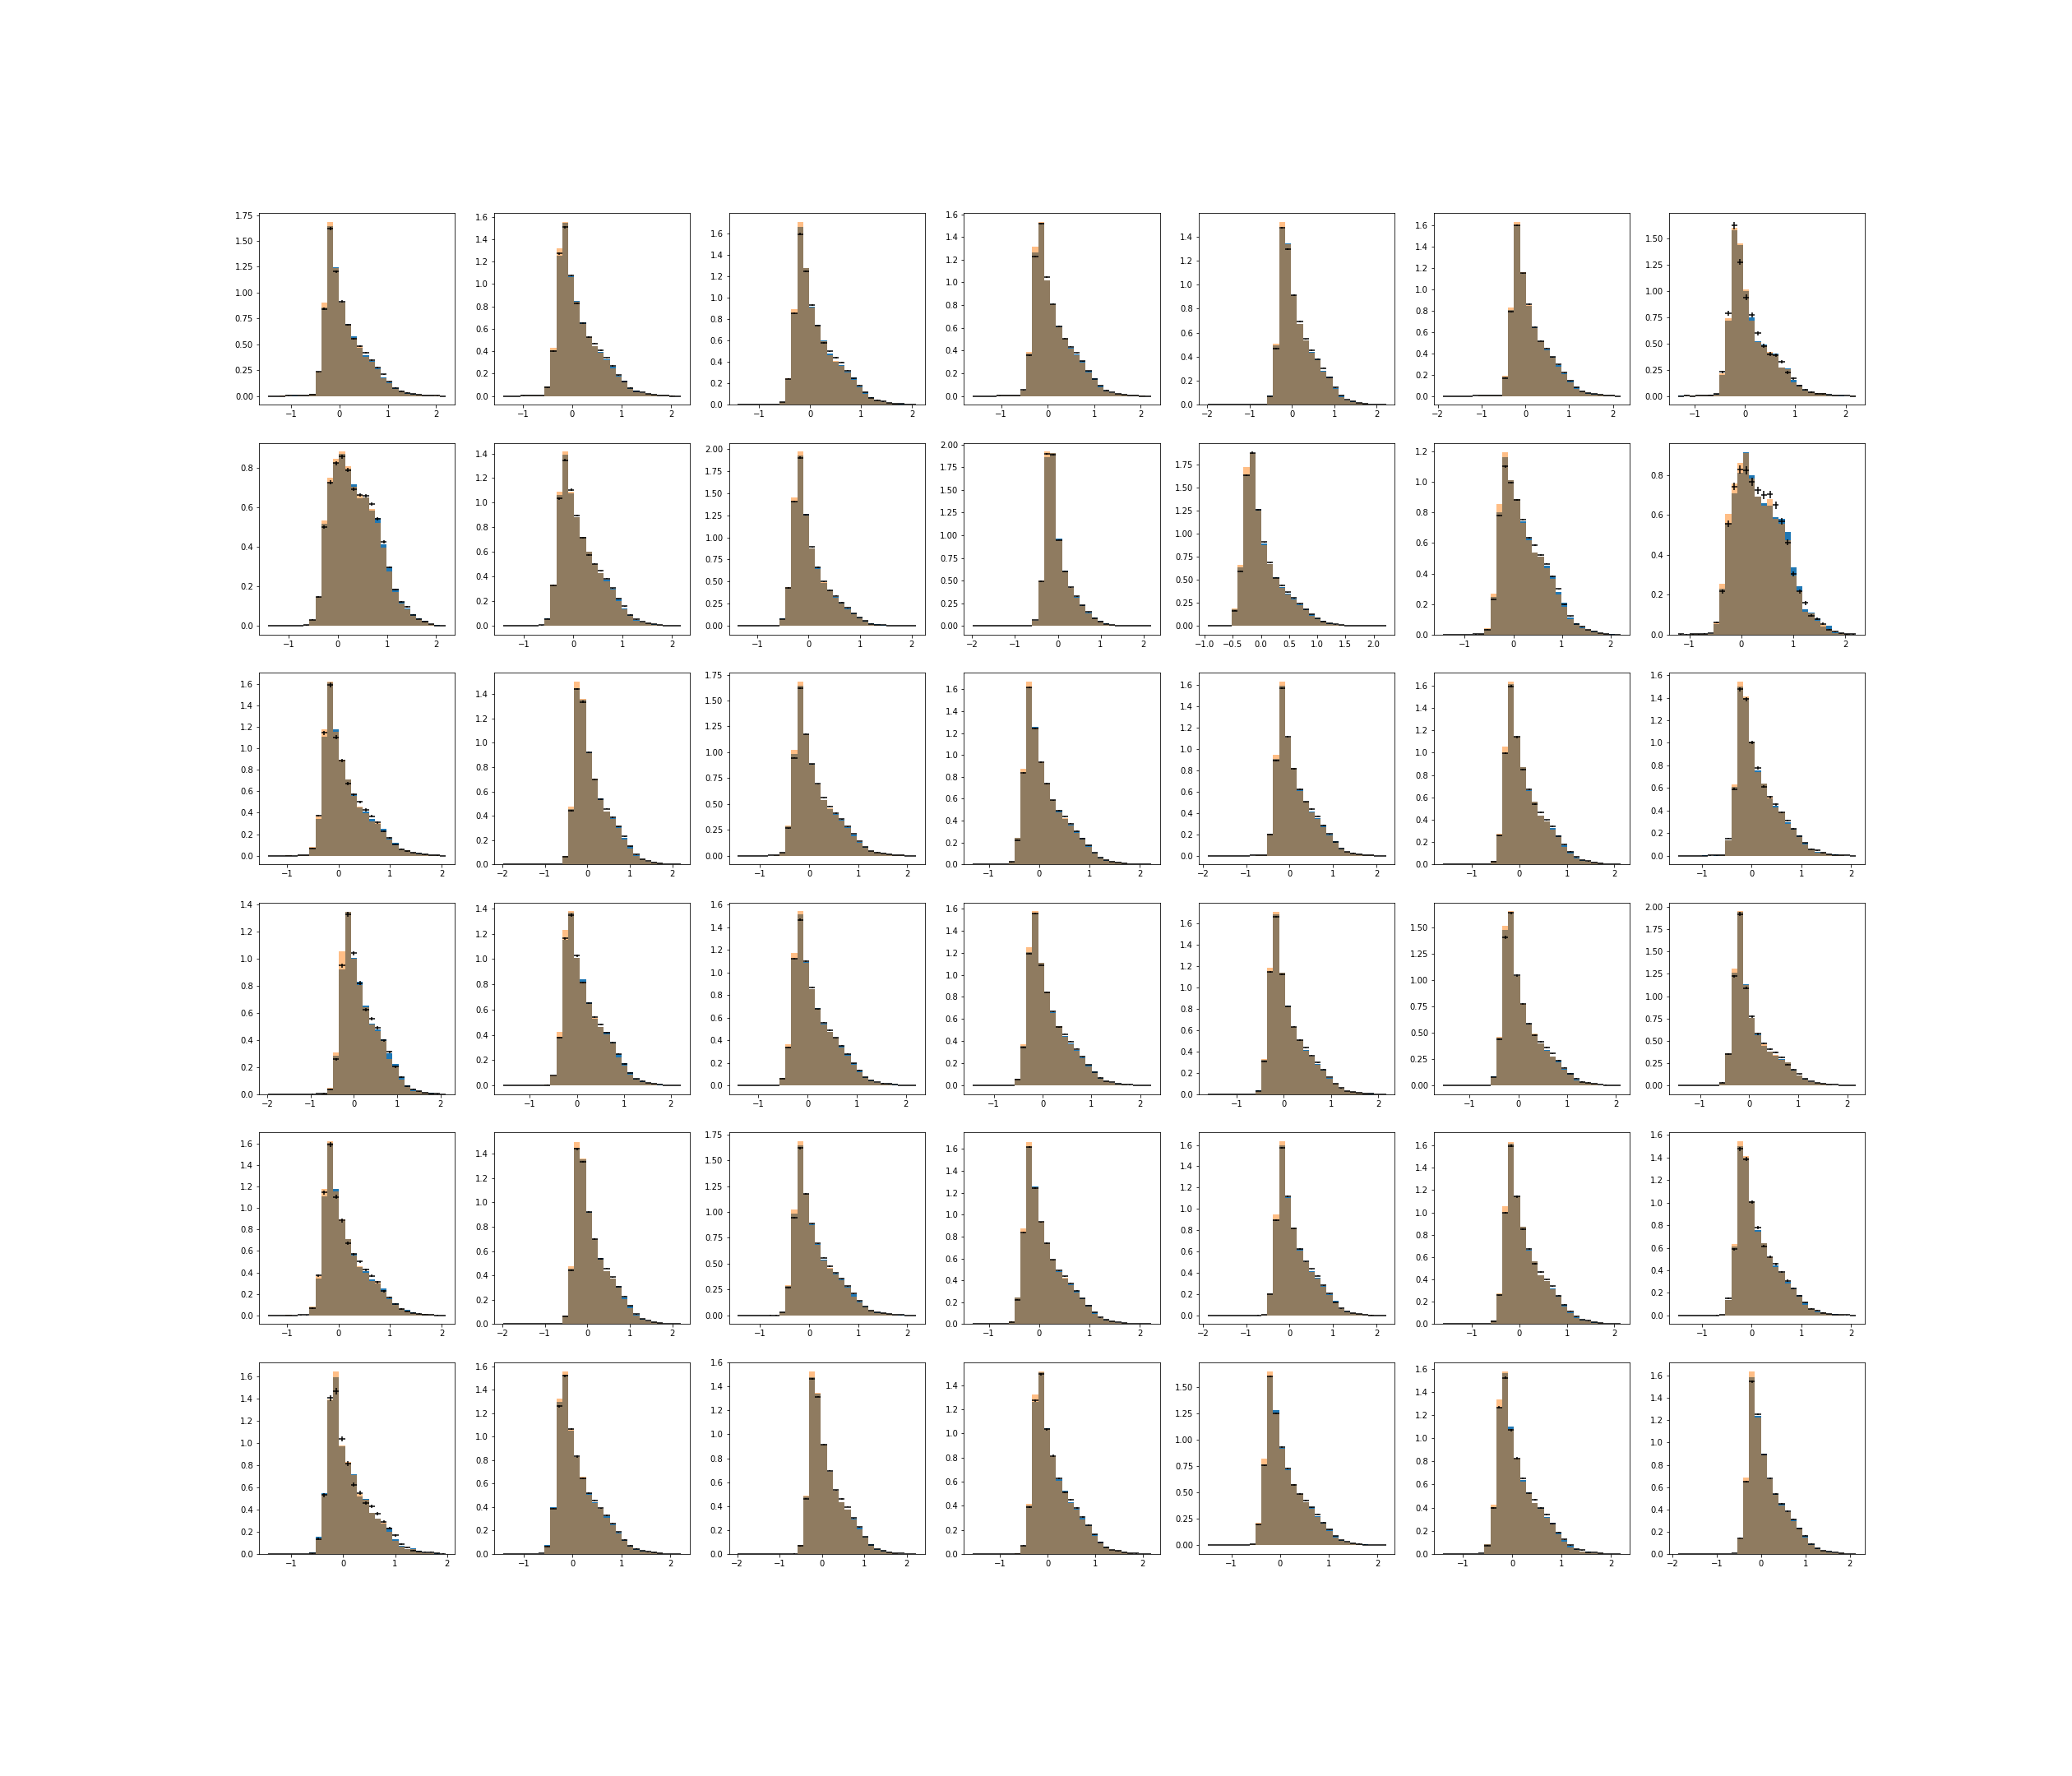

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning/sampleepoch_650_var6.png


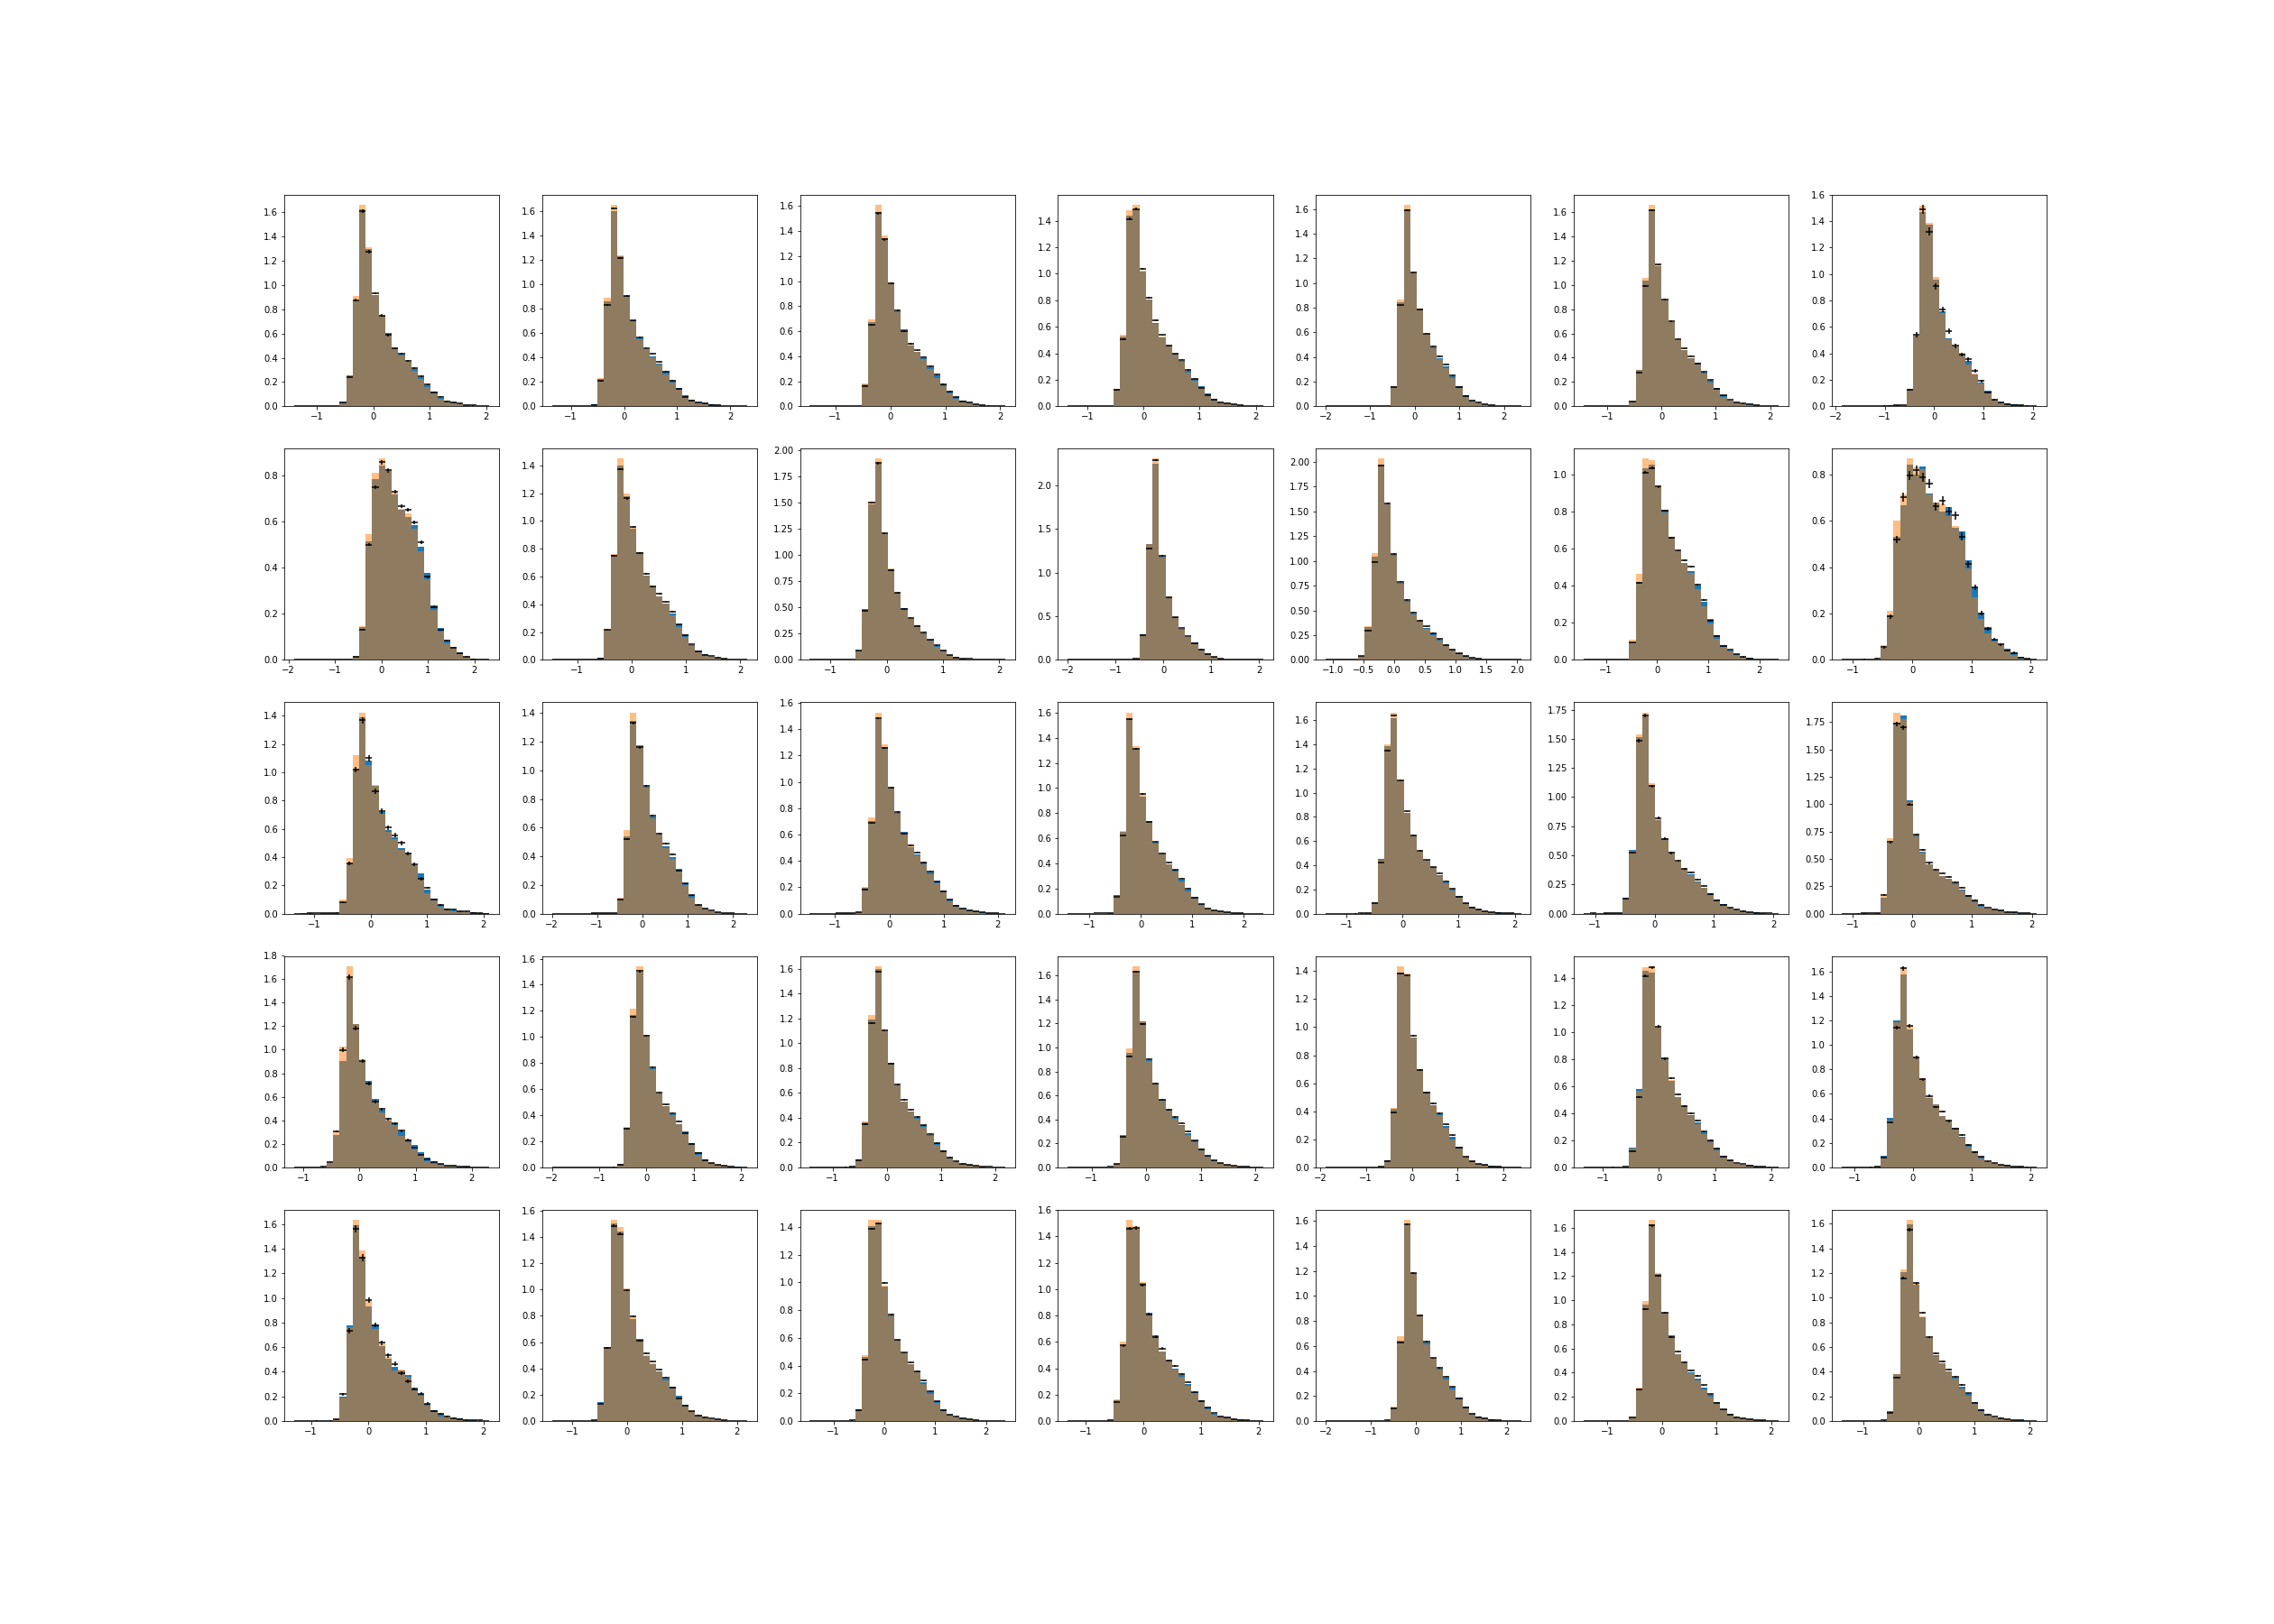

zee_x7c5_absrw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning_m_pt/sampleepoch_650_var6.png


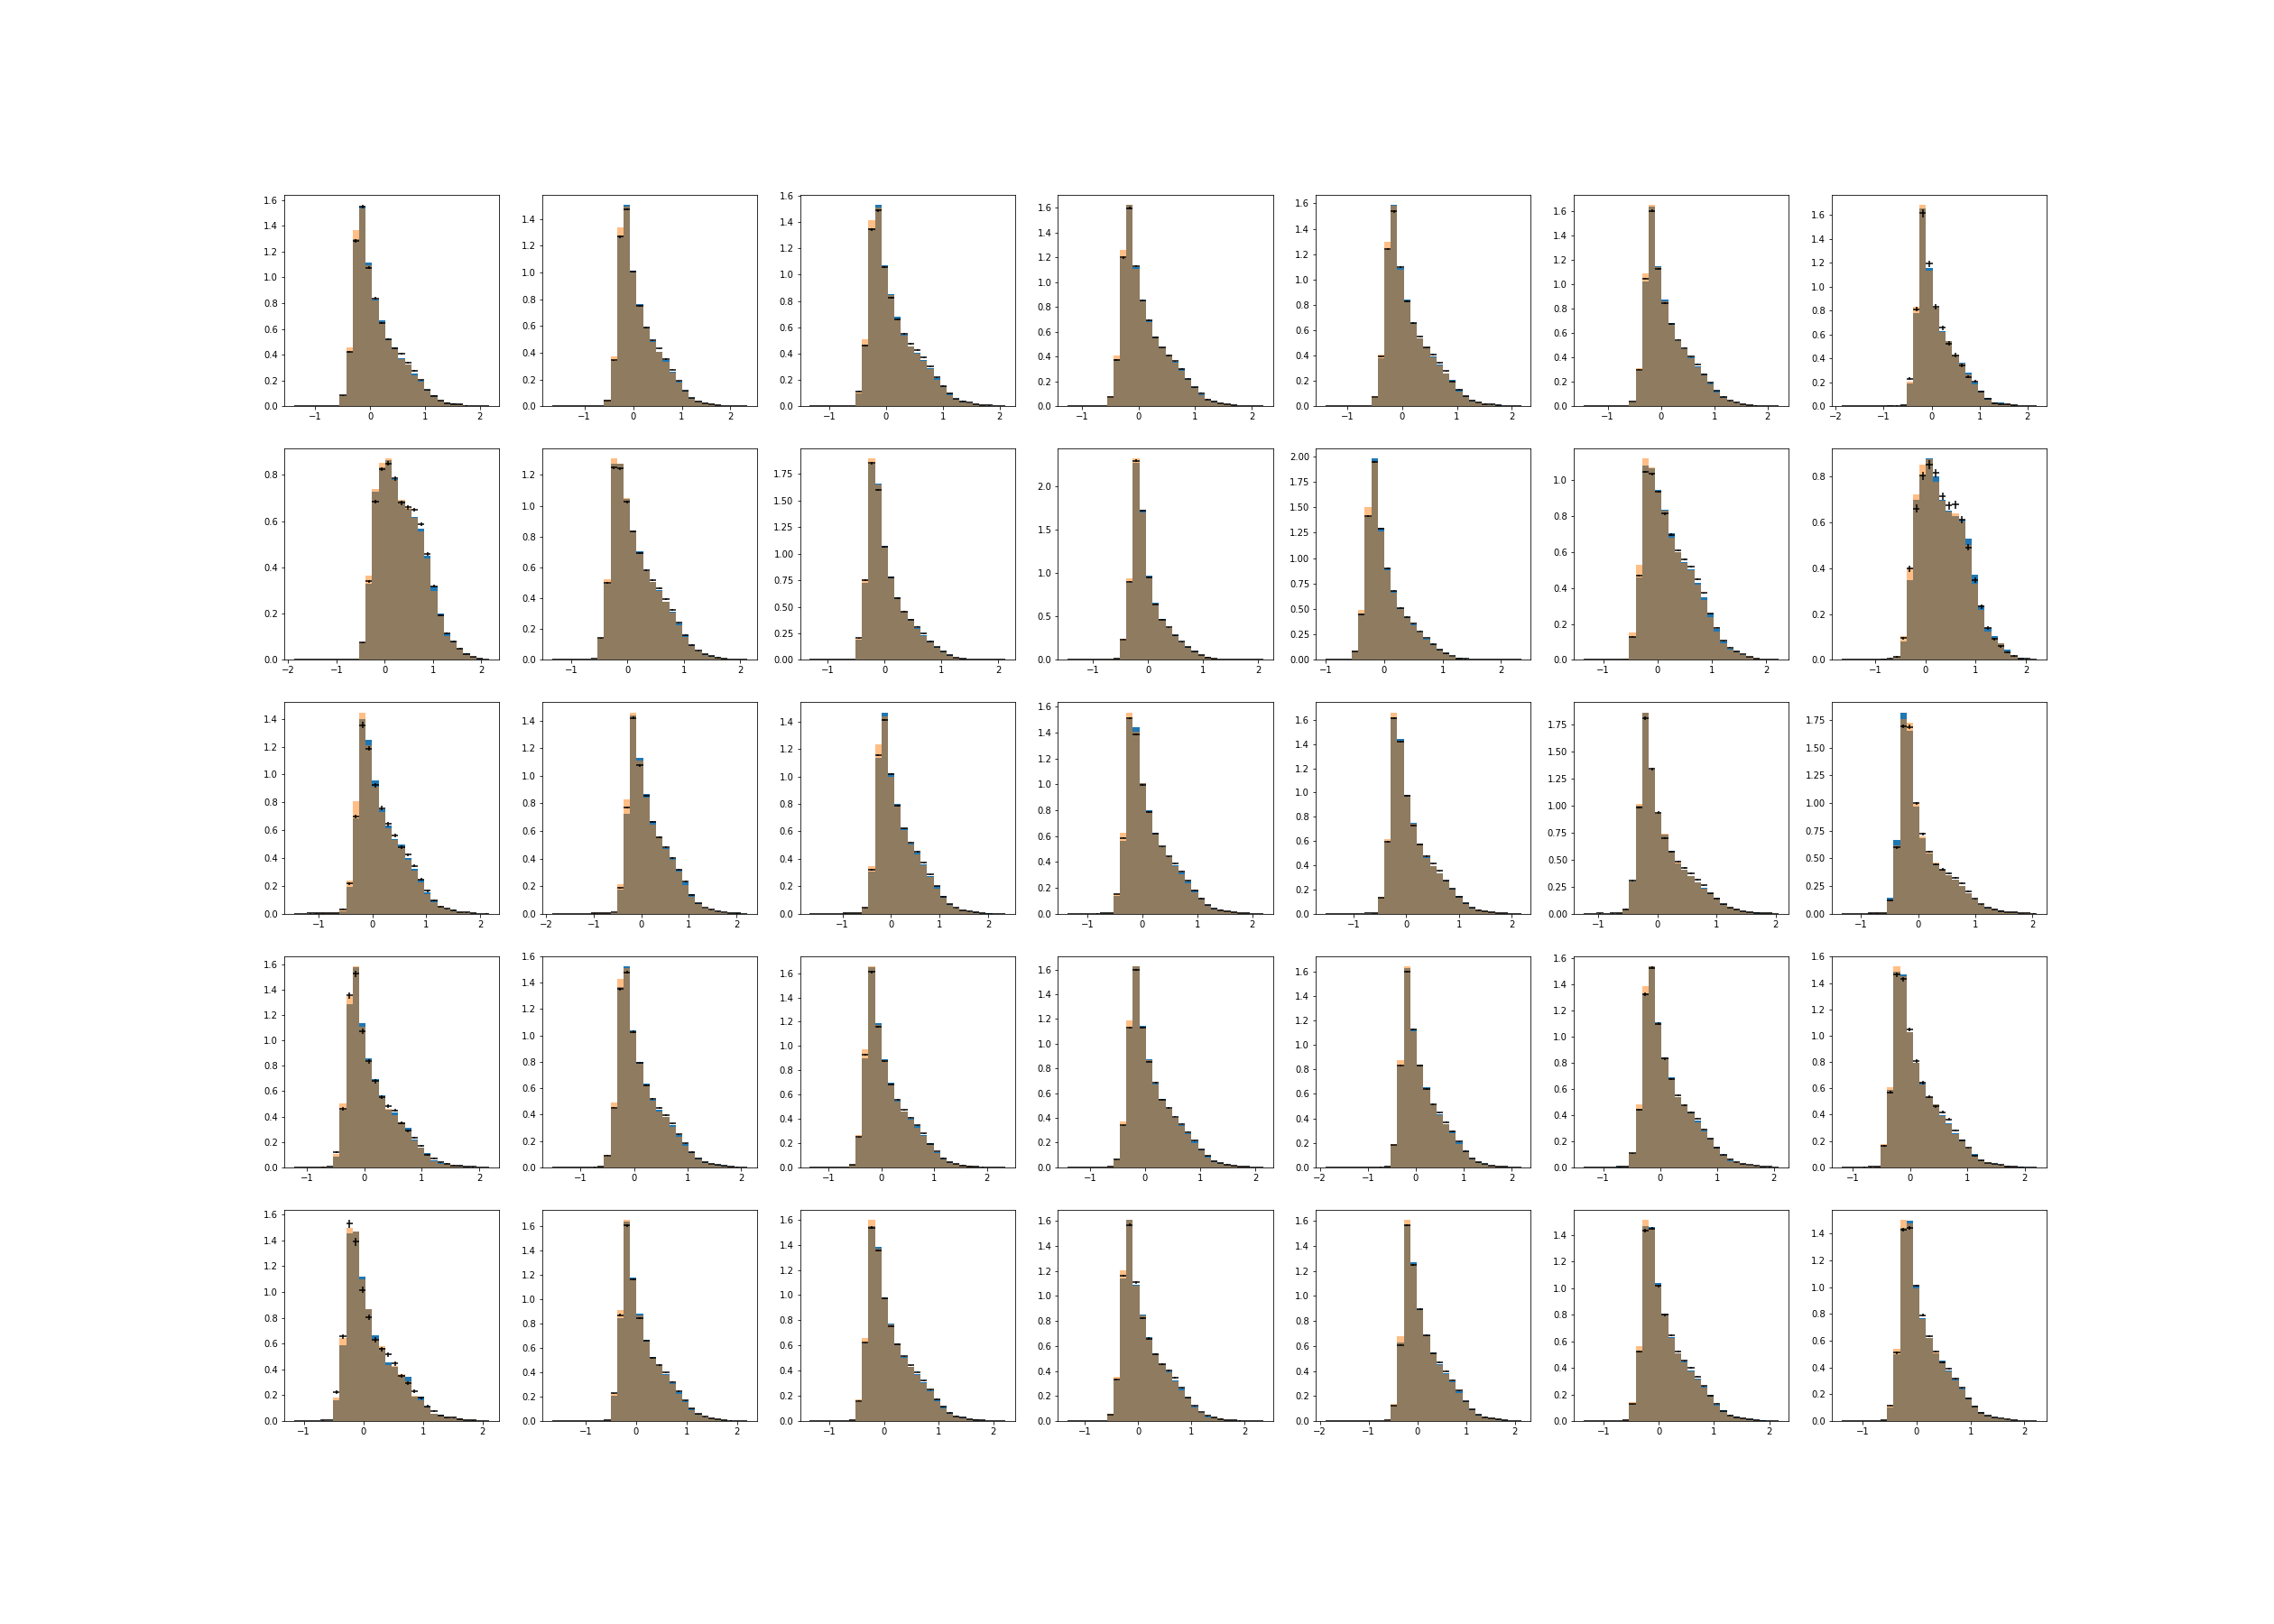

In [610]:
from IPython.core.display import Image, display

from functools import reduce
from glob import glob

def display_images(which,targets=targets):
    images = reduce(lambda x,y: x+y, map(lambda x: glob('%s/%s' % (x,which)), targets) )
    for img in images:
        print(img)
        display(Image(img))
        
for var in range(7):
    display_images('*epoch*_650_var%d*.png' % var, filter(lambda x: "x7c5" in x, targets) )
    #isplay_images('*epoch*_[16]00_var%d*.png' % var, targets=['zee_x7c3pu_rw5_G512to64x8_r1m51m5_D1024to32x6_lr1m5_dec1m6_cleaning'])
    # display_images('*epoch*_650_var%d*.png' % var) #filter(lambda x: "x7c2" in x or "c3" in x or "c4" in x, targets))
    #display_images('*epoch*_[4567][05]0_var%d*.png' % var, targets=['zee_x5c2_G512to64x8_r1m51m4_D1024to32x6_lr1m5_dec1m6_cleaning'])
               #,'zee_x5c2_G512to64x8_r1m51m4_D1024to32x6_lr1m5_dec1m6_cleaning'])
    # display_images('*epoch*_[2-3][0-9][0-9]_var%d*.png' % var,targets=["zee_x5c2_G512to64x8_r1m51m5_D1024to32x6_lr1m6_dec1m6_cleaning"])

# for var in range(5):
#     display_images('*epoch_[34][05]0_var%d*.png' % var, targets=["zee_x5c2_G512to64x8_r1m51m5_D1024to32x6_lr1m6_dec1m6"])

In [458]:
import GAN.ffwd as ffwd

reload(ffwd)


Using TensorFlow backend.


<module 'GAN.ffwd' from '/users/musella/jupyter/GAN/GAN/ffwd.py'>

In [ ]:
# discriminator = ffwd.FFDBuilder(**{'activation': None,
#   'clip_weights': 0.01,
#   'kernel_sizes': [256, 256, 256, 256, 256],
#   'name': 'D_256x5'})((1,1),(1,1))

In [ ]:
from keras.models import load_model
import GAN.models

from glob import glob 

discriminators = glob('%s/discriminator1-epoch*.hdf5' % target)

# discriminator = load_model('%s/discriminator-epoch400.hdf5' % target)

In [ ]:
def weight_lims(disc):
    maxes = []
    mins = []
    means = []
    for layer in discriminator.layers:
        print(layer)
        for weights in layer.get_weights():
            means.append(np.mean(weights))
            maxes.append(np.max(weights))
            mins.append(np.min(weights))
    return np.array( [means,mins,maxes] )

lims = []
for fname in discriminators:
    discriminator = load_model(fname)
    lims.append(weight_lims(discriminator))

In [ ]:
# maxes = []
# mins = []
# for layer in discriminator.layers:
#     print(layer)
#     for weights in layer.get_weights():
#         maxes.append(np.max(weights))
#         mins.append(np.min(weights))

In [ ]:
lims = np.array(lims)

In [ ]:
print(lims.shape)

In [ ]:
absmax = lims[:,2,:].max(axis=1)
absmin = lims[:,1,:].min(axis=1)


In [ ]:
absmin,absmax

In [ ]:
plt.plot(lims[:,2,[0,2,4,6,8,10]])
plt.plot(lims[:,1,[0,2,4,6,8,10]])


In [ ]:
plt.plot(lims[:,2,[1,3,5,7,9,11]])
plt.plot(lims[:,1,[1,3,5,7,9,11]])


In [ ]:
plt.plot(lims[:,0,[1,3,5,7,9,11]])
plt.plot(lims[:,0,[0,2,4,6,8,10]])


In [ ]:
generators = glob('%s/generator-epoch*.hdf5' % target)

generators

In [ ]:
generator = load_model(generators[-1])

print(generator.summary())

In [ ]:
from keras.layers import PReLU, Dense

prelus = []

for layer in generator.layers:
    if type(layer) == PReLU:
        prelus.append(layer)

In [ ]:
for layer in prelus:
    print(layer)
    for weights in layer.get_weights():
        print(weights.shape)
        plt.hist(weights.ravel())
        plt.show()